<a href="https://colab.research.google.com/github/clarissa-fernanda/Case-Deloitte/blob/main/Copy_of_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Funções de erro
def mae(y_model, y_exp):
    """Mean Absolute Error (MAE)"""
    return np.mean(np.abs(y_model - y_exp))

def rmse(y_model, y_exp):
    """Root Mean Squared Error (RMSE)"""
    return np.sqrt(np.mean((y_model - y_exp) ** 2))

def mpe(y_model, y_exp):
    """Mean Percentage Error (MPE)"""
    return np.mean((y_model - y_exp) / y_exp) * 100

def r2(y_model, y_exp):
    """Coeficiente de Determinação (R²)"""
    ss_res = np.sum((y_exp - y_model) ** 2)
    ss_tot = np.sum((y_exp - np.mean(y_exp)) ** 2)
    return 1 - (ss_res / ss_tot)




In [ ]:
import numpy as np

# Dados de tempo do experimento
tempo_exp = np.array([0, 1, 2, 3, 4])  # Tempo experimental até 4 segundos
y_exp = np.array([1.0, 2.1, 2.9, 3.8, 4.5])  # Dados experimentais correspondentes

# Dados de tempo do modelo (modelo foi simulado até 6 segundos)
tempo_model = np.array([0, 1, 2, 3, 4, 5, 6])
y_model = np.array([1.0, 2.0, 3.0, 3.7, 4.6, 5.2, 5.8])  # Resultados do modelo

# Truncando os dados do modelo para o mesmo intervalo de tempo dos dados experimentais
y_model_trunc = y_model[:len(tempo_exp)]  # Trunca os valores do modelo
tempo_model_trunc = tempo_model[:len(tempo_exp)]  # Trunca o tempo do modelo

# Calculando erros somente no intervalo comum de tempo
mae_value = mae(y_model_trunc, y_exp)
rmse_value = rmse(y_model_trunc, y_exp)

print(f"MAE (truncado): {mae_value}")
print(f"RMSE (truncado): {rmse_value}")

from scipy.interpolate import interp1d

# Interpolação dos valores do modelo nos pontos de tempo experimental
interp_model = interp1d(tempo_model, y_model, kind='linear')  # Interpolação linear
y_model_interp = interp_model(tempo_exp)  # Valores do modelo nos tempos experimentais

# Calculando erros com o modelo interpolado
mae_value = mae(y_model_interp, y_exp)
rmse_value = rmse(y_model_interp, y_exp)

print(f"MAE (interpolado): {mae_value}")
print(f"RMSE (interpolado): {rmse_value}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Funções de erro
def mae(y_model, y_exp):
    return np.mean(np.abs(y_model - y_exp))

def rmse(y_model, y_exp):
    return np.sqrt(np.mean((y_model - y_exp) ** 2))

# Carregar as diferentes abas do arquivo CSV
file_path = 'dadoscrescimento atualizado.xlsx'  # Insira o caminho do seu arquivo
dados = pd.read_excel(file_path, sheet_name=None)  # Carrega todas as abas

# Acessar os dados experimentais e do modelo de abas específicas
dados_model = dados['A=160']  # Substitua pelo nome da aba correta

# Remover valores NaN
dados_model = dados_model.dropna(subset=['t(h)', 'ng', 't(norm)', 'delta ng'])

# Acessar colunas específicas (supondo que 't(h)' e 'ng' sejam do experimento e 't(norm)' e 'delta ng' sejam do modelo)
tempo_exp = dados_model['t(h)'].values
y_exp = dados_model['ng'].values

tempo_model = dados_model['t(norm)'].values
y_model = dados_model['delta ng'].values

# Truncar os dados do modelo para o mesmo intervalo de tempo dos dados experimentais
y_model_trunc = y_model[:len(tempo_exp)]  # Trunca os valores do modelo

# Interpolando o modelo nos pontos de tempo dos dados experimentais
interp_model = interp1d(tempo_model, y_model, kind='linear')
y_model_interp = interp_model(tempo_exp)



print(tempo_exp)
# Calculando os erros
mae_value = mae(y_model_interp, y_exp)
rmse_value = rmse(y_model_interp, y_exp)

# Exibindo os resultados
print(f"MAE: {mae_value}")
print(f"RMSE: {rmse_value}")


ValueError: A value (0.22897833333333334) in x_new is above the interpolation range's maximum value (0.20625000000000004).

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Funções de erro
def mae(y_model, y_exp):
    return np.mean(np.abs(y_model - y_exp))

def rmse(y_model, y_exp):
    return np.sqrt(np.mean((y_model - y_exp) ** 2))

def r2(y_model, y_exp):
    ss_res = np.sum((y_exp - y_model) ** 2)
    ss_tot = np.sum((y_exp - np.mean(y_exp)) ** 2)
    return 1 - (ss_res / ss_tot)

# Carregar as diferentes abas do arquivo CSV
file_path = 'dadoscrescimento atualizado.xlsx'  # Insira o caminho do seu arquivo
dados = pd.read_excel(file_path, sheet_name=None)  # Carrega todas as abas

# Lista de abas a serem processadas (modifique para incluir as abas desejadas)
abas_para_processar = ['A=150', 'A=160','A=190','A=140', 'A=180','A=170','A=200','A=300']  # Substitua pelas abas que deseja calcular

# Iterar sobre cada aba e calcular os erros
for aba in abas_para_processar:
    dados_model = dados[aba]  # Seleciona a aba

    # Remover valores NaN
    dados_model = dados_model.dropna(subset=['t(h)', 'ng', 't(norm)', 'delta ng', 'tnorm(h) Ingrid', 'ngnorm(mol) Ingrid'])

    # Acessar colunas específicas
    tempo_exp = dados_model['t(h)'].values
    y_exp = dados_model['ng'].values

    tempo_model = dados_model['t(norm)'].values
    y_model = dados_model['delta ng'].values

    tempo_ingrid = dados_model['tnorm(h) Ingrid'].values
    y_ingrid = dados_model['ngnorm(mol) Ingrid'].values

    # Definir uma margem de tolerância (epsilon) para comparar valores
    epsilon = 1e-6

    # Truncar os dados experimentais para garantir que estão dentro do intervalo de tempo_model com tolerância
    mask = (tempo_exp >= tempo_model.min() - epsilon) & (tempo_exp <= tempo_model.max() + epsilon)
    tempo_exp_trunc = tempo_exp[mask]
    y_exp_trunc = y_exp[mask]

    # Truncar os dados experimentais para Ingrid com tolerância
    mask_ingrid = (tempo_ingrid >= tempo_ingrid.min() - epsilon) & (tempo_ingrid <= tempo_ingrid.max() + epsilon)
    tempo_ingrid_trunc = tempo_ingrid[mask_ingrid]
    y_ingrid_trunc = y_ingrid[mask_ingrid]

    # Interpolando o modelo nos pontos de tempo dos dados experimentais truncados
    interp_model = interp1d(tempo_model, y_model, kind='linear')
    y_model_interp = interp_model(tempo_exp_trunc)

    # Interpolando o modelo Ingrid nos pontos de tempo correspondentes
    interp_ingrid = interp1d(tempo_ingrid, y_ingrid, kind='linear')
    y_ingrid_interp = interp_ingrid(tempo_exp_trunc)

    # Calculando os erros para ambos os modelos
    mae_value_model = mae(y_model_interp, y_exp_trunc)
    rmse_value_model = rmse(y_model_interp, y_exp_trunc)
    r2_value_model = r2(y_model_interp, y_exp_trunc)

    mae_value_ingrid = mae(y_ingrid_interp, y_exp_trunc)
    rmse_value_ingrid = rmse(y_ingrid_interp, y_exp_trunc)
    r2_value_ingrid = r2(y_ingrid_interp, y_exp_trunc)

    # Exibindo os resultados para cada aba
    print(f"Aba: {aba}")
    print("Modelo 1 (delta ng):")
    print(f"MAE: {mae_value_model}")
    print(f"RMSE: {rmse_value_model}")
    print(f"R²: {r2_value_model}")
    print("----------------------")
    print("Modelo Ingrid (ngnorm(mol) Ingrid):")
    print(f"MAE: {mae_value_ingrid}")
    print(f"RMSE: {rmse_value_ingrid}")
    print(f"R²: {r2_value_ingrid}")
    print("----------------------")
    df=


Aba: A=150
Modelo 1 (delta ng):
MAE: 0.0014478337089948168
RMSE: 0.001518591331166899
R²: 0.9579945479607814
----------------------
Modelo Ingrid (ngnorm(mol) Ingrid):
MAE: 0.004175770877714146
RMSE: 0.004372236806370171
R²: 0.6517980637889096
----------------------
Aba: A=160
Modelo 1 (delta ng):
MAE: 0.0014148267962016301
RMSE: 0.001487214962731936
R²: 0.9597124068852336
----------------------
Modelo Ingrid (ngnorm(mol) Ingrid):
MAE: 0.004175770877714146
RMSE: 0.004372236806370171
R²: 0.6517980637889096
----------------------
Aba: A=190
Modelo 1 (delta ng):
MAE: 0.0014200988085171392
RMSE: 0.0014896059788431452
R²: 0.9595827609082983
----------------------
Modelo Ingrid (ngnorm(mol) Ingrid):
MAE: 0.004175770877714146
RMSE: 0.004372236806370171
R²: 0.6517980637889096
----------------------
Aba: A=140
Modelo 1 (delta ng):
MAE: 0.001410249154415164
RMSE: 0.0015155139508721896
R²: 0.9581646210674923
----------------------
Modelo Ingrid (ngnorm(mol) Ingrid):
MAE: 0.004175770877714146
RMSE

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Funções de erro
def mae(y_model, y_exp):
    return np.mean(np.abs(y_model - y_exp))

def rmse(y_model, y_exp):
    return np.sqrt(np.mean((y_model - y_exp) ** 2))

def r2(y_model, y_exp):
    ss_res = np.sum((y_exp - y_model) ** 2)
    ss_tot = np.sum((y_exp - np.mean(y_exp)) ** 2)
    return 1 - (ss_res / ss_tot)

# Carregar as diferentes abas do arquivo Excel
file_path = 'dadoscrescimento atualizado.xlsb (1).xlsx'  # Insira o caminho do seu arquivo
abas_para_processar = ['A=140', 'A=150', 'A=160', 'A=170', 'A=180', 'A=190']
dados = pd.read_excel(file_path, sheet_name=abas_para_processar)  # Carrega todas as abas

# Lista de abas a serem processadas

# Criar um DataFrame vazio para armazenar os resultados
resultados = pd.DataFrame(columns=['A', 'MAE', 'RMSE', 'R²'])

# Iterar sobre cada aba e calcular os erros
for aba in abas_para_processar:
    dados_model = dados[aba]  # Seleciona a aba

    # Remover valores NaN
    dados_model = dados_model.dropna(subset=['t(h)', 'ng', 't(norm)', 'delta ng', 'tnorm(h) Ingrid', 'ngnorm(mol) Ingrid'])

    # Acessar colunas específicas
    tempo_exp = dados_model['t(h)'].values
    y_exp = dados_model['ng'].values

    tempo_model = dados_model['t(norm)'].values
    y_model = dados_model['delta ng'].values

    tempo_ingrid = dados_model['tnorm(h) Ingrid'].values
    y_ingrid = dados_model['ngnorm(mol) Ingrid'].values

    # Definir uma margem de tolerância (epsilon) para comparar valores
    epsilon = 1e-6

    # Truncar os dados experimentais para garantir que estão dentro do intervalo de tempo_model com tolerância
    mask = (tempo_exp >= tempo_model.min() - epsilon) & (tempo_exp <= tempo_model.max() + epsilon)
    tempo_exp_trunc = tempo_exp[mask]
    y_exp_trunc = y_exp[mask]

    # Interpolação do modelo "delta ng"
    interp_model = interp1d(tempo_model, y_model, kind='linear')
    y_model_interp = interp_model(tempo_exp_trunc)

    # Interpolação do modelo "Ingrid"
    interp_ingrid = interp1d(tempo_ingrid, y_ingrid, kind='linear')
    y_ingrid_interp = interp_ingrid(tempo_exp_trunc)

    # Calculando os erros para o modelo "delta ng"
    mae_value_model = mae(y_model_interp, y_exp_trunc)
    rmse_value_model = rmse(y_model_interp, y_exp_trunc)
    r2_value_model = r2(y_model_interp, y_exp_trunc)

    # Adicionando os resultados do modelo "delta ng" ao DataFrame
    A_value = int(aba.split('=')[1])  # Extrair o valor de A da aba
    resultados = pd.concat([resultados, pd.DataFrame({
        'A': [A_value],
        'MAE': [mae_value_model],
        'RMSE': [rmse_value_model],
        'R²': [r2_value_model]
    })])

# Calculando os erros para o modelo "Ingrid" (A = 0)
mae_value_ingrid = mae(y_ingrid_interp, y_exp_trunc)
rmse_value_ingrid = rmse(y_ingrid_interp, y_exp_trunc)
r2_value_ingrid = r2(y_ingrid_interp, y_exp_trunc)

# Adicionando os resultados do modelo "Ingrid" ao DataFrame com A = 0
resultados = pd.concat([resultados, pd.DataFrame({
    'A': ['CRESCIMENTO'],
    'MAE': [mae_value_ingrid],
    'RMSE': [rmse_value_ingrid],
    'R²': [r2_value_ingrid]
})])

# Exibir o DataFrame com os resultados
print(resultados)


             A       MAE      RMSE        R²
0          140  0.001410  0.001516  0.958165
0          150  0.001448  0.001519  0.957995
0          160  0.001415  0.001487  0.959712
0          170  0.001390  0.001472  0.960507
0          180  0.012631  0.014346 -2.748978
0          190  0.001420  0.001490  0.959583
0  CRESCIMENTO  0.004176  0.004372  0.651798


<ipython-input-57-dd7aceae2f20>:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({


GRAFICOS

delta ng


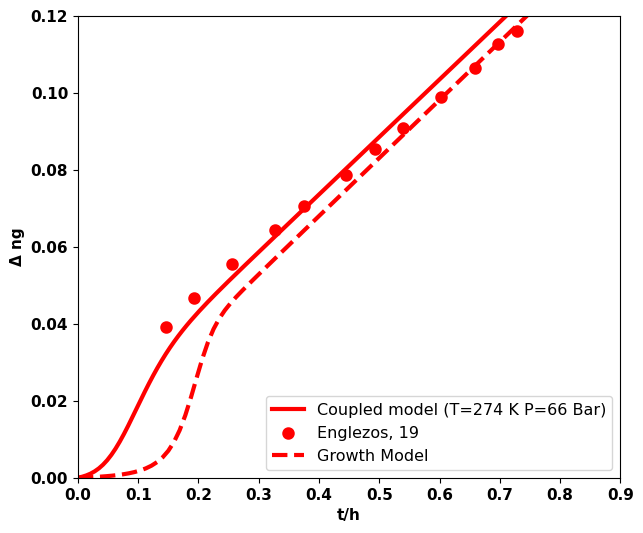

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR A=300.xlsx', sheet_name='A=300 RR=2.2E-4')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}

pares_variaveis = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores = ['red', 'red', 'red']  # Escolha as cores que preferir
estilos = ['-', 'o', '--']  # Estilos: pontos, linha sólida e linha pontilhada

legendas_personalizadas = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 19',
    'Growth Model'
]
# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar cada par de variáveis no mesmo gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas_personalizadas):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

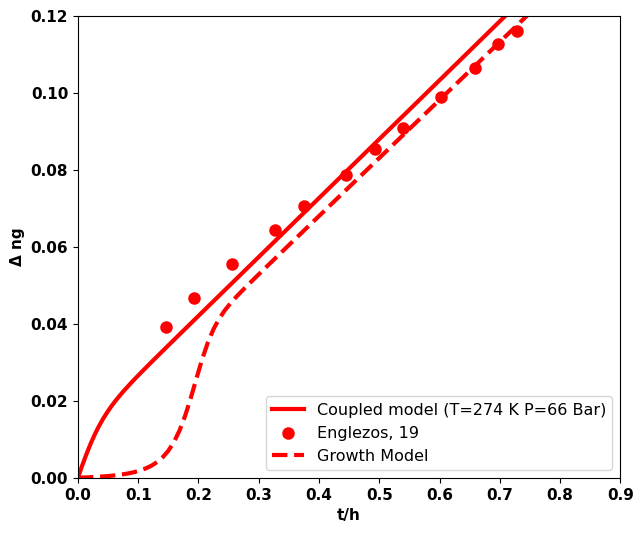

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BARrr=2.2e-4A=300.xlsx', sheet_name='rr=220')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}

pares_variaveis = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores = ['red', 'red', 'red']  # Escolha as cores que preferir
estilos = ['-', 'o', '--']  # Estilos: pontos, linha sólida e linha pontilhada

legendas_personalizadas = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 19',
    'Growth Model'
]
# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar cada par de variáveis no mesmo gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas_personalizadas):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

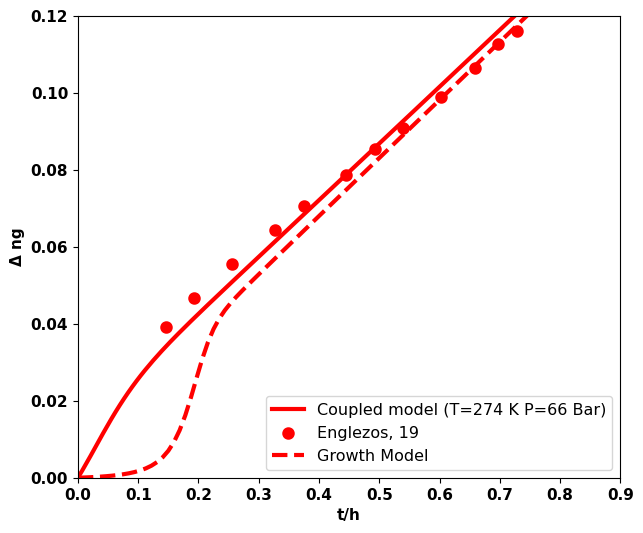

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('saida_dadostaxas66BARrr=2.2e-4A=170.xlsx', sheet_name='rr=2.2e-4')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}

pares_variaveis = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores = ['red', 'red', 'red']  # Escolha as cores que preferir
estilos = ['-', 'o', '--']  # Estilos: pontos, linha sólida e linha pontilhada

legendas_personalizadas = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 19',
    'Growth Model'
]
# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar cada par de variáveis no mesmo gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas_personalizadas):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

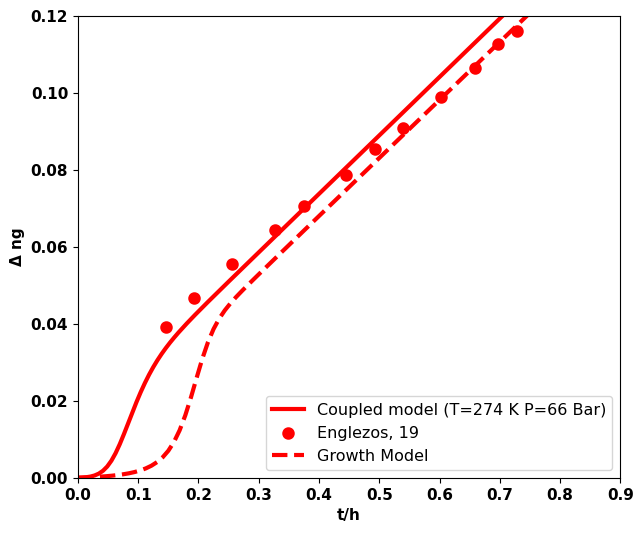

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BARrr=220A=170 (1).xlsx', sheet_name='rr=220')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}

pares_variaveis = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores = ['red', 'red', 'red']  # Escolha as cores que preferir
estilos = ['-', 'o', '--']  # Estilos: pontos, linha sólida e linha pontilhada

legendas_personalizadas = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 19',
    'Growth Model'
]
# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar cada par de variáveis no mesmo gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas_personalizadas):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

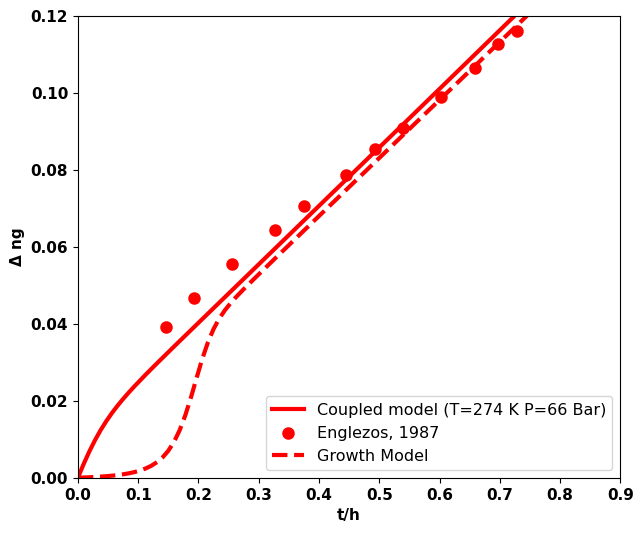

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300 RR=220')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores = ['red', 'red', 'red']  # Escolha as cores que preferir
estilos = ['-', 'o', '--']  # Estilos: pontos, linha sólida e linha pontilhada

legendas_personalizadas = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 1987',
    'Growth Model'
]
# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar cada par de variáveis no mesmo gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas_personalizadas):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

A=500

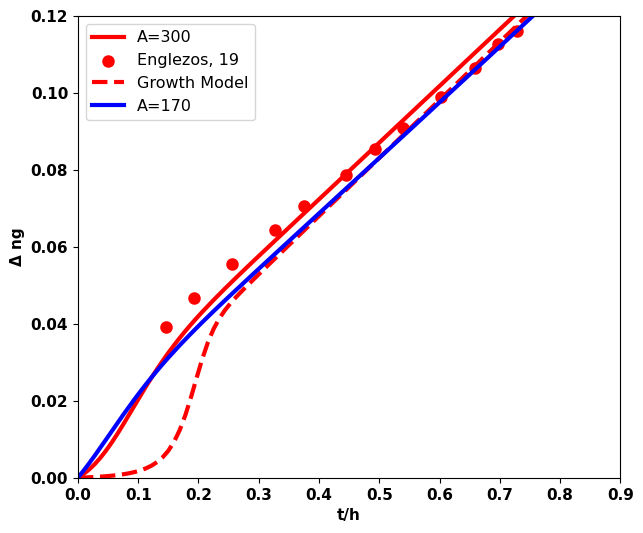

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300')
df5 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='NU A=170')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'A=300',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'A=170',
    'A=170'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300')
df5 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='NU A=170')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'A=300',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'A=170',
    'A=170'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Arquivo Excel
arquivo_excel = 'ycrescimento+nucleação66BAR.xlsx'

# Dicionário para associar cada aba a seus pares de variáveis
abas = {
    "A=300": {
        "pares_variaveis": {
            "t(norm)": "delta ng",
            "t(h)": "ng",
            "tnorm(h ingrid)": "ngnorm(mol ingrid)"
        },
        "cores": ['red', 'red', 'red'],
        "estilos": ['-', 'o', '--'],
        "legendas": [
            'A=300',
            'Englezos, 19',
            'Growth Model'
        ]
    },
    "NU A=170": {
        "pares_variaveis": {
            "t(norm)": "delta ng"
        },
        "cores": ['blue', 'blue'],
        "estilos": ['-', '--'],
        "legendas": [
            'A=170',
            'A=170'
        ]
    },
    # Adicione mais abas aqui, se necessário
}

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop pelas abas e seus respectivos dados
for aba, config in abas.items():
    # Carregar os dados da aba
    df = pd.read_excel(arquivo_excel, sheet_name=aba)

    # Configurações específicas da aba
    pares_variaveis = config["pares_variaveis"]
    cores = config["cores"]
    estilos = config["estilos"]
    legendas = config["legendas"]

    # Adicionar os pares de variáveis ao gráfico
    for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis.items(), cores, estilos, legendas):
        x = df[eixo_x]
        y = df[eixo_y]

        if estilo == 'o':  # Para estilo de pontos
            plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
        else:  # Para linhas sólidas e pontilhadas
            plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


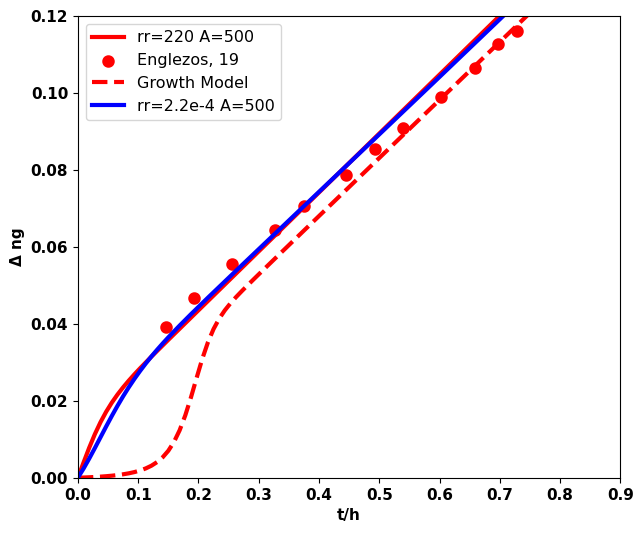

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='rr=220 A=500')
df5 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=500')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'rr=220 A=500',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'rr=2.2e-4 A=500',
    'New Data (Model 2)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


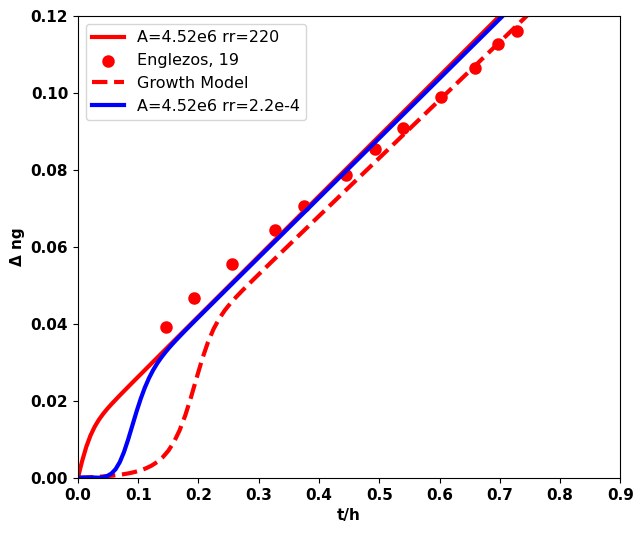

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BARA=4.52.xlsx', sheet_name='4,52e6 RR=220')
df5 = pd.read_excel('ycrescimento+nucleação66BARA=4.52.xlsx', sheet_name='rr=2.2E-4 A=4.52e6 ')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'A=4.52e6 rr=220',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'A=4.52e6 rr=2.2e-4',
    'New Data (Model 2)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=4)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


A=300000 66 bar

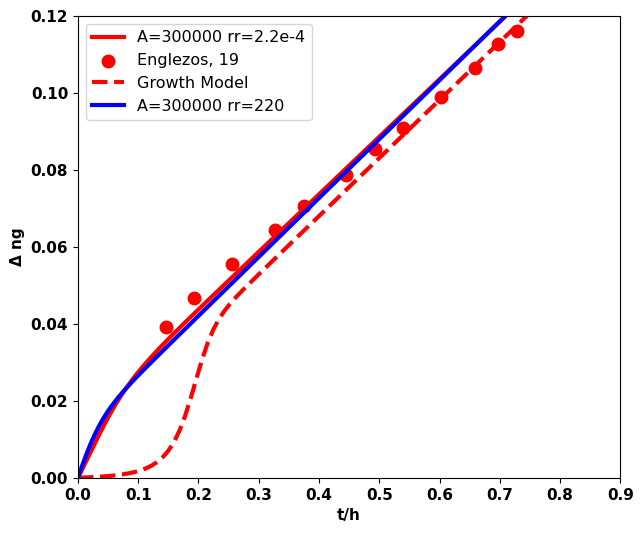

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BAR A=300 (1).xlsx', sheet_name='A=300 RR=2.2E-4')
df5 = pd.read_excel('ycrescimento+nucleação66BARrr=2.2e-4A=300 (1).xlsx', sheet_name='rr=220')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'A=300000 rr=2.2e-4',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'A=300000 rr=220  ',
    'New Data (Model 2)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=4)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()

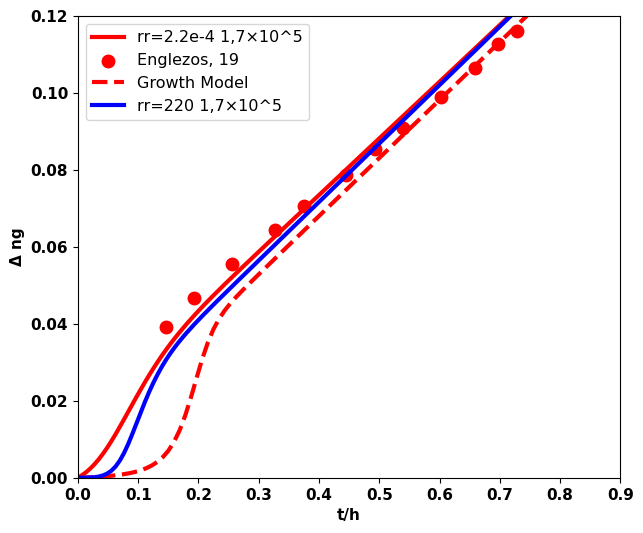

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação66BARrr=220A=170 (1).xlsx', sheet_name='rr=2.2e-4')
df5 = pd.read_excel('ycrescimento+nucleação66BARrr=220A=170 (1).xlsx', sheet_name='Sheet1')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']
legendas_df4 = [
    'rr=2.2e-4 1,7×10^5',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'rr=220 1,7×10^5',
    'New Data (Model 2)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=4)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


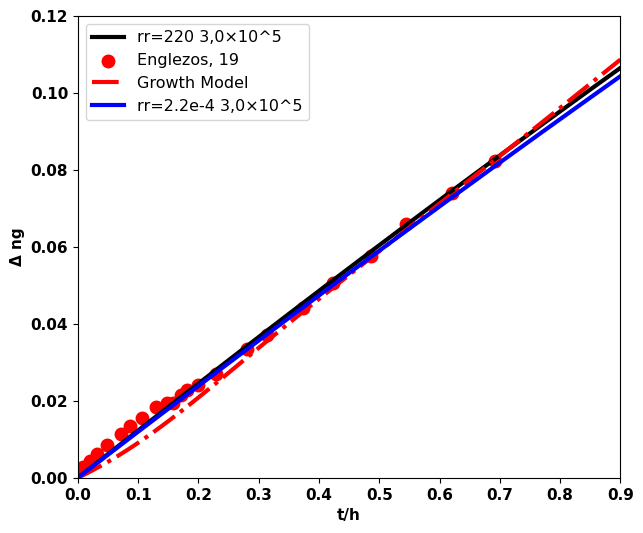

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df4 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')
df4
df5 = pd.read_excel('ycrescimento+nucleação70BARrr=2.2e-4A=300.xlsx', sheet_name='Sheet1')

# Pares de variáveis para plotar: {Eixo X: Eixo Y}
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

pares_variaveis_df5 = {
   "t(norm)": "delta ng"

}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['black', 'red', 'red']
estilos_df4 = ['-', 'o', '-.']
legendas_df4 = [
    'rr=220 3,0×10^5',
    'Englezos, 19',
    'Growth Model'
]

cores_df5 = ['blue', 'blue']  # Escolha cores diferentes para df5
estilos_df5 = ['-', '--']
legendas_df5 = [
    'rr=2.2e-4 3,0×10^5',
    'New Data (Model 2)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar pares de df4 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=4)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Loop para adicionar pares de df5 ao gráfico
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]

    if estilo == 'o':  # Para estilo de pontos
        plt.scatter(x, y, label=legenda, color=cor, linewidth=3)
    else:  # Para linhas sólidas e pontilhadas
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo, linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=11)
plt.ylabel('Δ ng', fontweight='bold', size=11)
plt.xticks(fontweight='bold', size=11)
plt.yticks(fontweight='bold', size=11)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=11.5)

# Mostrar o gráfico
plt.show()


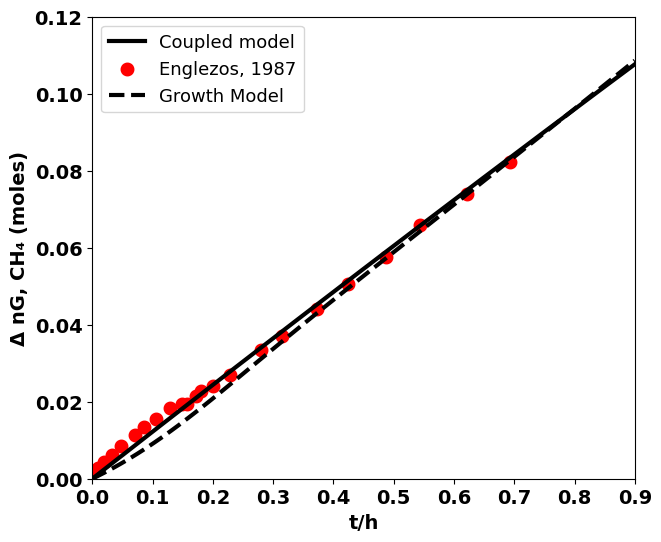

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
#df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300 RR=220')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('ycrescimento+nucleação70BARrr=2.2e-4A=170.xlsx', sheet_name='A=170000')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe


pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'red', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (274 K 66 Bar)',
    'Englezos, 1987 (276 K 70.9 Bar)',
    'Growth Model (276 K 70.9 Bar)'
]

legendas_df5 = [
    'Coupled model',
    'Englezos, 1987',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
#for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
#    x = df4[eixo_x]
#    y = df4[eixo_y]
#    if estilo == 'o':
 #       plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
 #   else:
 #       plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=4)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ nG, CH₄ (moles)', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)


# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=13)

# Mostrar o gráfico
plt.show()


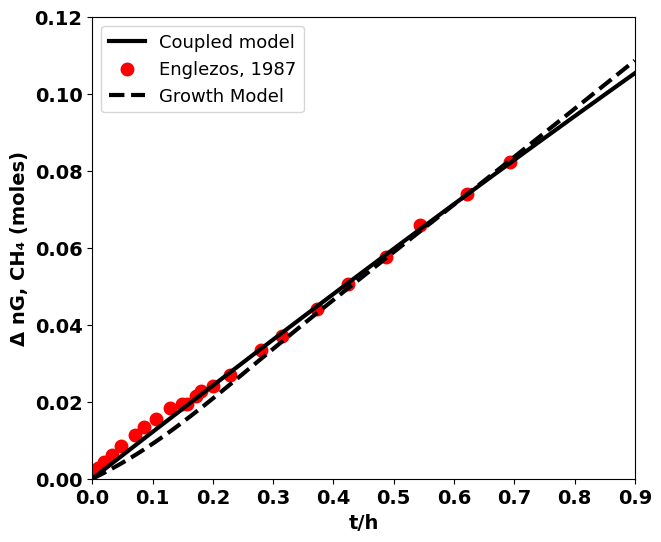

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
#df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300 RR=220')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('ycrescimento+nucleação70BARrr=220A=170.xlsx', sheet_name='rr=220')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe


pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'red', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (274 K 66 Bar)',
    'Englezos, 1987 (276 K 70.9 Bar)',
    'Growth Model (276 K 70.9 Bar)'
]

legendas_df5 = [
    'Coupled model',
    'Englezos, 1987',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
#for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
#    x = df4[eixo_x]
#    y = df4[eixo_y]
#    if estilo == 'o':
 #       plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
 #   else:
 #       plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=4)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ nG, CH₄ (moles)', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)


# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=13)

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
#df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300 RR=220')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('70BARrr=220A=300.xlsx', sheet_name='A=300 rr=220')

# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'red', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (274 K 66 Bar)',
    'Englezos, 1987 (276 K 70.9 Bar)',
    'Growth Model (276 K 70.9 Bar)'
]

legendas_df5 = [
    'Coupled model',
    'Englezos, 1987',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
#for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
#    x = df4[eixo_x]
#    y = df4[eixo_y]
#    if estilo == 'o':
 #       plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
 #   else:
 #       plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=4)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ ng', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=13)

# Mostrar o gráfico
plt.show()


rr=2.2e-4 A=170

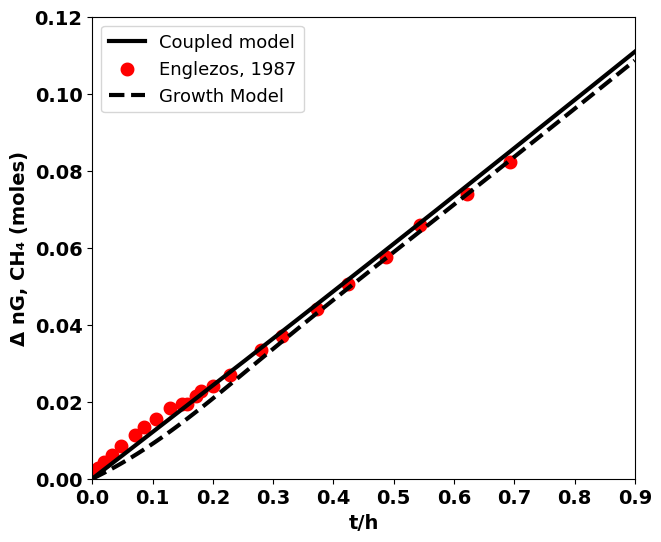

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
#df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300 RR=220')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('output_datanu+cresA=1.7E2P=70 bar.xlsx', sheet_name='rr=2.2e-4')

# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'red', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (274 K 66 Bar)',
    'Englezos, 1987 (276 K 70.9 Bar)',
    'Growth Model (276 K 70.9 Bar)'
]

legendas_df5 = [
    'Coupled model',
    'Englezos, 1987',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
#for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
#    x = df4[eixo_x]
#    y = df4[eixo_y]
#    if estilo == 'o':
 #       plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
 #   else:
 #       plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=4)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ nG, CH₄ (moles)', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=13)

# Mostrar o gráfico
plt.show()


A=300 rr=220

Novo resultado A=30000 rr=220



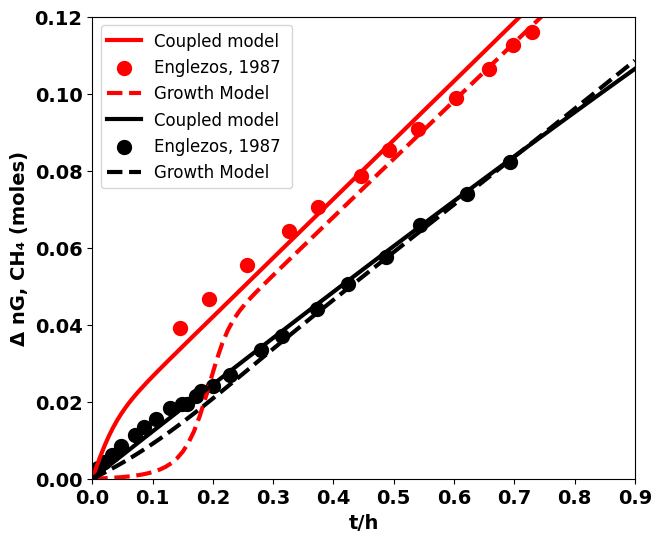

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
df4 = pd.read_excel('ycrescimento+nucleação66BARrr=2.2e-4A=300 (1).xlsx', sheet_name='rr=220')
df4
# Carregar os dados do segundo arquivo
df5 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'black', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model',
    'Englezos, 1987 ',
    'Growth Model'
]

legendas_df5 = [
    'Coupled model ',
    'Englezos, 1987 ',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ nG, CH₄ (moles)', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=12)

# Mostrar o gráfico
plt.show()


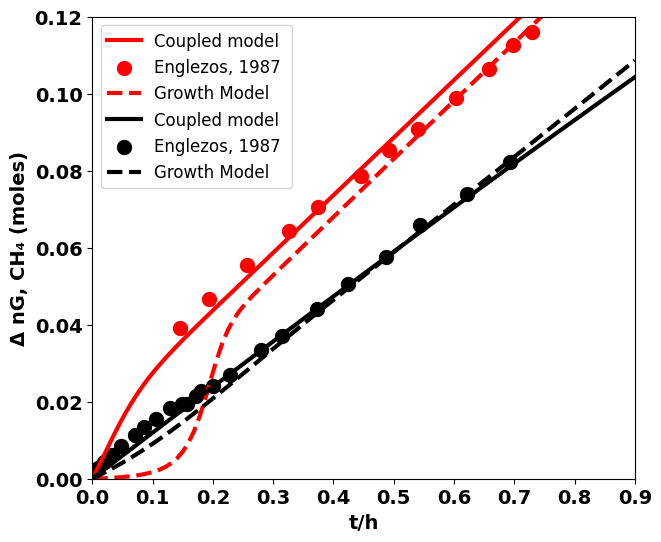

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
df4 = pd.read_excel('ycrescimento+nucleação66BAR A=300 (1).xlsx', sheet_name='A=300 RR=2.2E-4')
df4
# Carregar os dados do segundo arquivo
df5 = pd.read_excel('ycrescimento+nucleação70BARrr=2.2e-4A=300.xlsx', sheet_name='Sheet1')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'black', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model',
    'Englezos, 1987 ',
    'Growth Model'
]

legendas_df5 = [
    'Coupled model ',
    'Englezos, 1987 ',
    'Growth Model'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=14)
plt.ylabel('Δ nG, CH₄ (moles)', fontweight='bold', size=14)
plt.xticks(fontweight='bold', size=14)
plt.yticks(fontweight='bold', size=14)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=12)

# Mostrar o gráfico
plt.show()


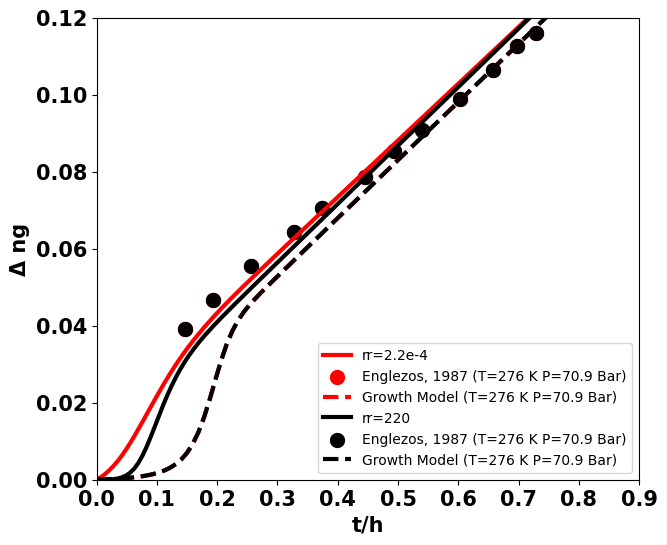

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
df4 = pd.read_excel('ycrescimento+nucleação66BARrr=220A=170 (1).xlsx', sheet_name='rr=2.2e-4')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('ycrescimento+nucleação66BARrr=220A=170 (1).xlsx', sheet_name='Sheet1')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'black', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'rr=2.2e-4',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

legendas_df5 = [
    'rr=220',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=15)
plt.ylabel('Δ ng', fontweight='bold', size=15)
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=10)

# Mostrar o gráfico
plt.show()


#A=170 rr=2.2e-4

A=300 rr=2.2e-4

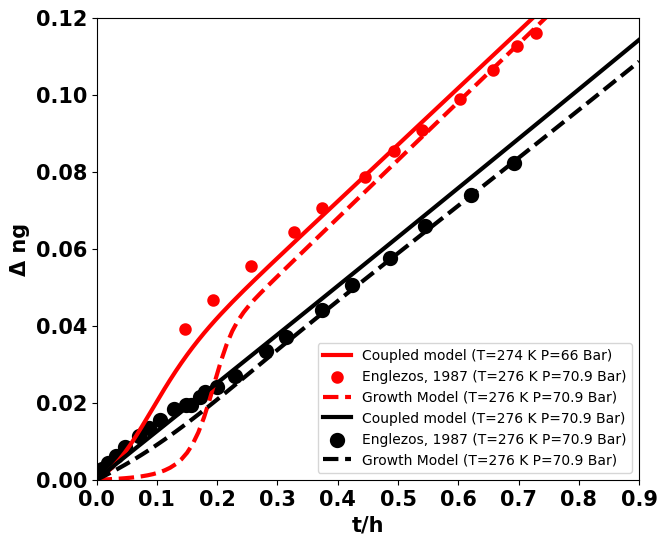

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
df4 = pd.read_excel('ycrescimento+nucleação66BAR.xlsx', sheet_name='A=300')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('dadoscrescimento atualizado.xlsx', sheet_name='A=300')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng.1",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'black', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

legendas_df5 = [
    'Coupled model (T=276 K P=70.9 Bar)',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=15)
plt.ylabel('Δ ng', fontweight='bold', size=15)
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=10)

# Mostrar o gráfico
plt.show()


A=170 rr=220


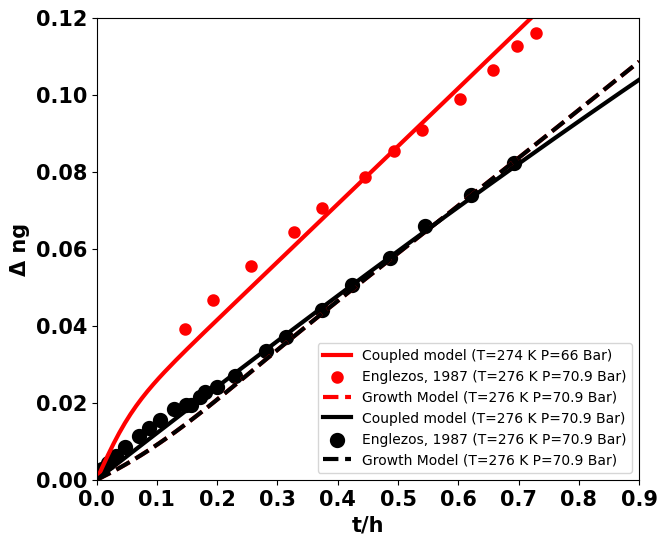

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do primeiro arquivo
df4 = pd.read_excel('ycrescimento+nucleação66BAR (2).xlsx', sheet_name='rr=220 A=1.7e2')

# Carregar os dados do segundo arquivo
df5 = pd.read_excel('yreacao+dif (2).xlsx', sheet_name='rr=220 ')
df5
# Pares de variáveis para plotar: {Eixo X: Eixo Y} - para cada dataframe
pares_variaveis_df4 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h) Ingrid": "ngnorm(mol) Ingrid"
}

pares_variaveis_df5 = {
    "t(norm)": "delta ng",
    "t(h)": "ng",
    "tnorm(h ingrid)": "ngnorm(mol ingrid)"
}

# Lista de cores e estilos para os pares de variáveis
cores_df4 = ['red', 'red', 'red']
estilos_df4 = ['-', 'o', '--']

cores_df5 = ['black', 'black', 'black']
estilos_df5 = ['-', 'o', '--']

legendas_df4 = [
    'Coupled model (T=274 K P=66 Bar)',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

legendas_df5 = [
    'Coupled model (T=276 K P=70.9 Bar)',
    'Englezos, 1987 (T=276 K P=70.9 Bar)',
    'Growth Model (T=276 K P=70.9 Bar)'
]

# Criar o gráfico
plt.figure(figsize=(7, 6))

# Loop para adicionar os pares de variáveis do primeiro dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df4.items(), cores_df4, estilos_df4, legendas_df4):
    x = df4[eixo_x]
    y = df4[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=3)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Loop para adicionar os pares de variáveis do segundo dataframe
for (eixo_x, eixo_y), cor, estilo, legenda in zip(pares_variaveis_df5.items(), cores_df5, estilos_df5, legendas_df5):
    x = df5[eixo_x]
    y = df5[eixo_y]
    if estilo == 'o':
        plt.scatter(x, y, label=legenda, color=cor,linewidth=5)
    else:
        plt.plot(x, y, label=legenda, color=cor, linestyle=estilo,linewidth=3)

# Adicionar título e rótulos aos eixos
plt.xlabel('t/h', fontweight='bold', size=15)
plt.ylabel('Δ ng', fontweight='bold', size=15)
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)

# Adicionar limites opcionais para os eixos
plt.xlim(0, 0.9)
plt.ylim(0, 0.12)

# Adicionar uma legenda para identificar cada linha
plt.legend(fontsize=10)

# Mostrar o gráfico
plt.show()


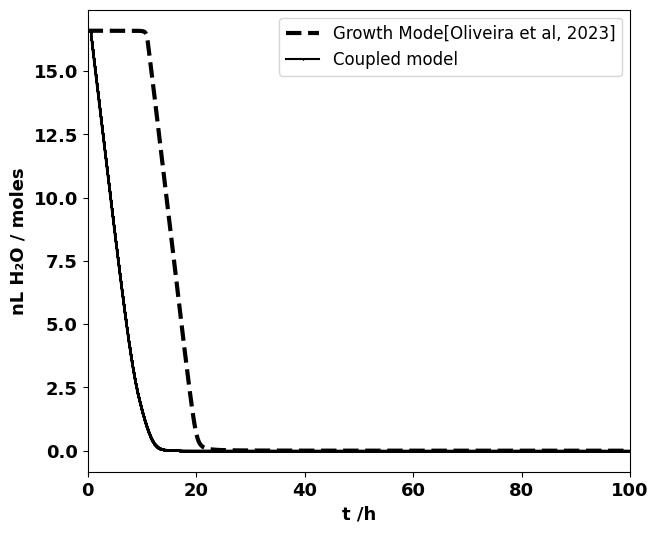

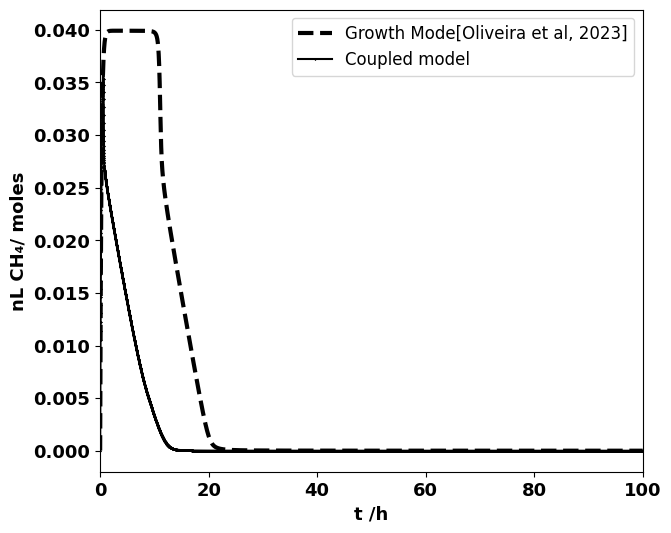

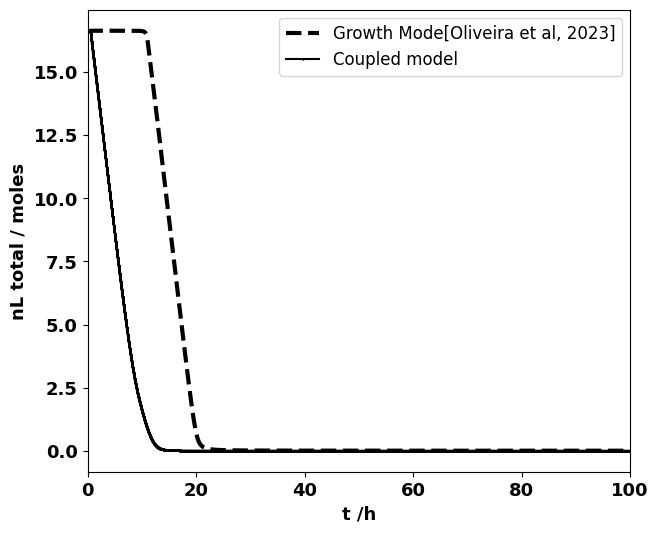

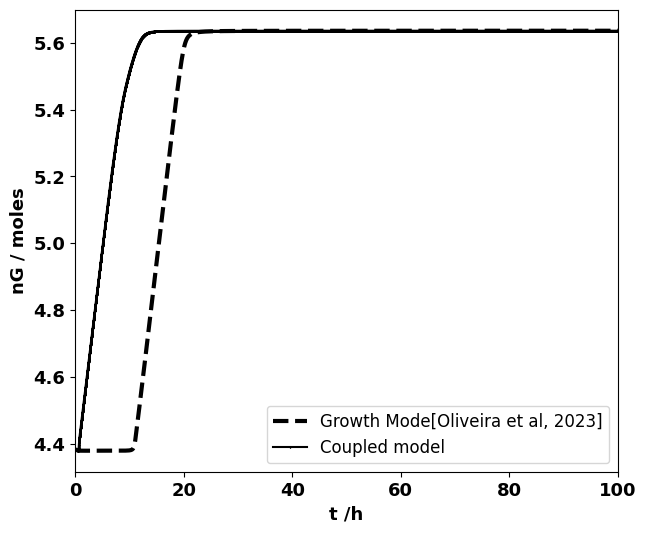

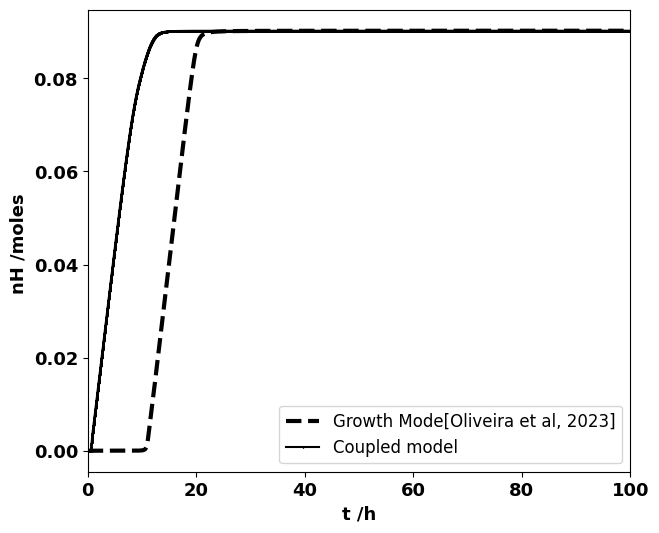

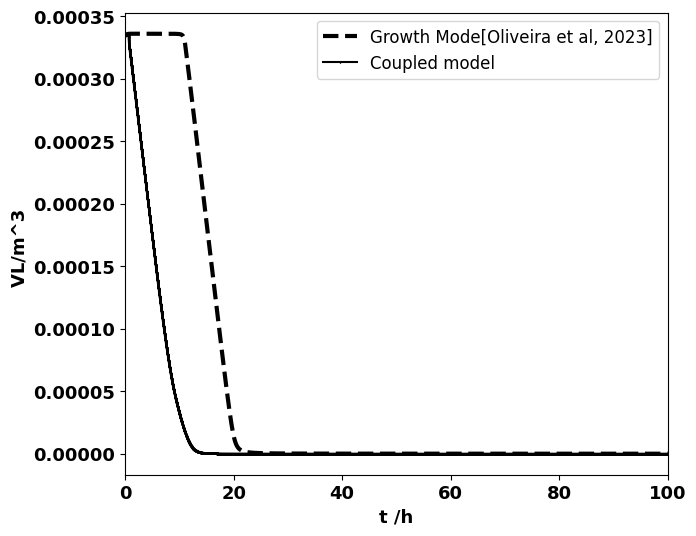

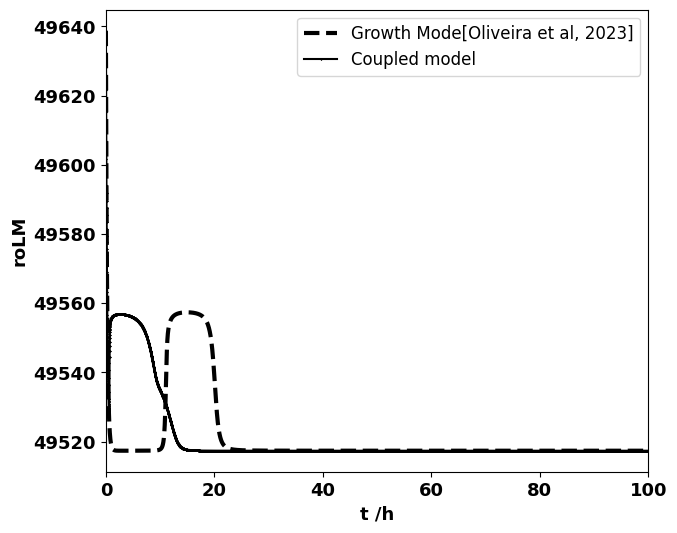

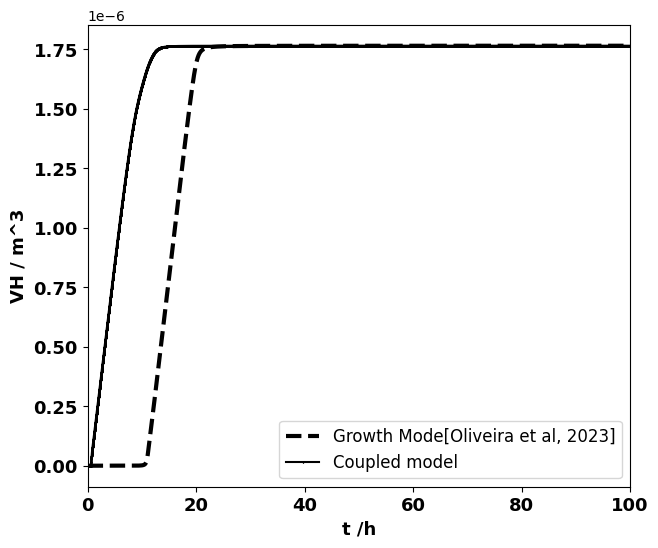

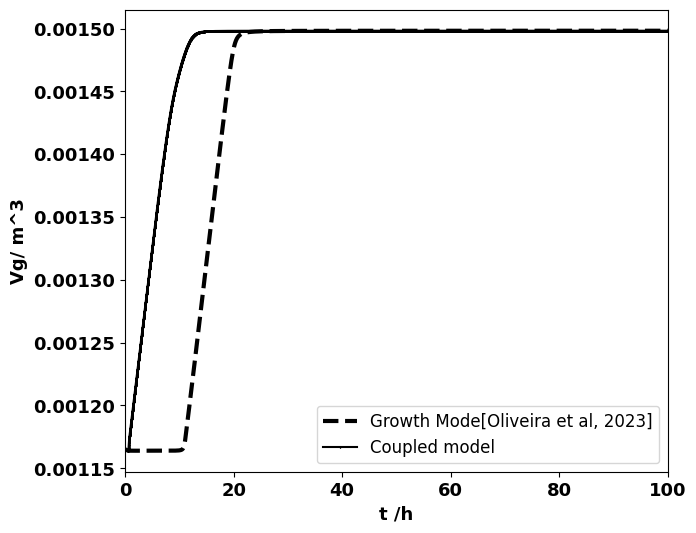

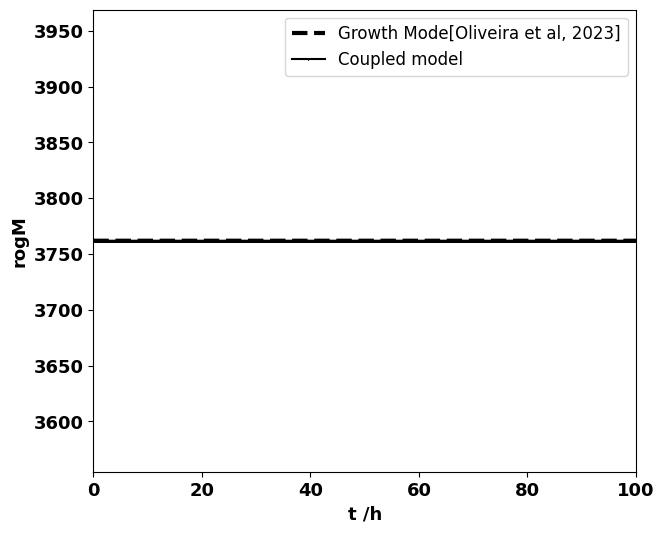

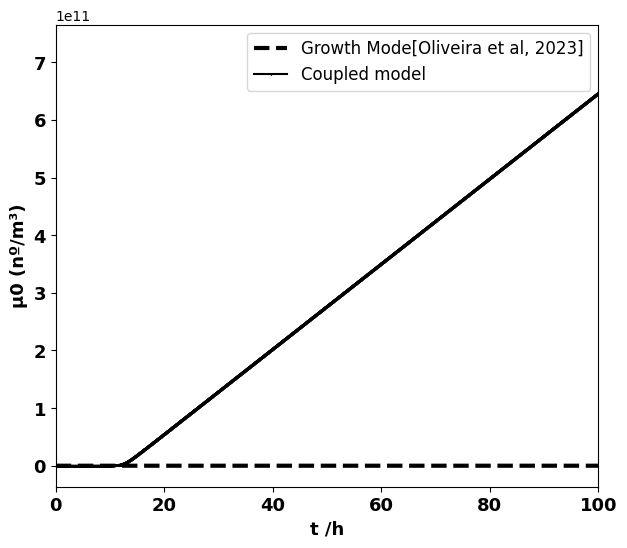

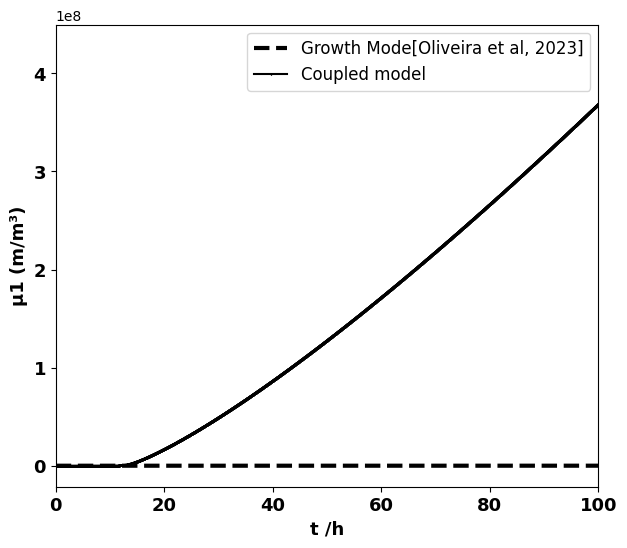

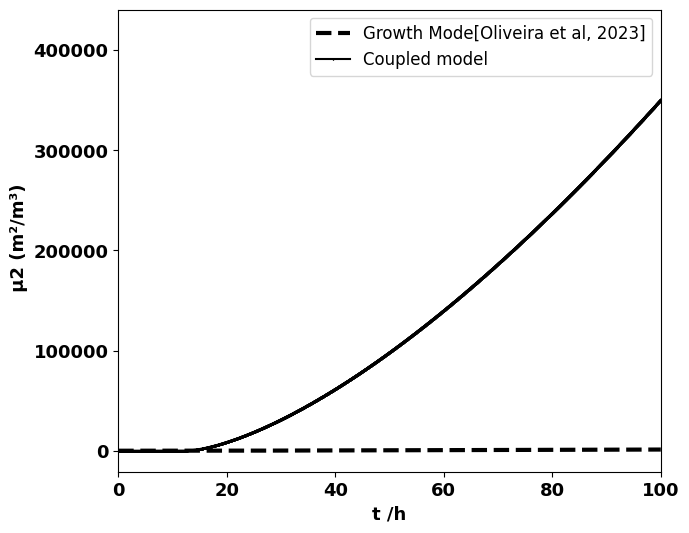

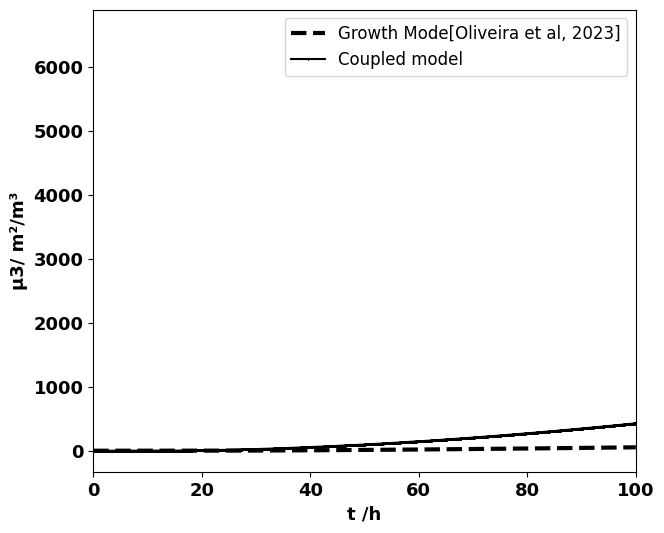

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('yreacao+dif.xlsx', sheet_name='crescimento')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
   "nL H₂O / moles", "nL CH₄/ moles", "nL total / moles", "nG / moles", "nH /moles ", "VL/m^3 ", "roLM", "VH / m^3", "Vg/ m^3", "rogM",
    "μ0 (nº/m³)", "μ1 (m/m³)", " μ2 (m²/m³)", "μ3/ m²/m³"
]



# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(7, 6))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Mode[Oliveira et al, 2023]', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Coupled model', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0, 100)

    # Adicione uma legenda
    plt.legend(fontsize=12)
    # Mostre o gráfico
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

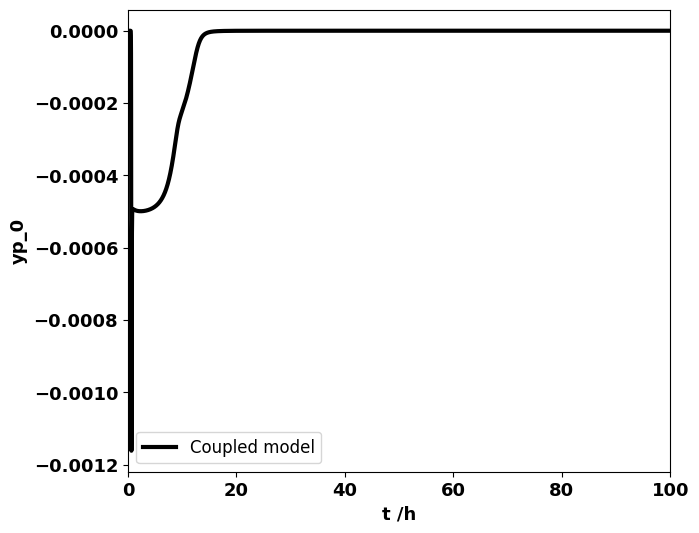

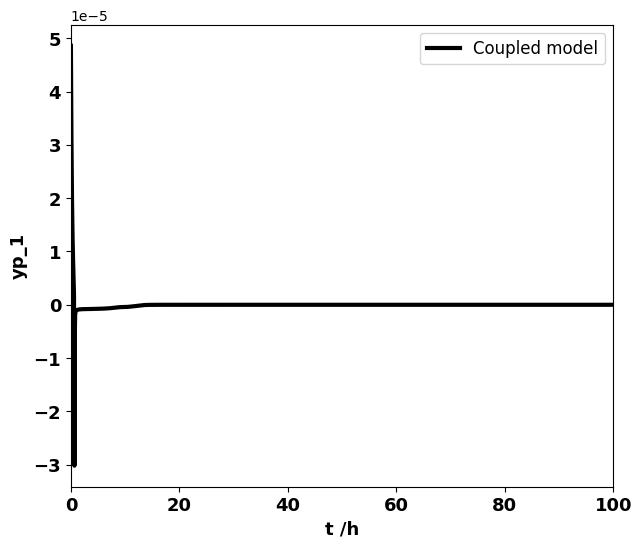

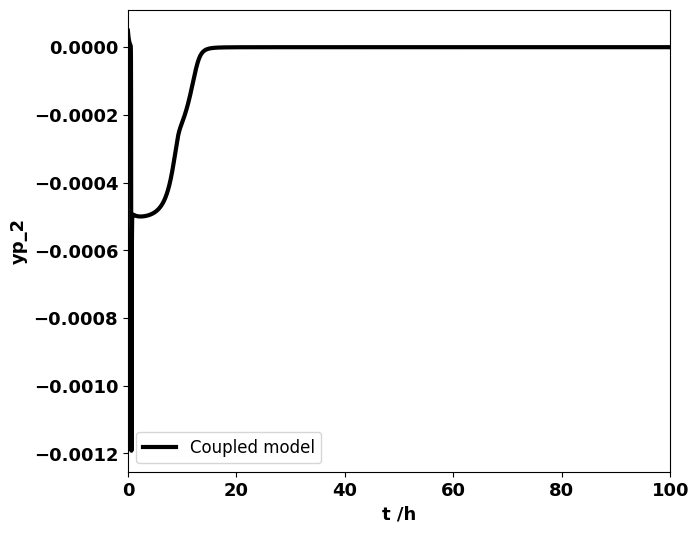

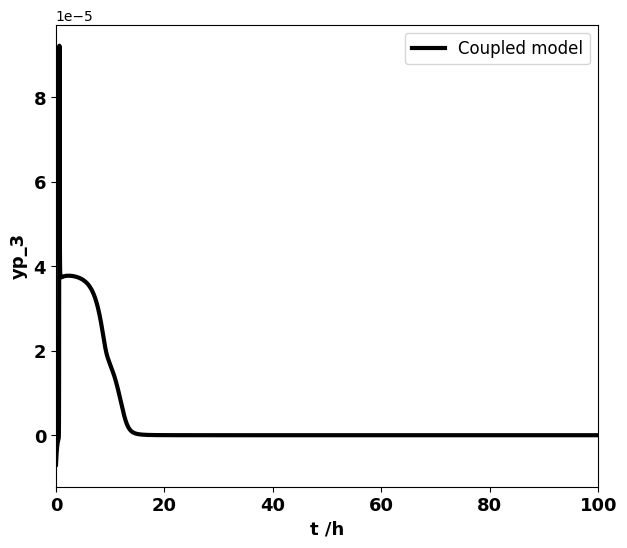

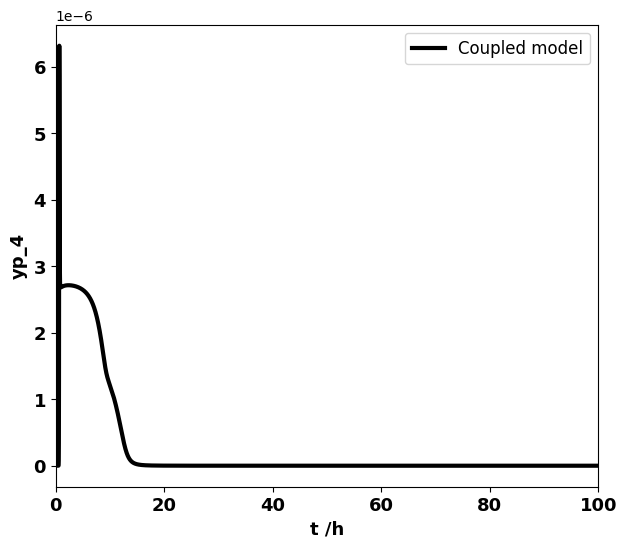

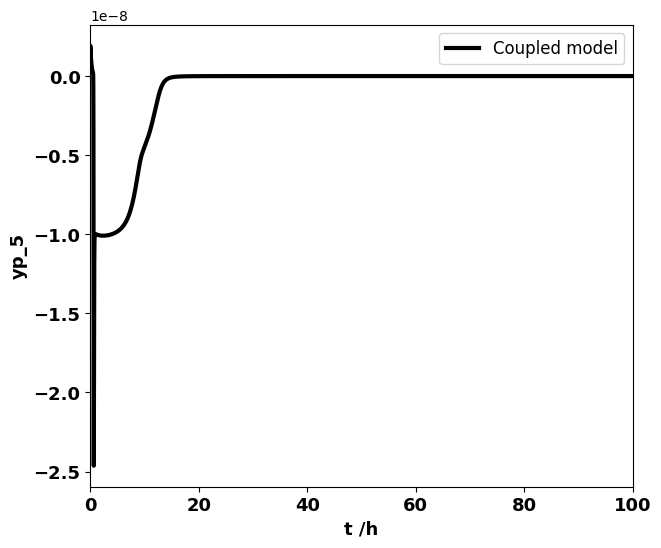

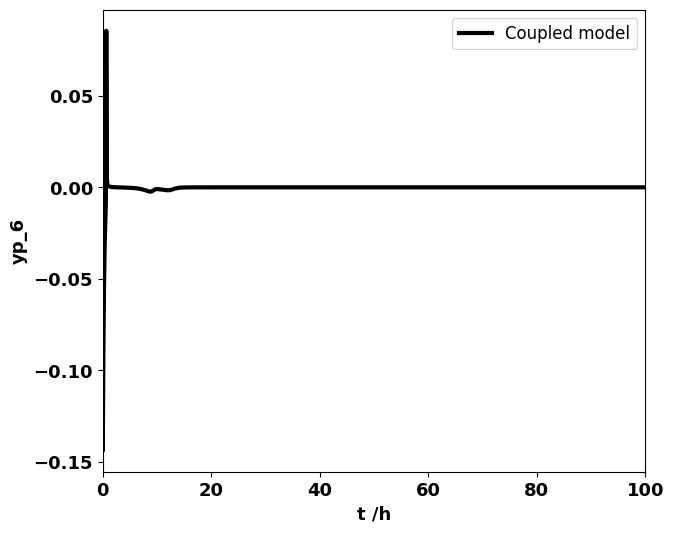

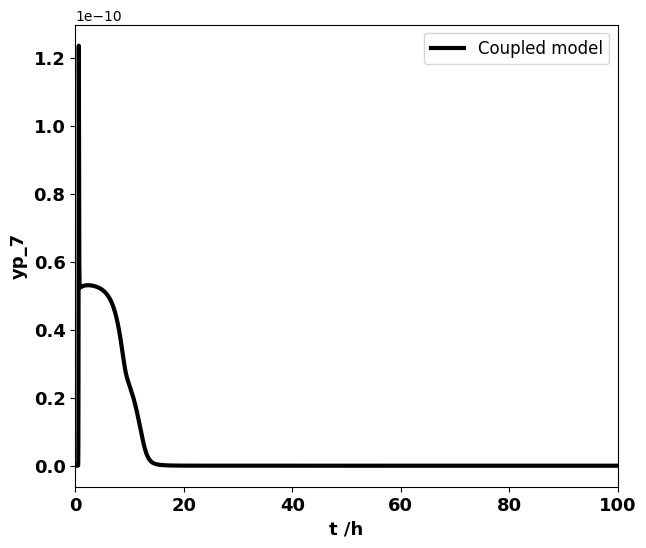

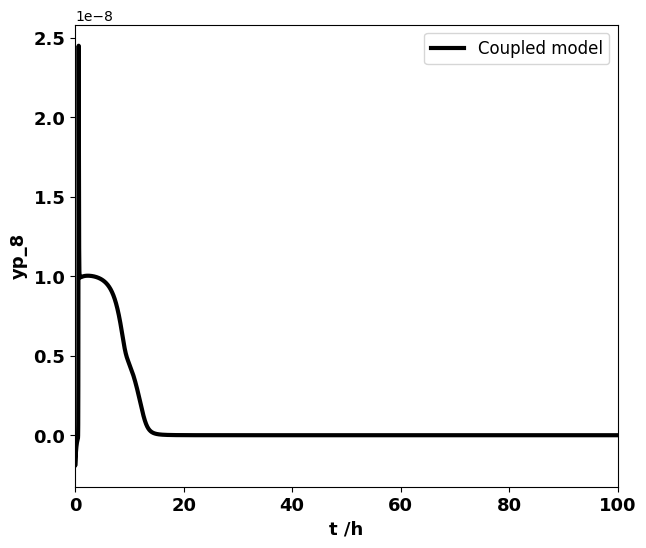

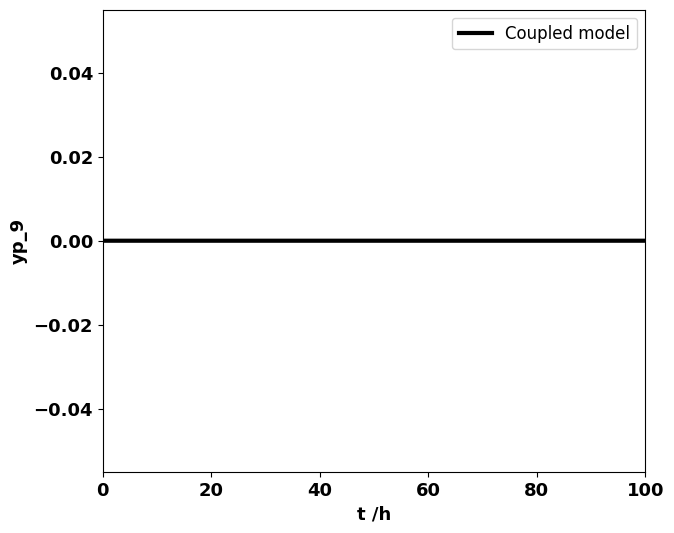

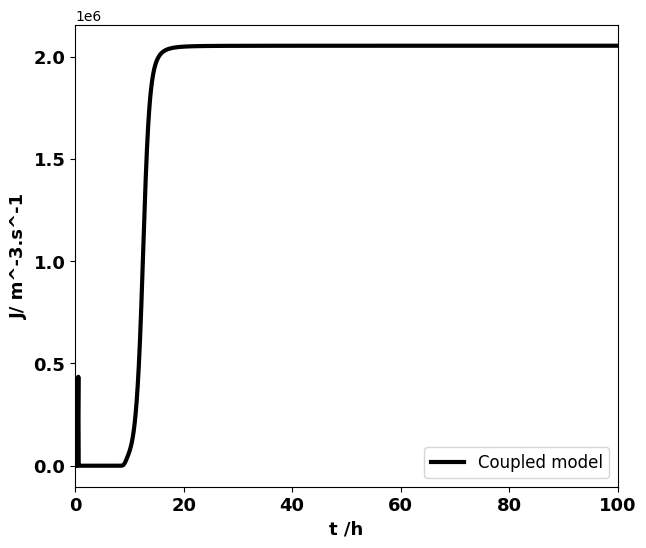

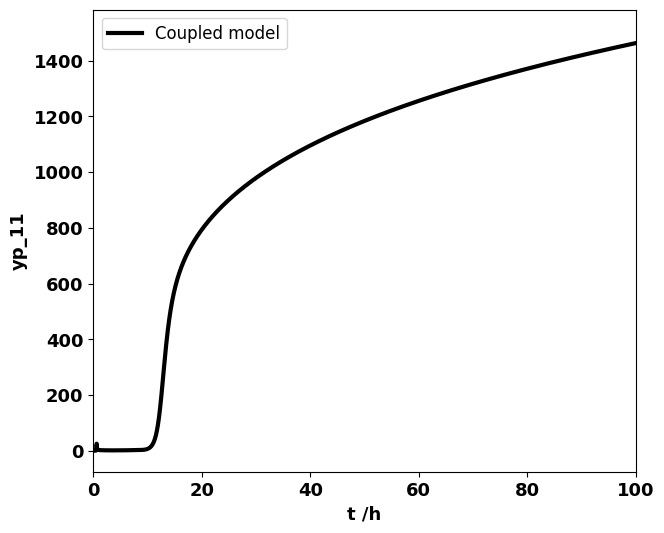

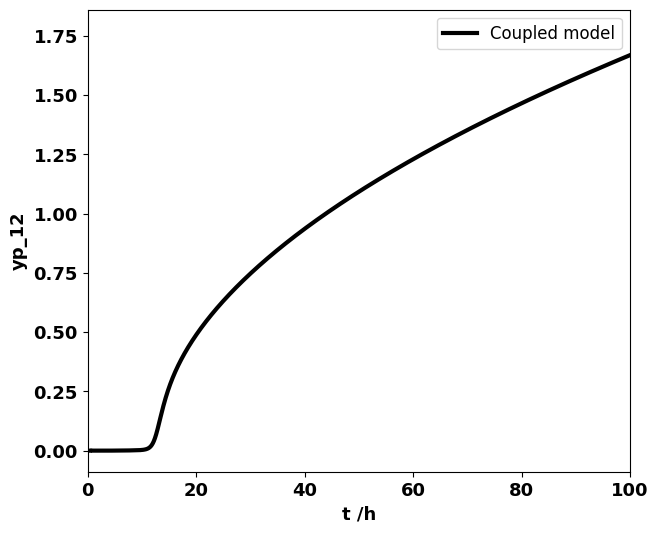

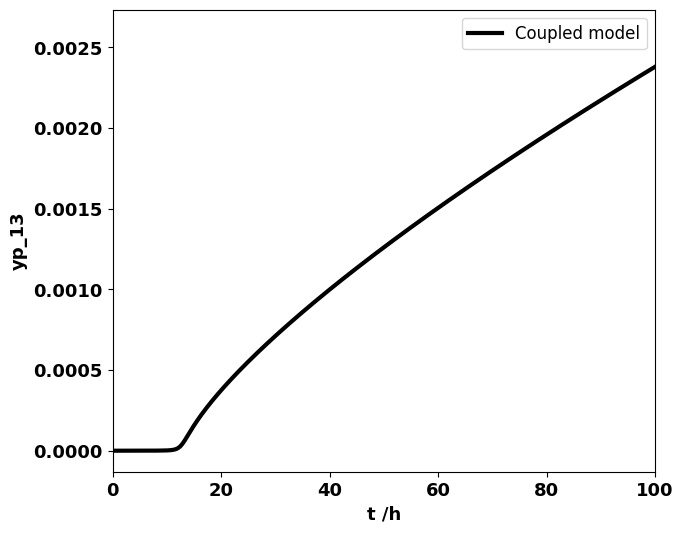

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1')
df1
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
"yp_0", "yp_1", "yp_2", "yp_3", "yp_4", "yp_5", "yp_6", "yp_7", "yp_8", "yp_9", "J/ m^-3.s^-1", "yp_11", "yp_12", "yp_13"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'yp_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    #x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(7, 6))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Coupled model', markersize=1,color='black', linewidth=3 )

    # Plote os dados do segundo arquivo
    #plt.plot(x2, y2, label='Coupled model', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0, 100)

    # Adicione uma legenda
    plt.legend(fontsize=12)
    # Mostre o gráfico
    plt.show()


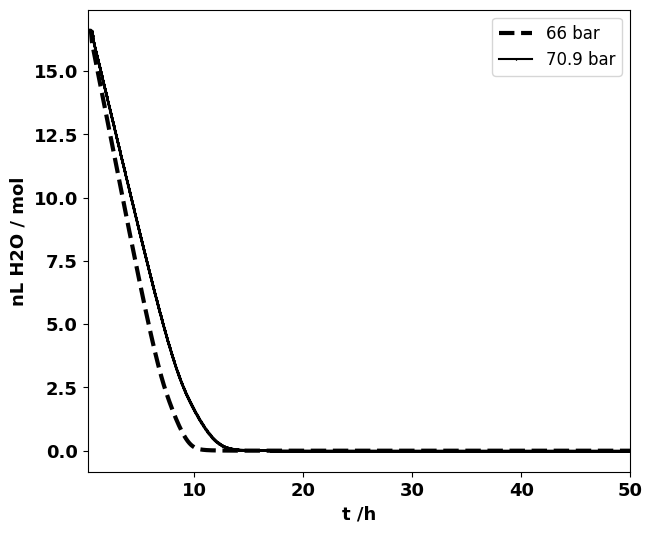

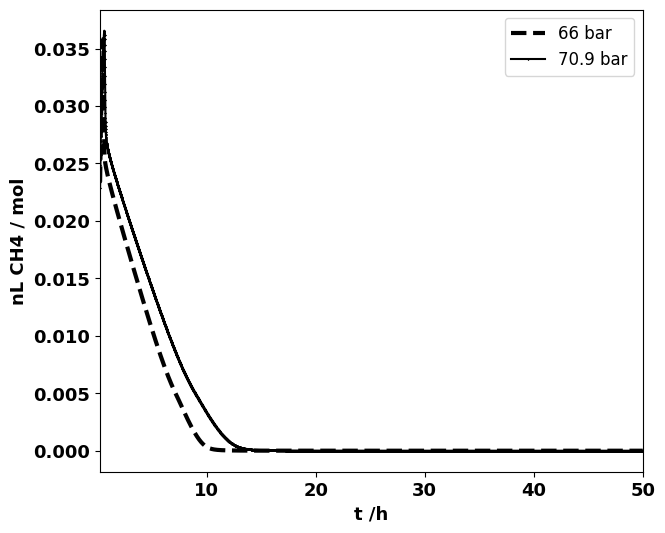

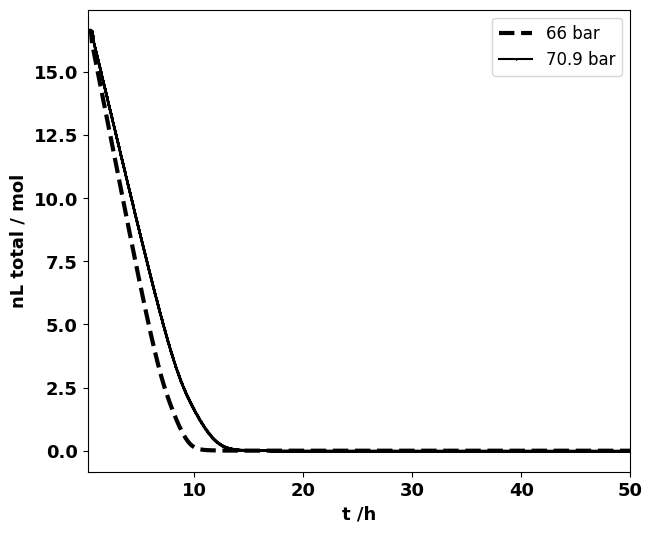

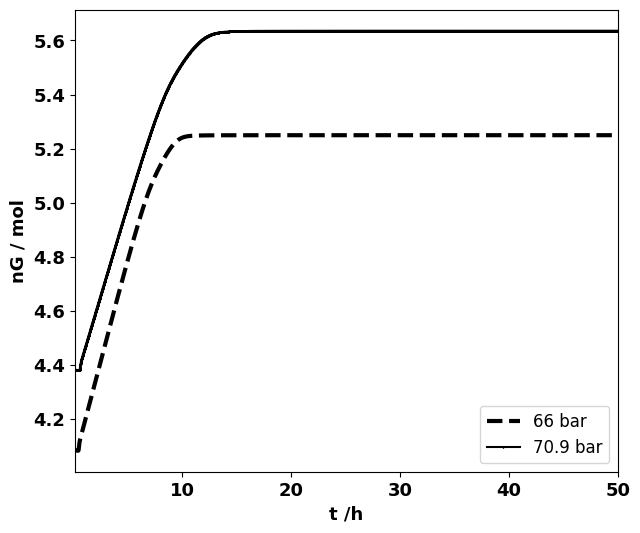

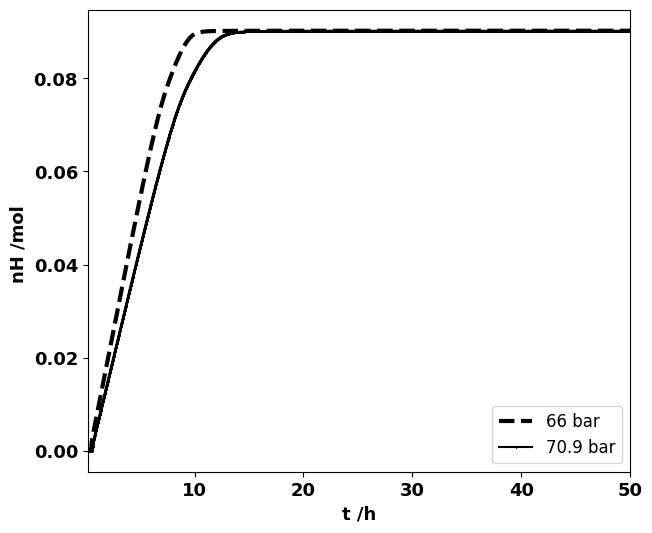

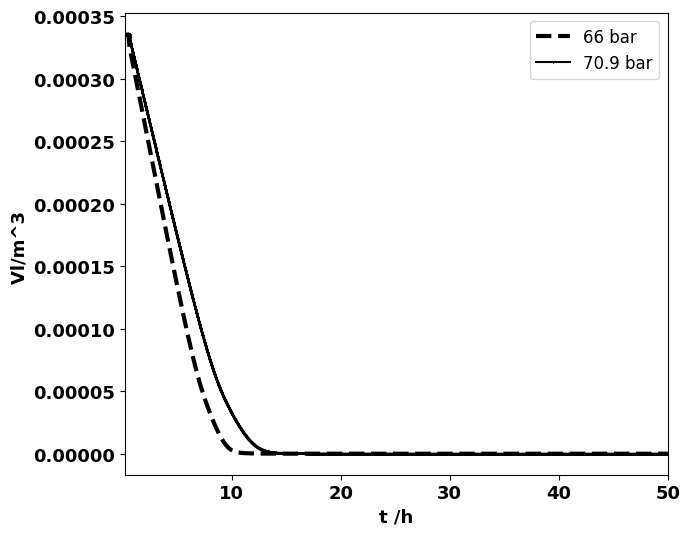

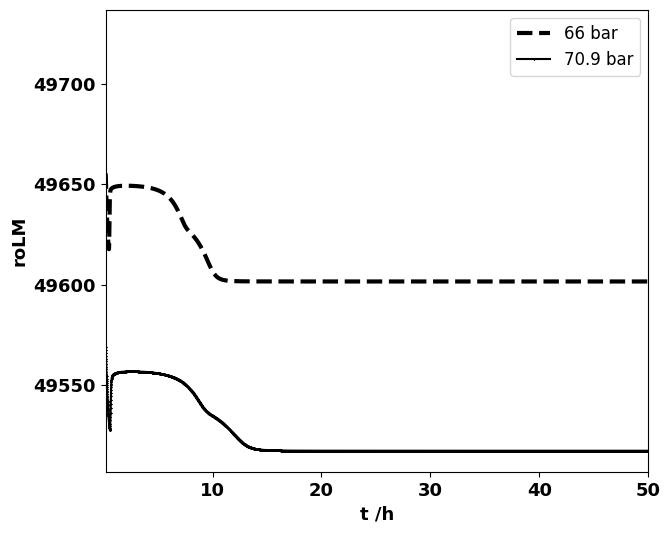

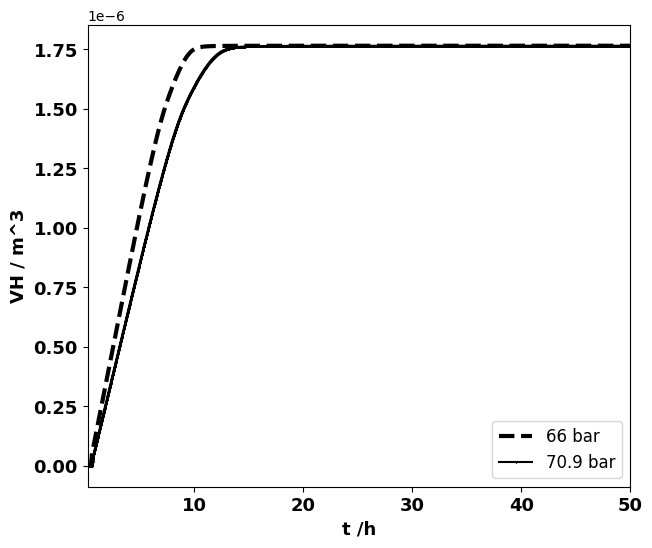

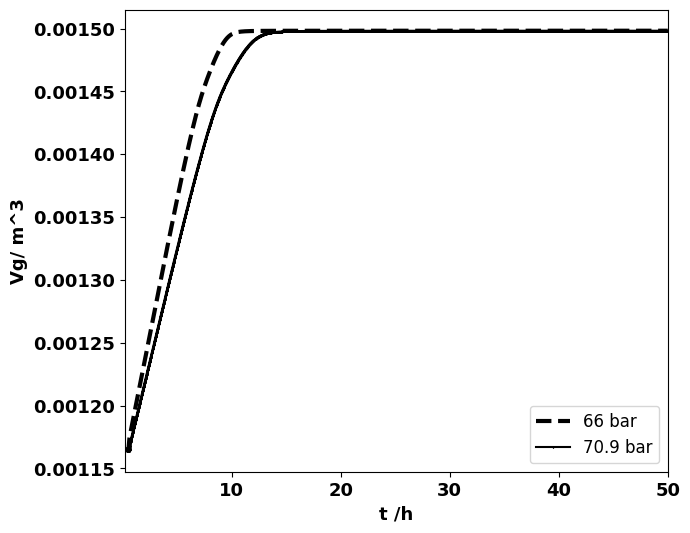

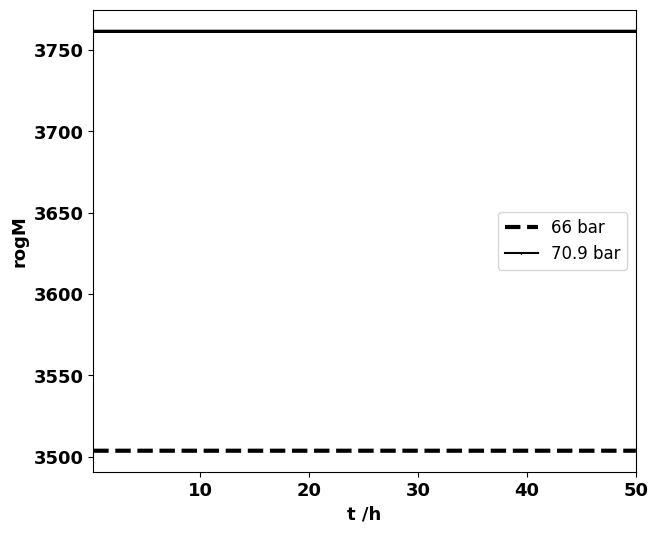

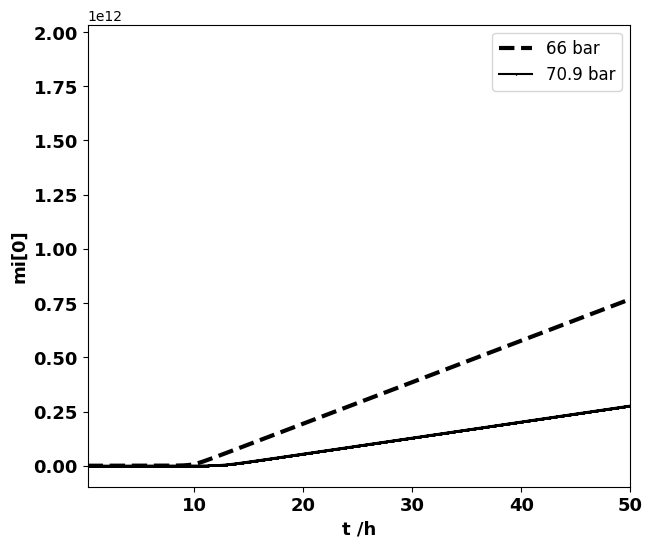

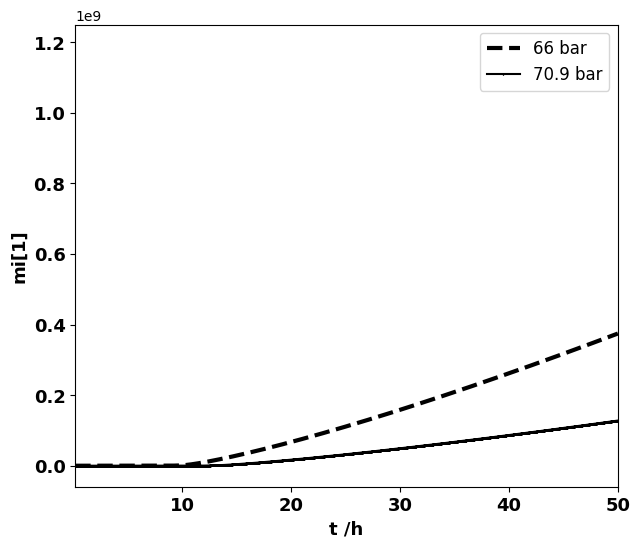

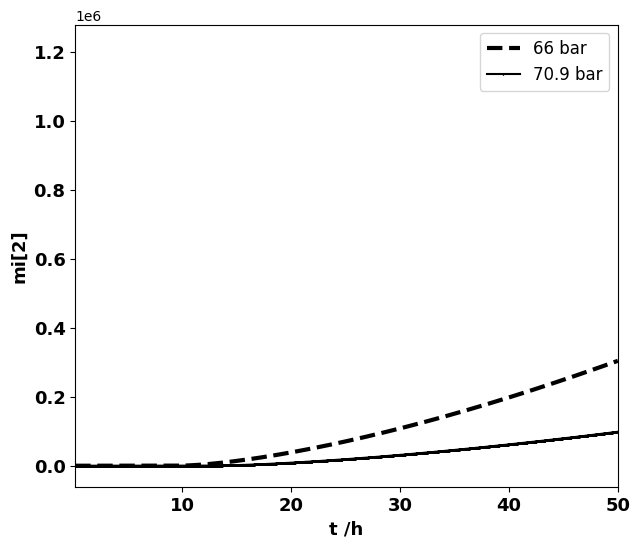

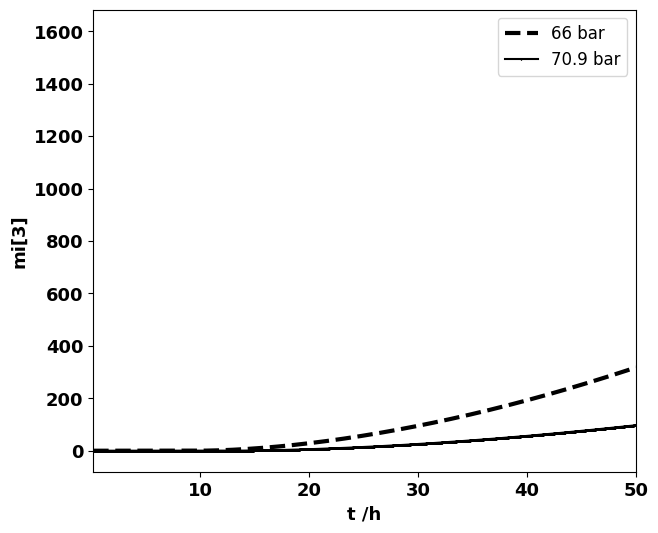

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('ycrescimento+nucleação66BARrr=2.2e-4A=300 (1).xlsx', sheet_name='rr=220')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
   "nL H2O / mol", "nL CH4 / mol", "nL total / mol", "nG / mol", "nH /mol ", "Vl/m^3 ", "roLM", "VH / m^3", "Vg/ m^3", "rogM",
    "mi[0]", "mi[1]", "mi[2]", "mi[3]"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(7, 6))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='66 bar ', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='70.9 bar', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0.2, 50)

    # Adicione uma legenda
    plt.legend(fontsize=12)
    # Mostre o gráfico
    plt.show()


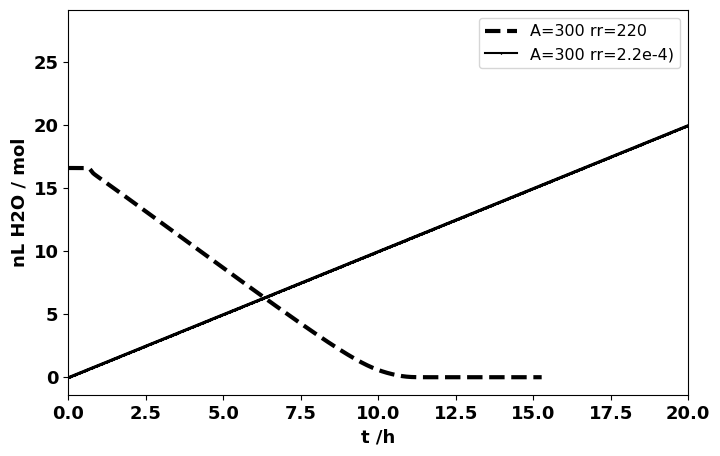

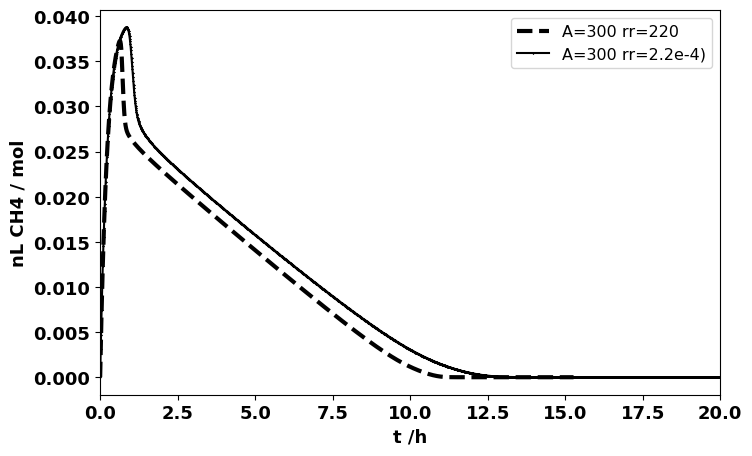

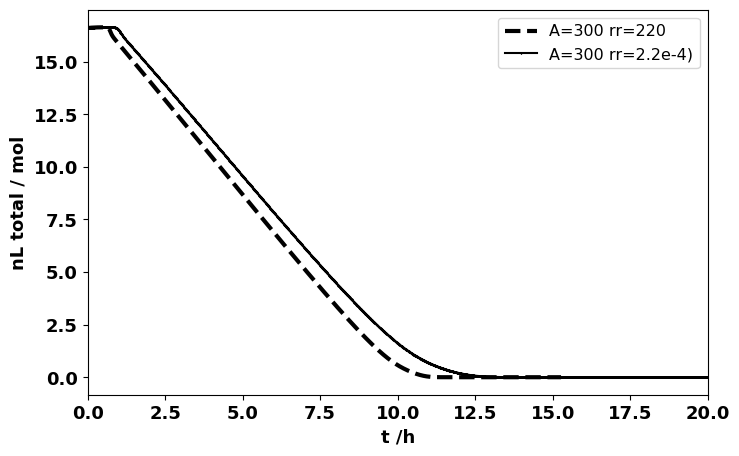

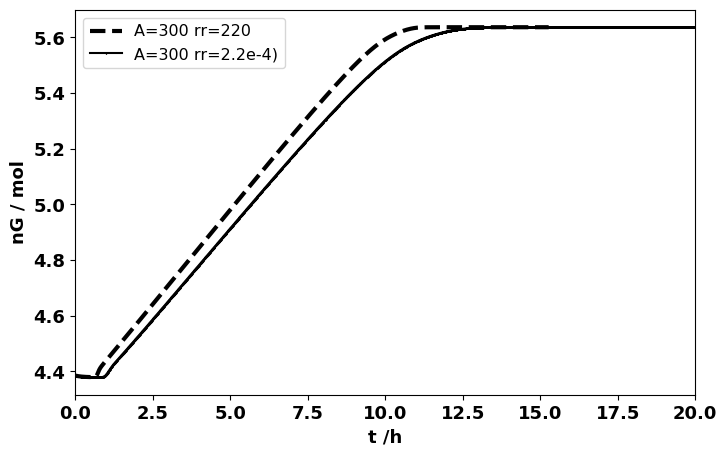

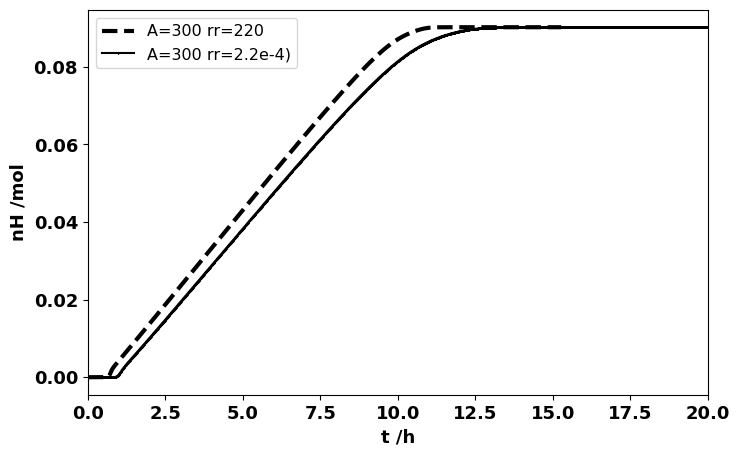

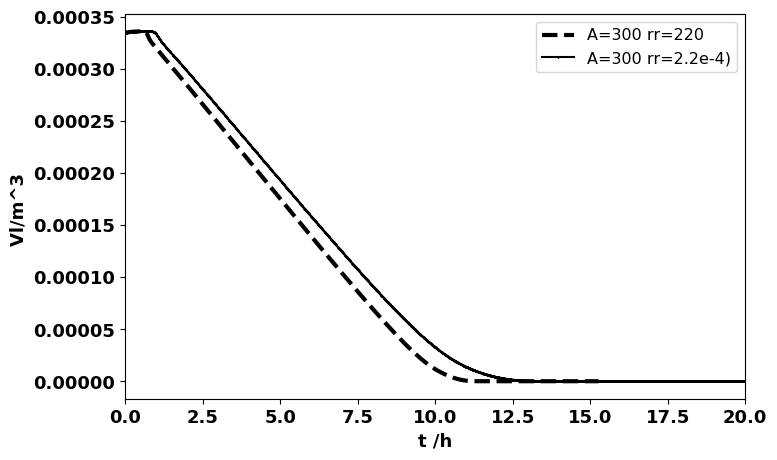

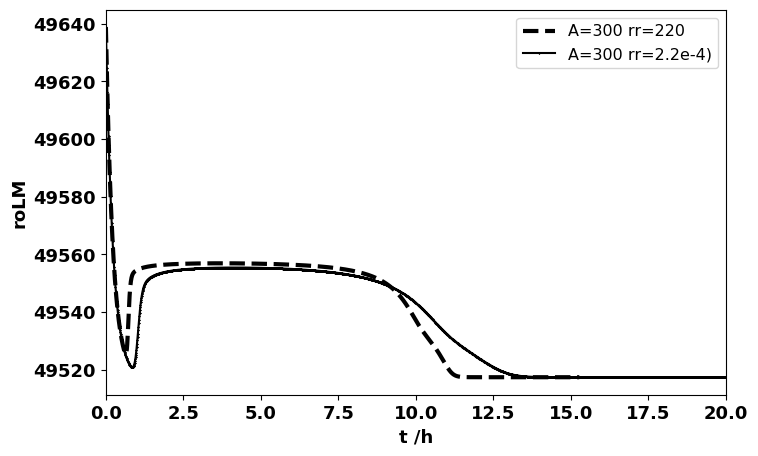

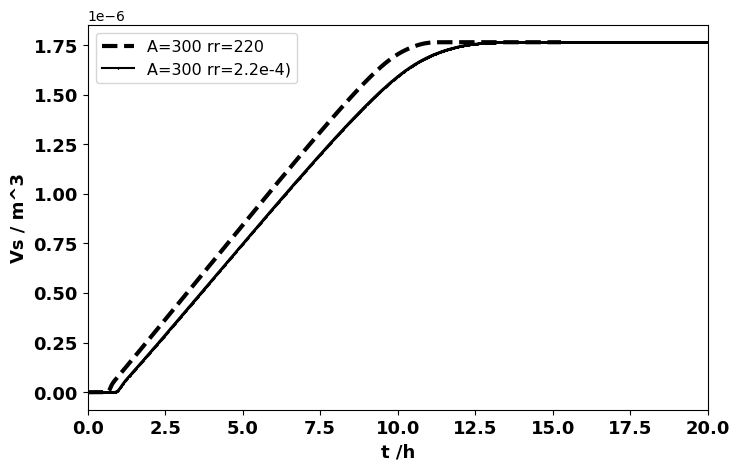

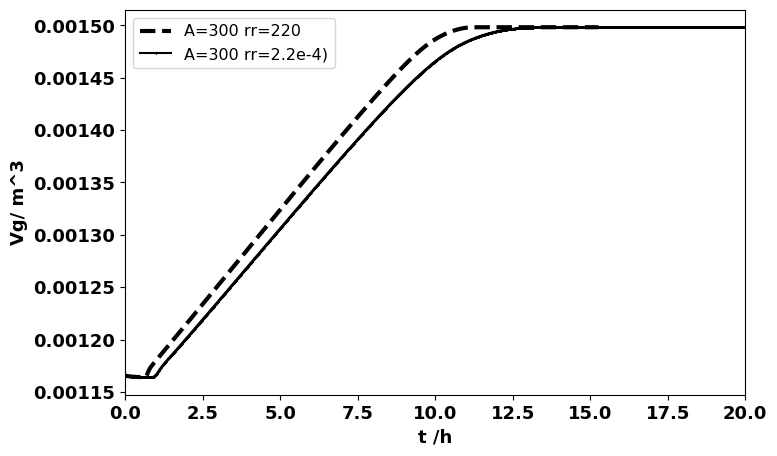

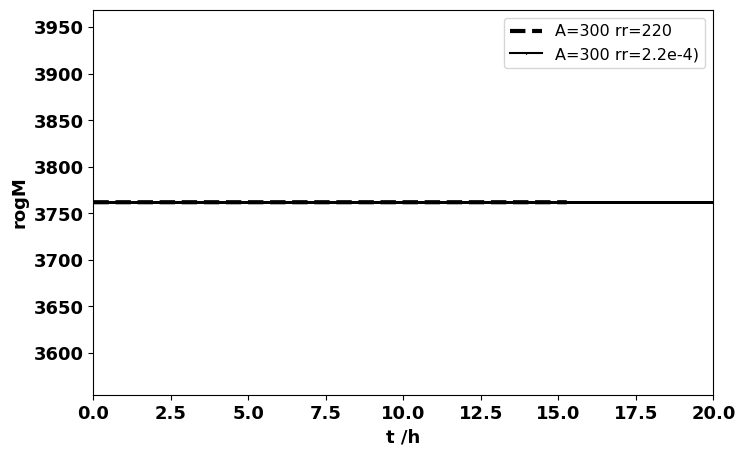

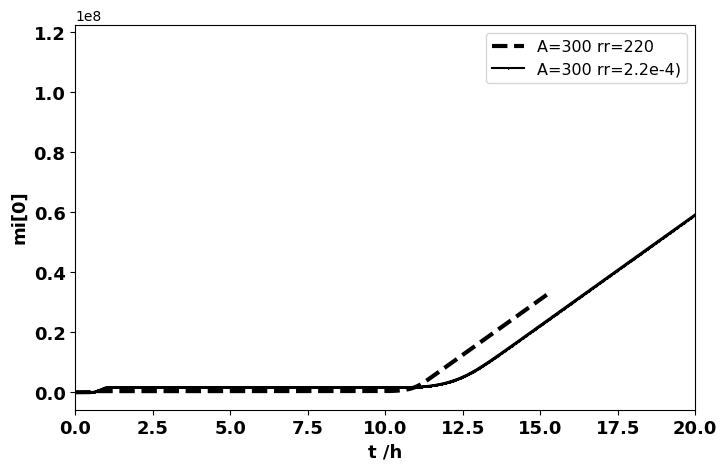

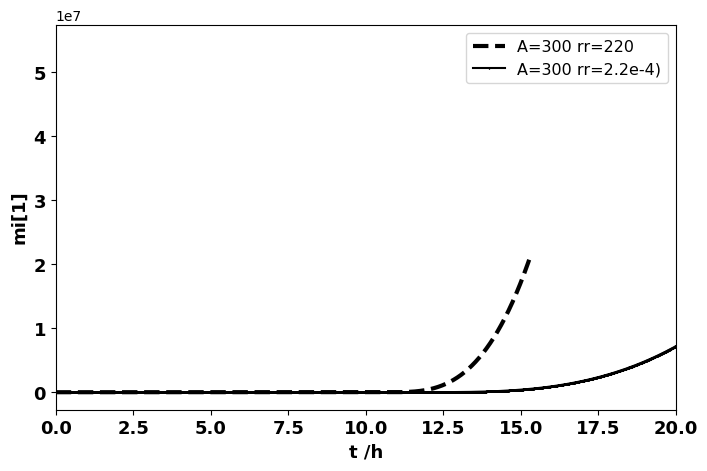

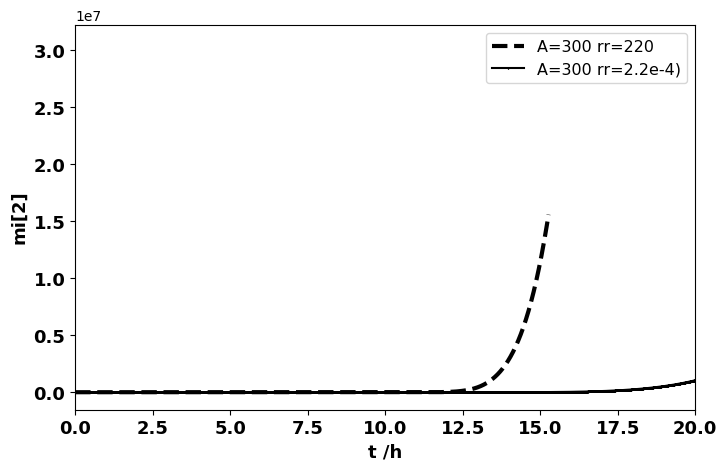

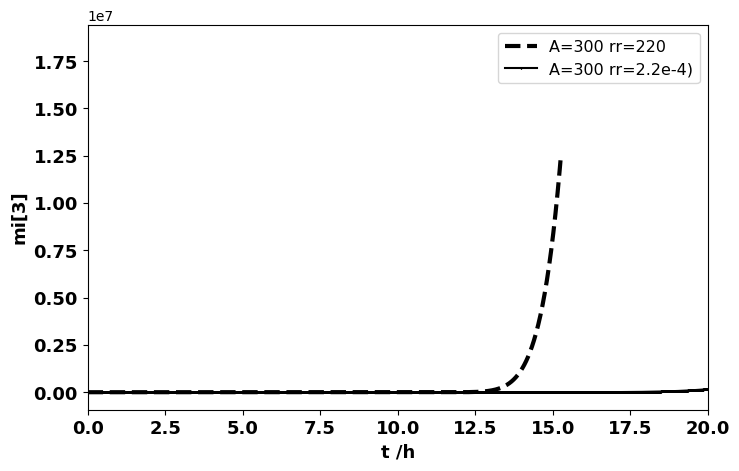

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('70BARrr=220A=300 (1).xlsx', sheet_name='A=300 rr=220')
df2 = pd.read_excel('70BARrr=220A=300 (1).xlsx', sheet_name='A=300')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
    "nL H2O / mol", "nL CH4 / mol", "nL total / mol", "nG / mol", "nH /mol ", "Vl/m^3 ", "roLM", "VH / m^3", "Vg/ m^3", "rogM",
    "mi[0]", "mi[1]", "mi[2]", "mi[3]"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(8, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='A=300 rr=220 ', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='A=300 rr=2.2e-4)', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0, 20)

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


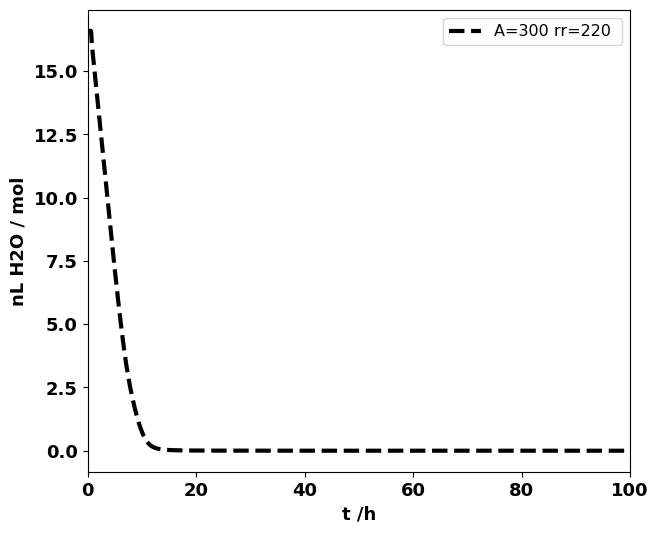

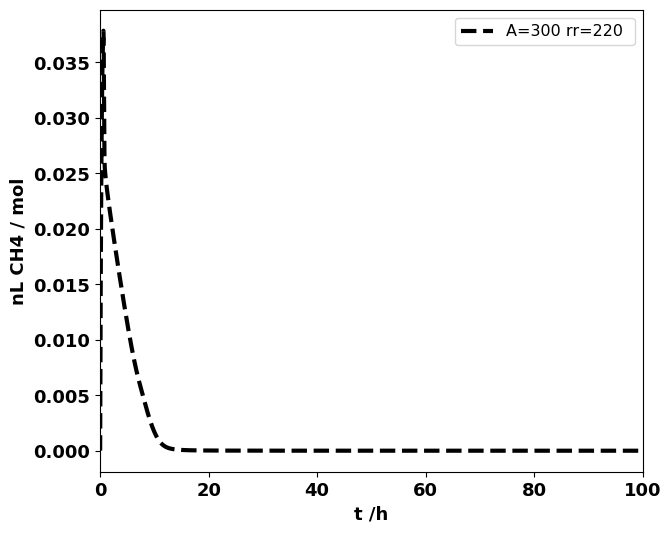

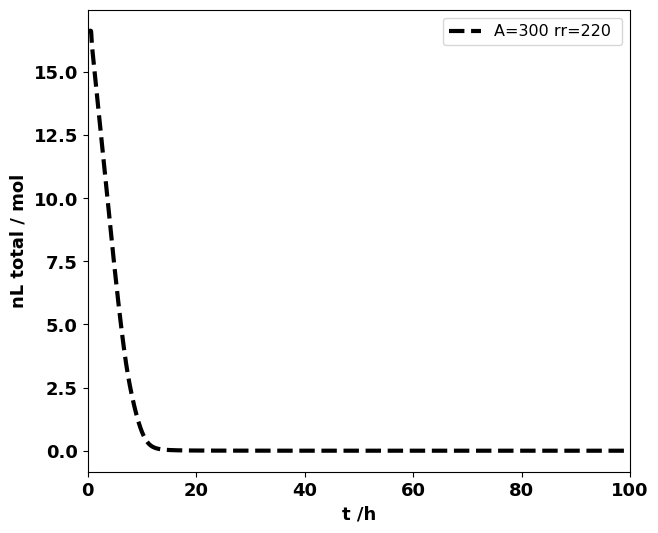

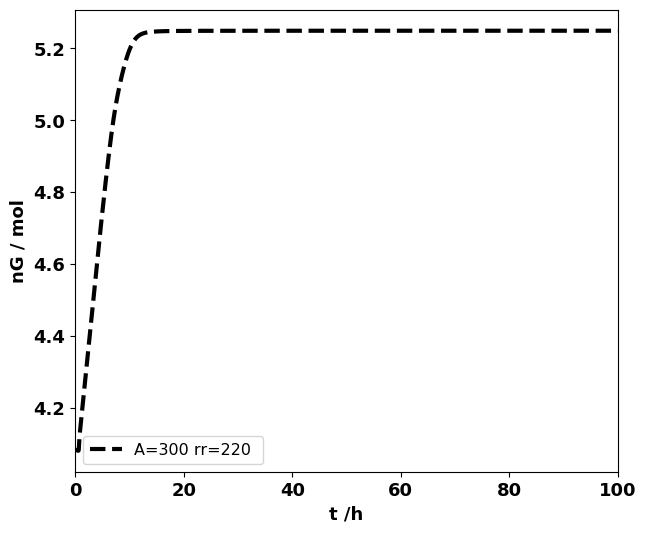

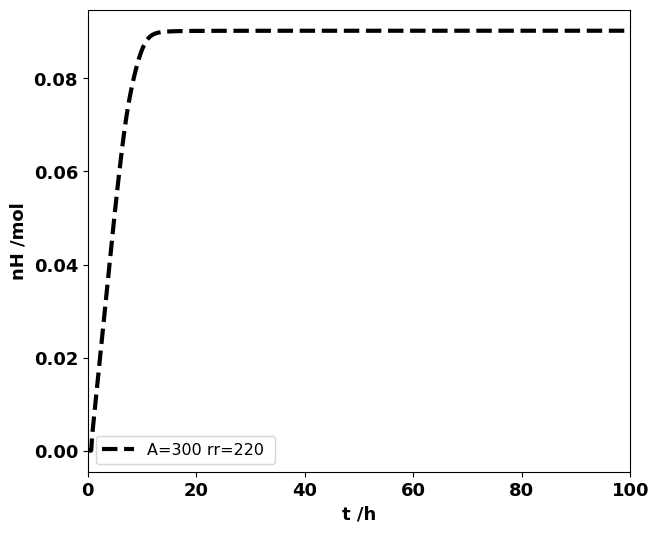

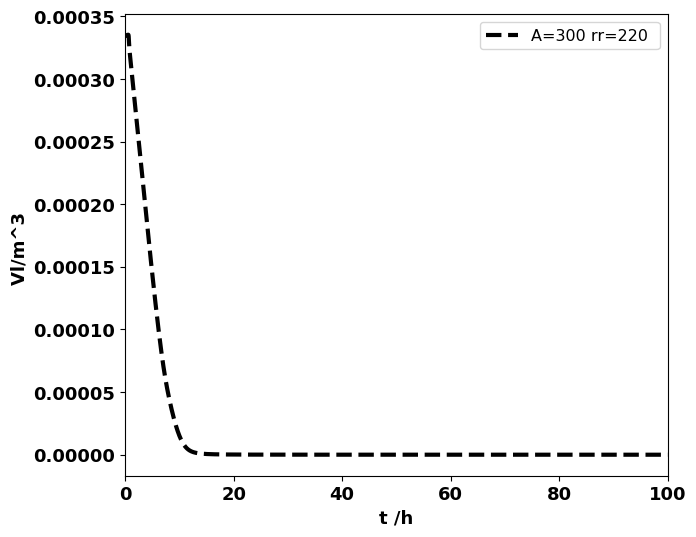

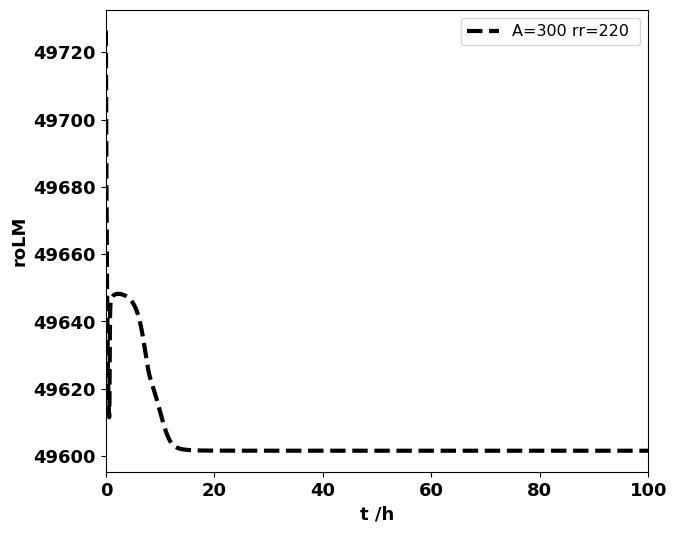

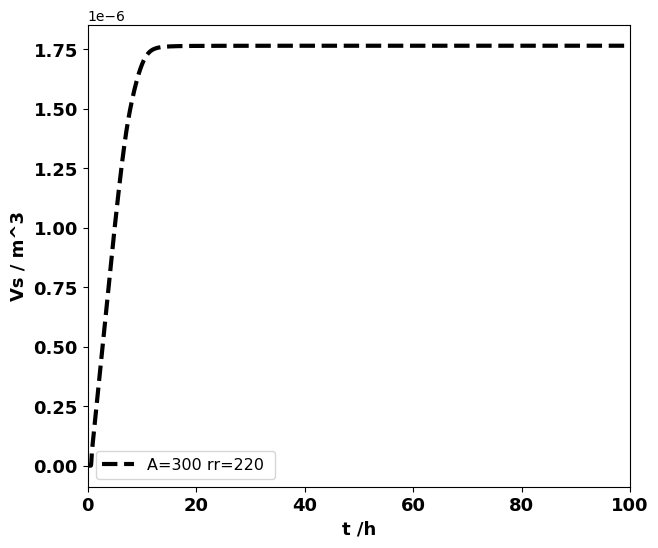

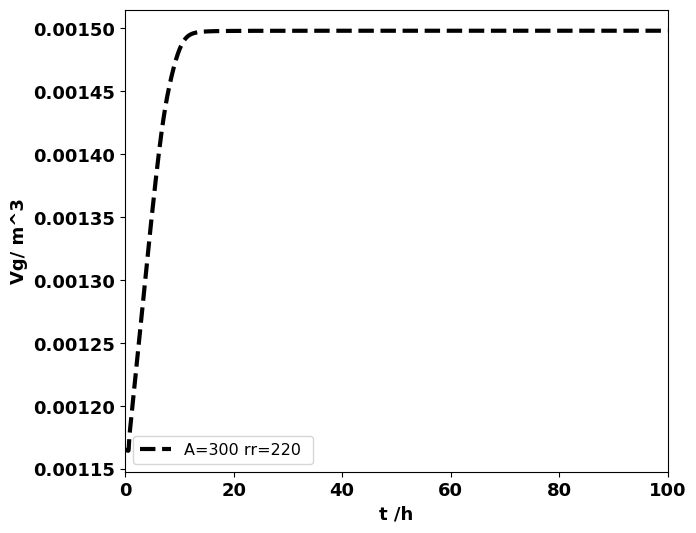

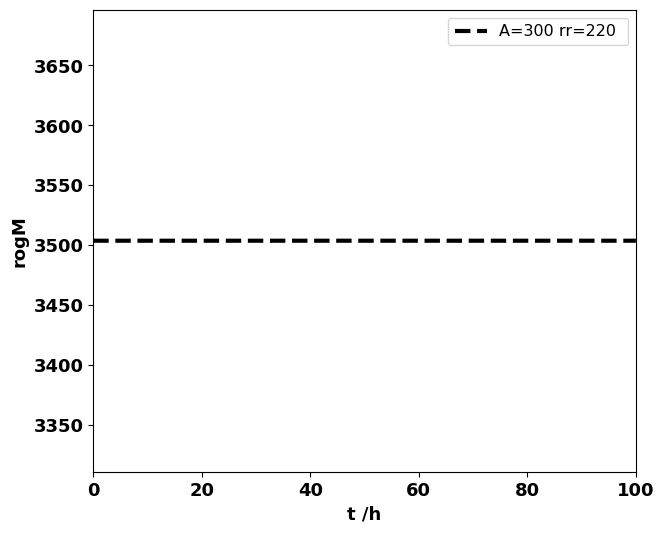

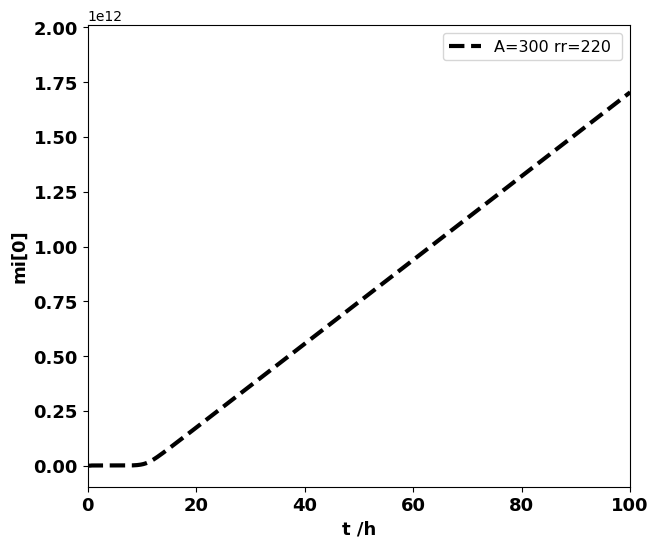

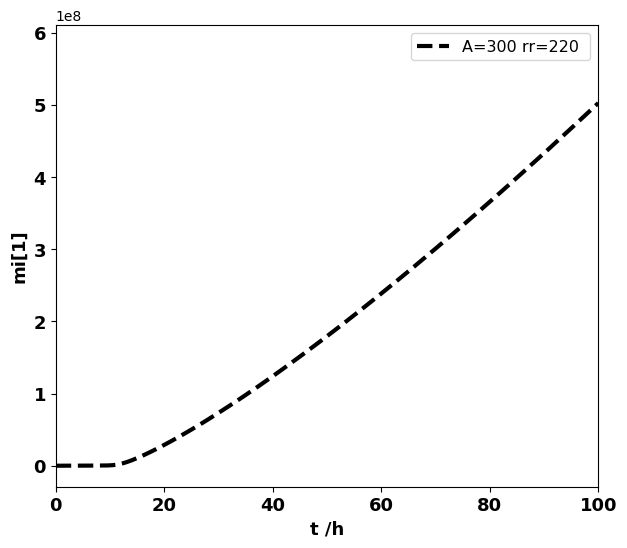

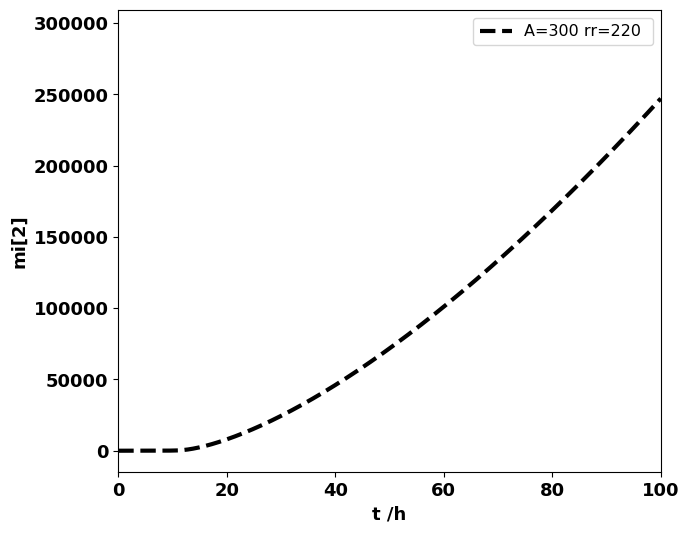

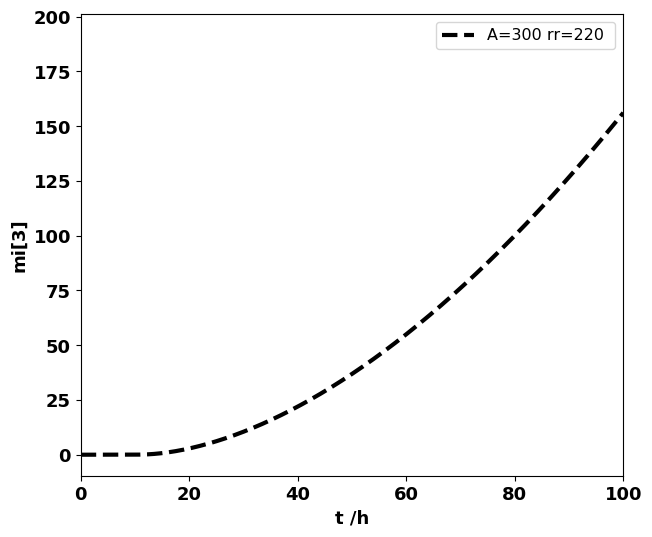

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('ycrescimento+nucleação66BAR A=300 (1).xlsx', sheet_name='A=300 RR=2.2E-4')
#df2 = pd.read_excel('70BARrr=220A=300 (1).xlsx', sheet_name='A=300')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
    "nL H2O / mol", "nL CH4 / mol", "nL total / mol", "nG / mol", "nH /mol", "Vl/m^3 ", "roLM", "Vs / m^3", "Vg/ m^3", "rogM",
    "mi[0]", "mi[1]", "mi[2]", "mi[3]"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    #x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(7, 6))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='A=300 rr=220 ', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    #plt.plot(x2, y2, label='A=300 rr=2.2e-4)', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0, 100)

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


#taxas

comparativo temperaturas

caso RR=220 E A=300

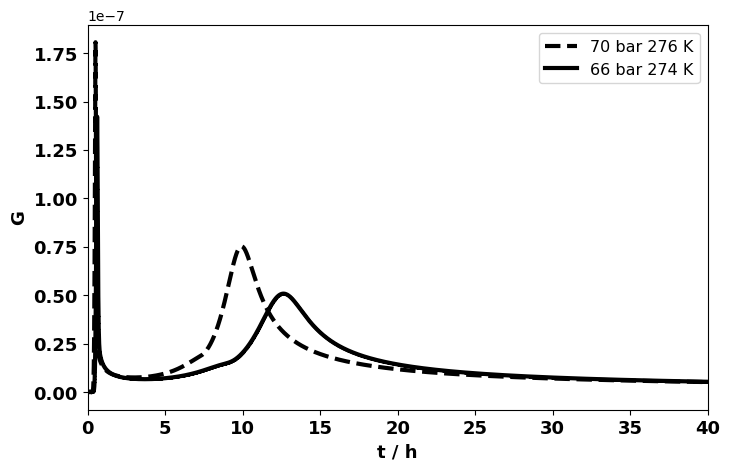

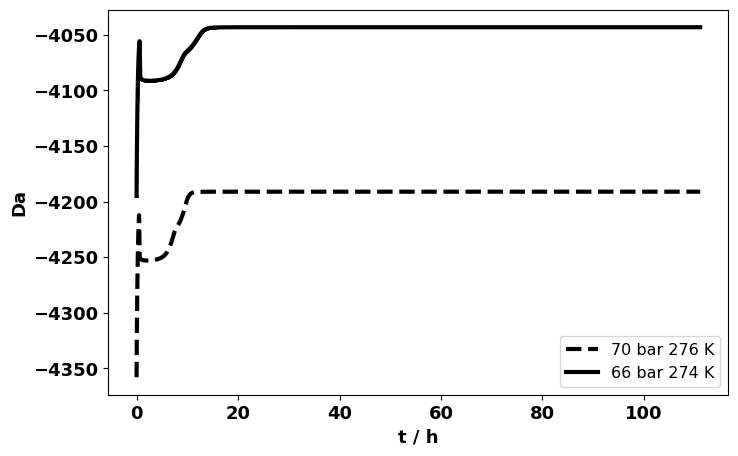

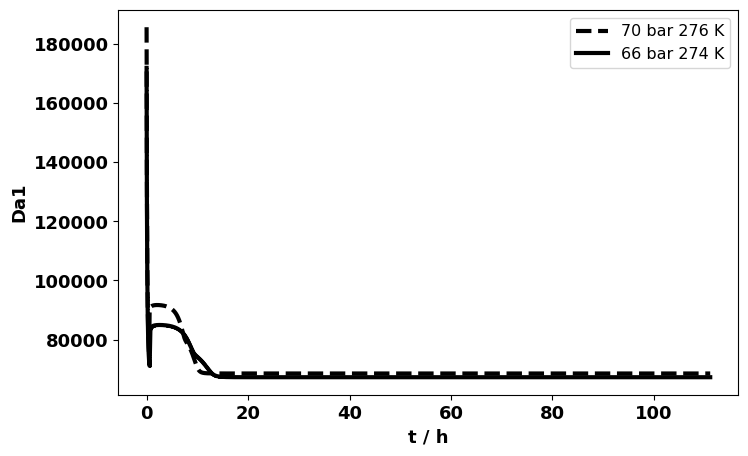

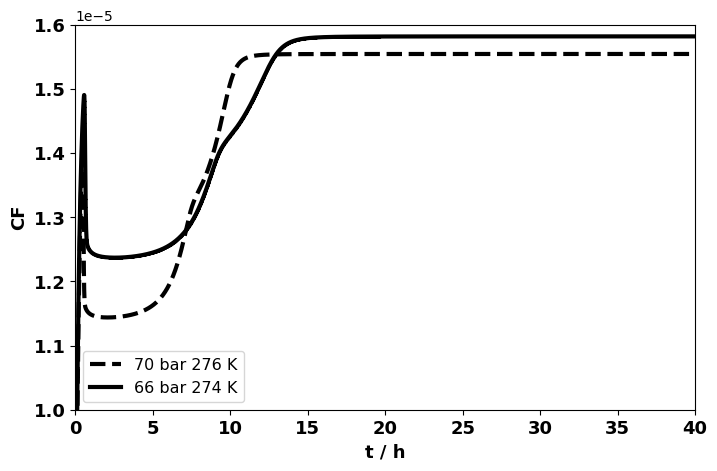

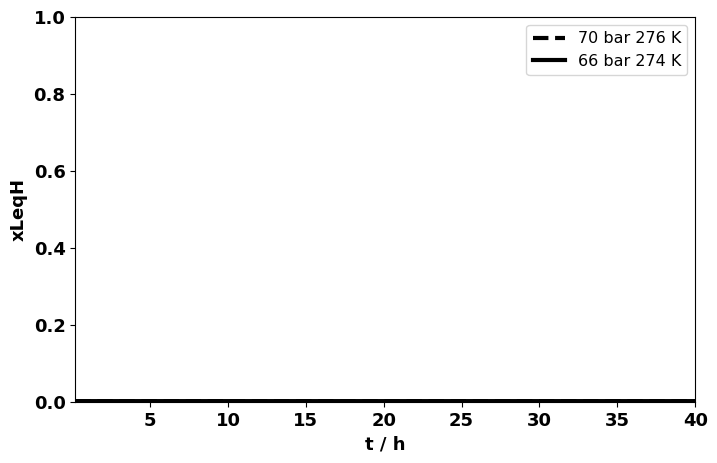

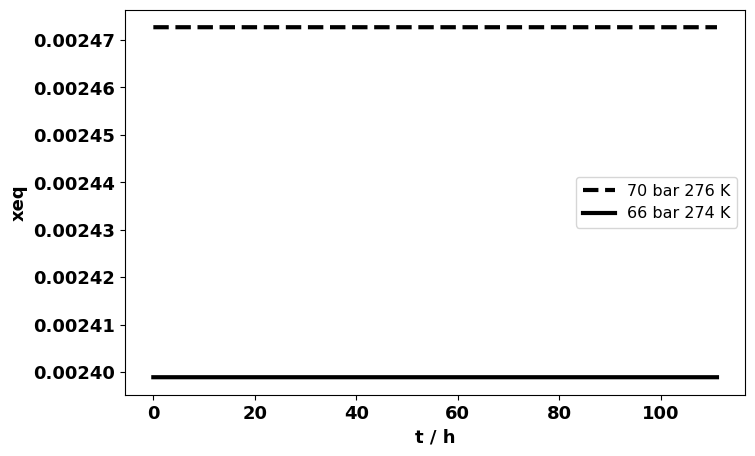

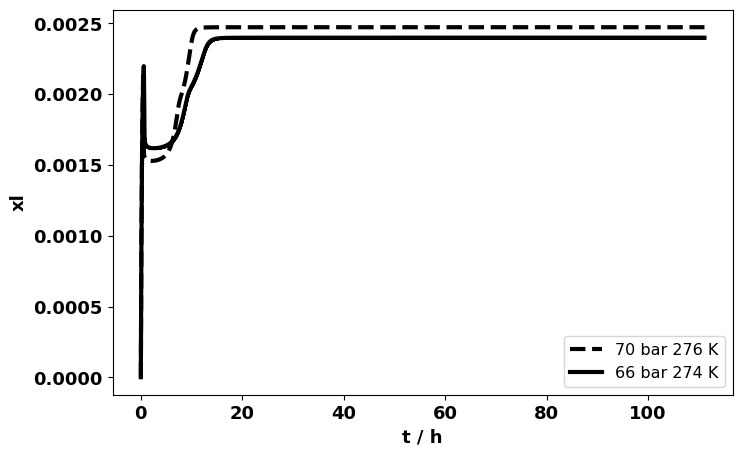

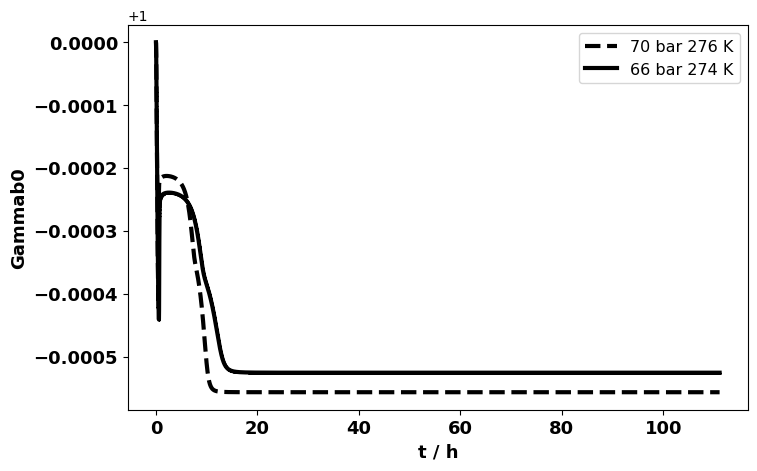

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('ycrescimento+nucleação66BARrr=2.2e-4A=300 (1).xlsx', sheet_name='Sheet1 (3)')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1 (2)')

# Lista de variáveis a serem plotadas
variaveis = [
    "G", "Da", "Da1", "CF", "xLeqH", "xeq", "xl", "Gammab0"
]

# Novo intervalo de tempo para interpolação
t0 = np.arange(0, 400000.0, 25)

# Iterar sobre as colunas de variáveis
for var in variaveis:
    if var not in df1.columns or var not in df2.columns:
        print(f"Variável '{var}' não encontrada em um dos dataframes.")
        continue

    # Interpolar os dados do primeiro arquivo
    df1_interp = pd.DataFrame({
        't': t0,
        var: np.interp(t0, df1['t'], df1[var])
    })

    # Interpolar os dados do segundo arquivo
    df2_interp = pd.DataFrame({
        't': t0,
        var: np.interp(t0, df2['t'], df2[var])
    })

    # Criar figura
    plt.figure(figsize=(8, 5))

    # Plote os dados do primeiro arquivo interpolado
    plt.plot(df1_interp['t'] / 3600, df1_interp[var], label='70 bar 276 K',
             markersize=1, color='black', linestyle='--', linewidth=3)

    # Plote os dados do segundo arquivo interpolado
    plt.plot(df2_interp['t'] / 3600, df2_interp[var], label='66 bar 274 K',
             marker='x', markersize=1, color="black",linewidth=3)

    # Adicione título e labels aos eixos
    plt.xlabel('t / h', fontweight='bold', size=13)
    plt.ylabel(f'{var}', fontweight='bold', size=13)
    plt.xticks(fontweight='bold', size=13)
    plt.yticks(fontweight='bold', size=13)

    # Defina os limites do eixo X e Y individualmente
    if var == 'G':
        plt.xlim(0, 40)
    elif var == 'DF':
        plt.xlim(0.0, 40)
        plt.ylim(0, 4)
    elif var == 'CF':
        plt.xlim(0.0, 40)
        plt.ylim(1e-5, 1.6e-5)
    elif var == 'xLeqH':
        plt.xlim(0.2, 40)
        plt.ylim(0, 1)
 # Ajuste conforme necessário

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


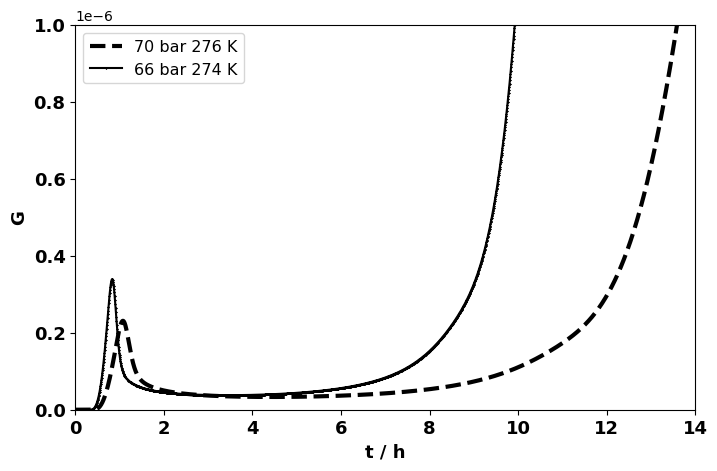

Variável 'DF' não encontrada em um dos dataframes.


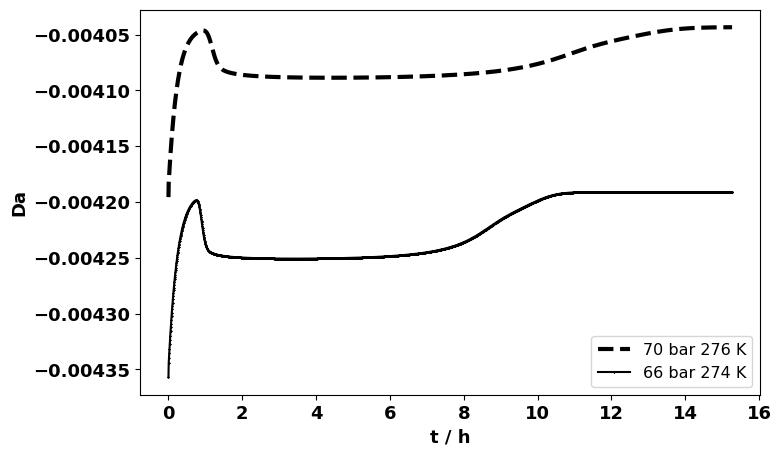

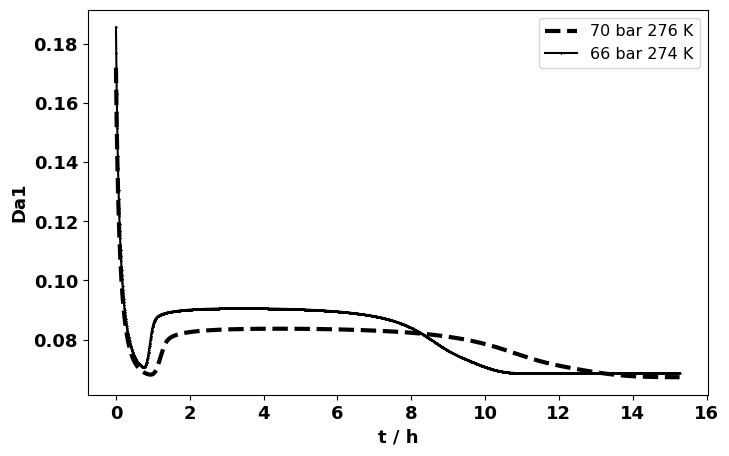

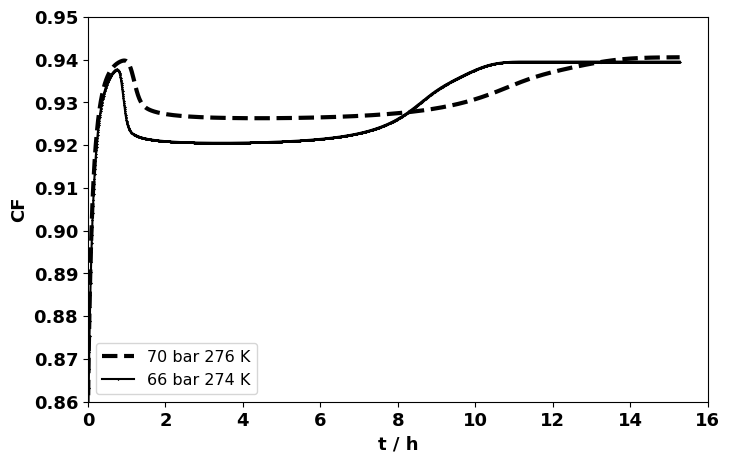

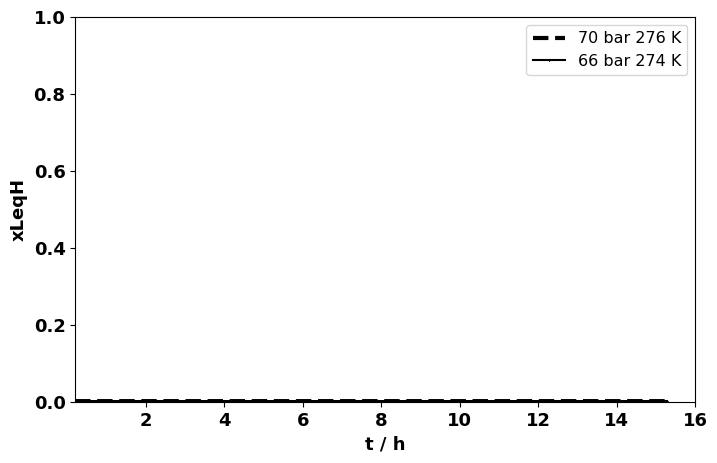

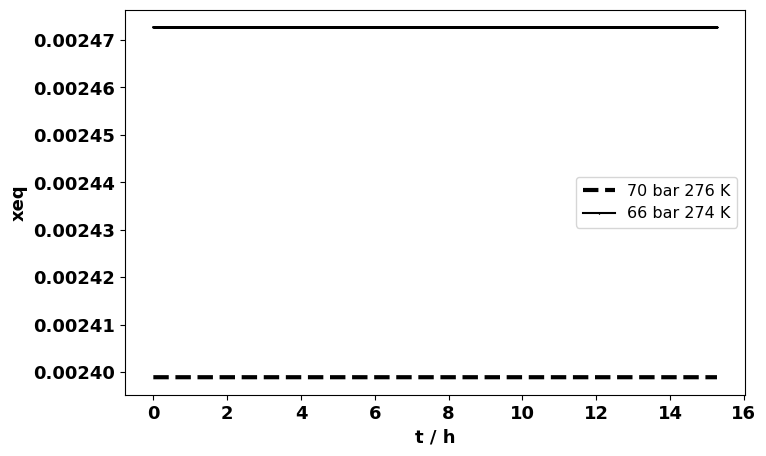

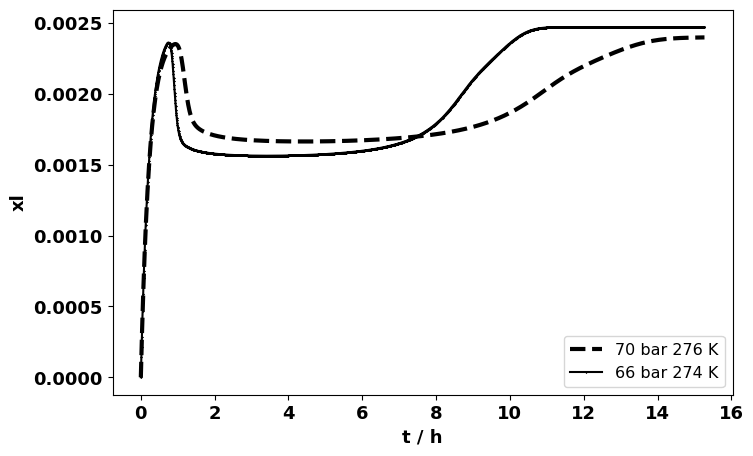

Variável 'Gammab0' não encontrada em um dos dataframes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='A=1.7E2')
df2 = pd.read_excel('saida_dadostaxas66BARrr=2.2e-4A=170.xlsx')

# Lista de variáveis a serem plotadas
variaveis = [
    "G", "DF", "Da", "Da1", "CF", "xLeqH", "xeq", "xl", "Gammab0"
]

# Novo intervalo de tempo para interpolação
t0 = np.arange(0, 55000.0, 25)

# Iterar sobre as colunas de variáveis
for var in variaveis:
    if var not in df1.columns or var not in df2.columns:
        print(f"Variável '{var}' não encontrada em um dos dataframes.")
        continue

    # Interpolar os dados do primeiro arquivo
    df1_interp = pd.DataFrame({
        't': t0,
        var: np.interp(t0, df1['t'], df1[var])
    })

    # Interpolar os dados do segundo arquivo
    df2_interp = pd.DataFrame({
        't': t0,
        var: np.interp(t0, df2['t'], df2[var])
    })

    # Criar figura
    plt.figure(figsize=(8, 5))

    # Plote os dados do primeiro arquivo interpolado
    plt.plot(df1_interp['t'] / 3600, df1_interp[var], label='70 bar 276 K',
             markersize=1, color='black', linestyle='--', linewidth=3)

    # Plote os dados do segundo arquivo interpolado
    plt.plot(df2_interp['t'] / 3600, df2_interp[var], label='66 bar 274 K',
             marker='x', markersize=1, color="black")

    # Adicione título e labels aos eixos
    plt.xlabel('t / h', fontweight='bold', size=13)
    plt.ylabel(f'{var}', fontweight='bold', size=13)
    plt.xticks(fontweight='bold', size=13)
    plt.yticks(fontweight='bold', size=13)

    # Defina os limites do eixo X e Y individualmente
    if var == 'G':
        plt.xlim(0, 14)
        plt.ylim(0, 1e-6)
    elif var == 'DF':
        plt.xlim(0.0, 16)
        plt.ylim(0, 4)
    elif var == 'CF':
        plt.xlim(0.0, 16)
        plt.ylim(0.86, 0.95)
    elif var == 'xLeqH':
        plt.xlim(0.2, 16)
        plt.ylim(0, 1)
 # Ajuste conforme necessário

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


rr=220 A=170

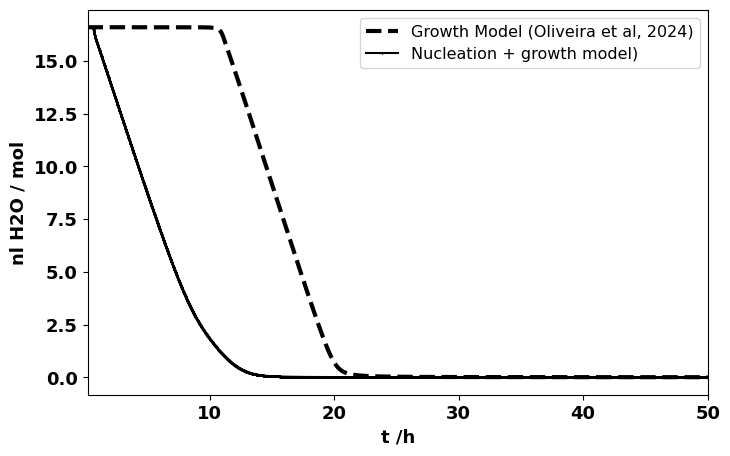

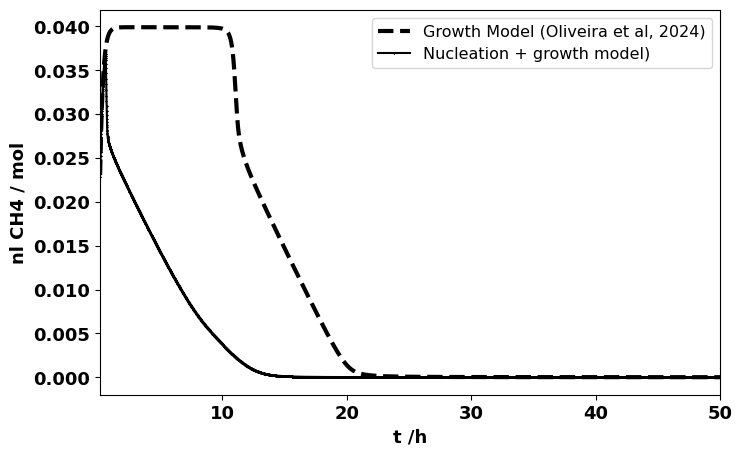

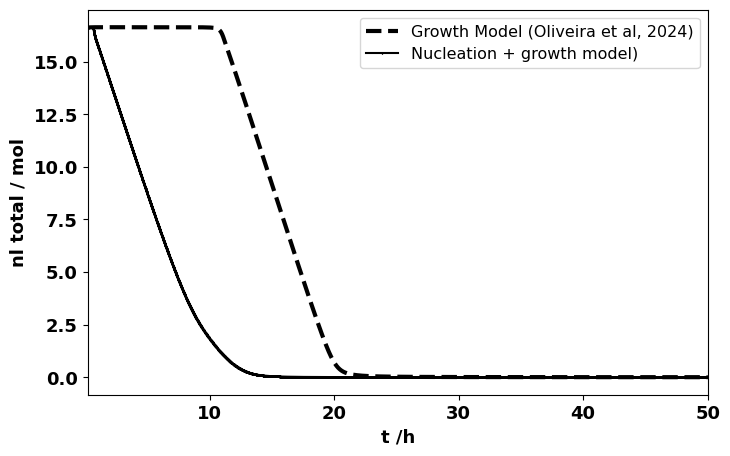

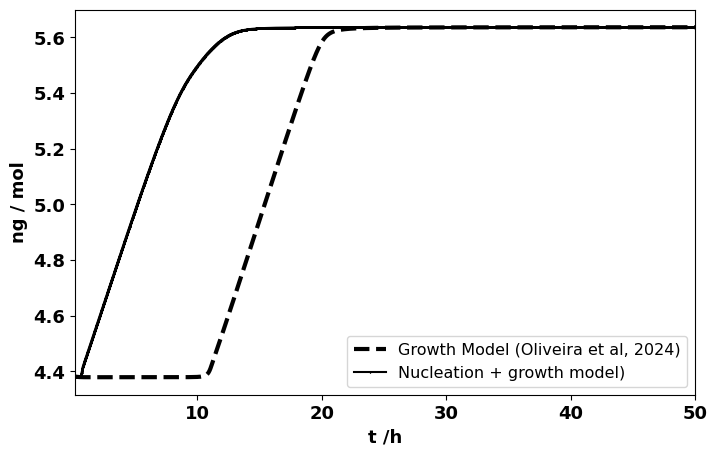

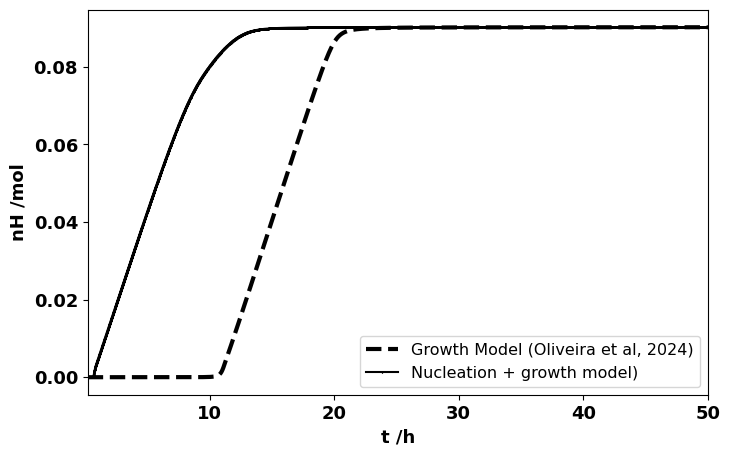

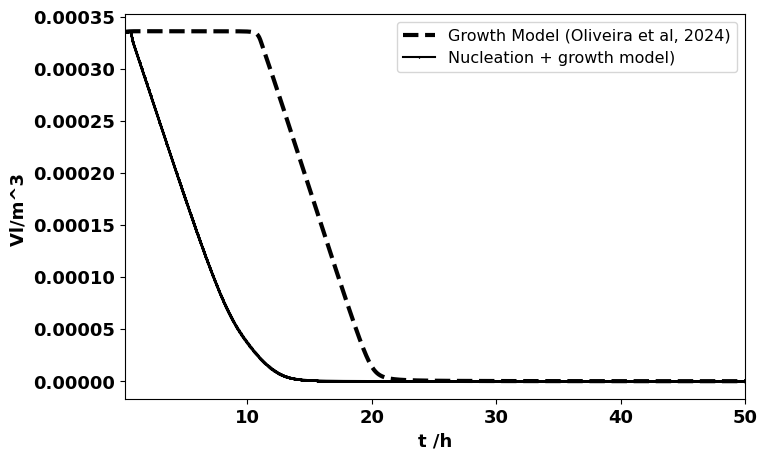

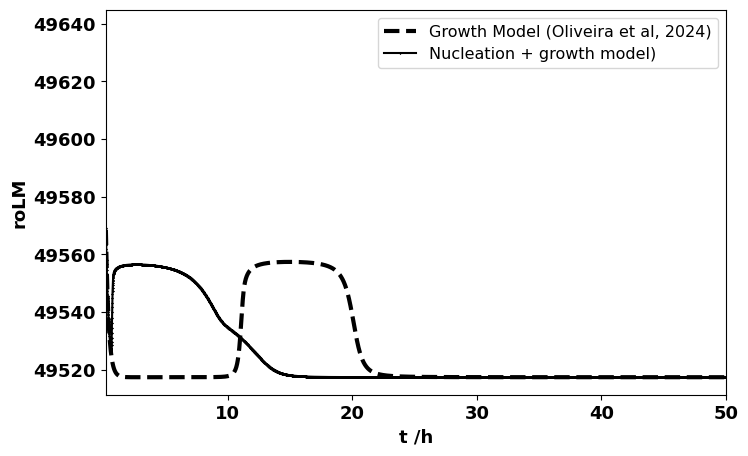

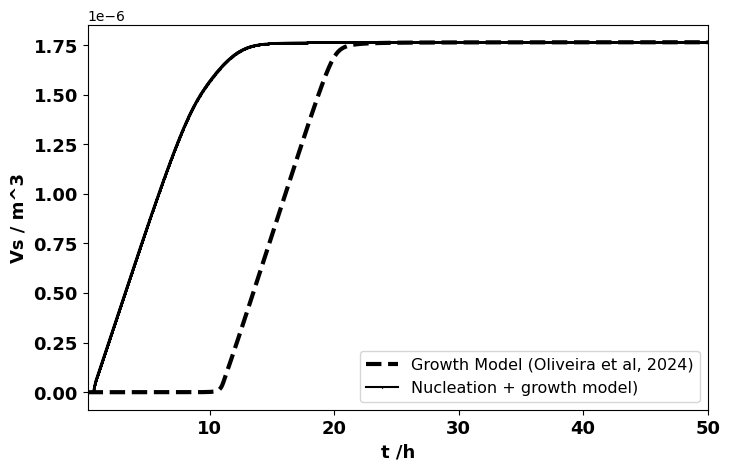

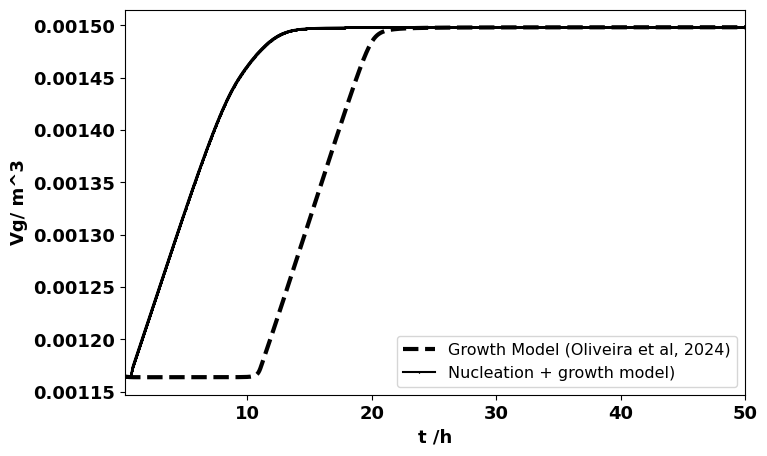

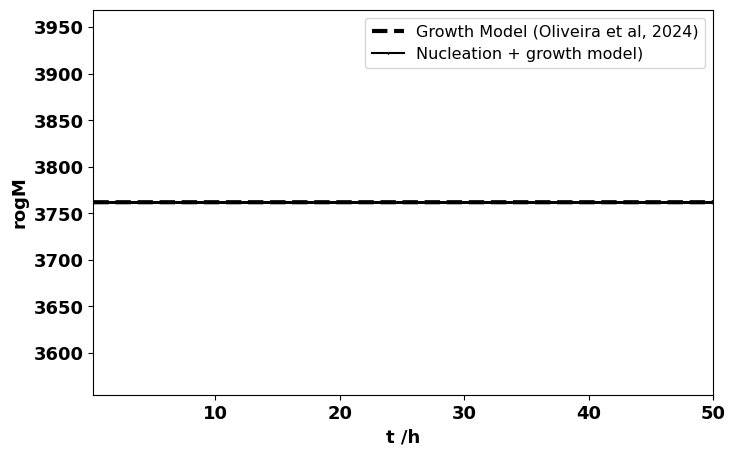

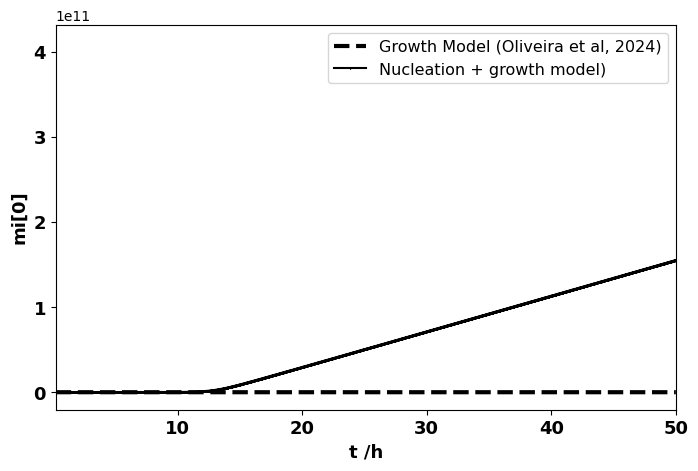

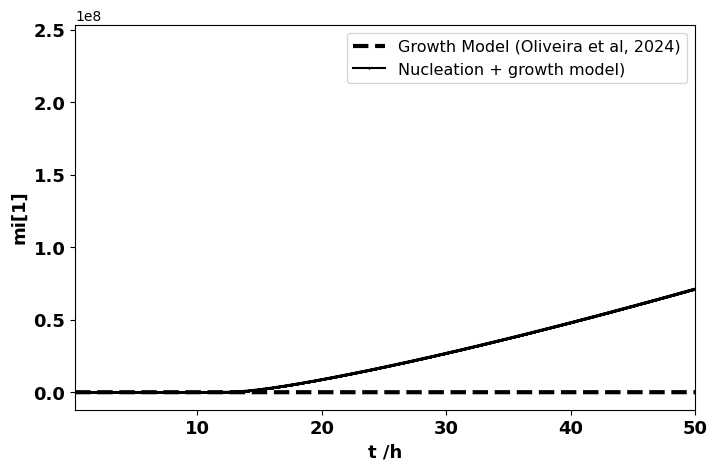

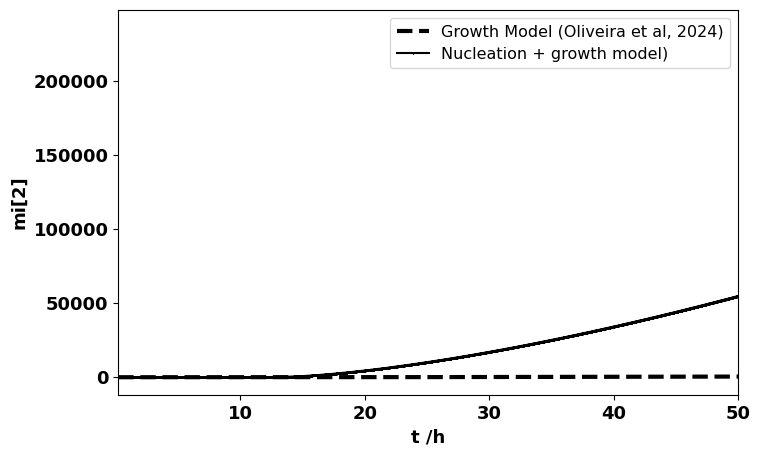

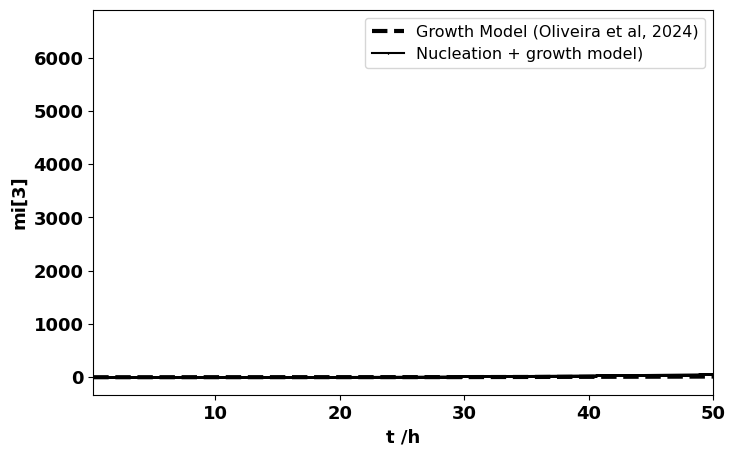

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('yreacao+dif (2).xlsx', sheet_name='crescimento')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220A=170.xlsx', sheet_name='rr=220')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
    "nl H2O / mol", "nl CH4 / mol", "nl total / mol", "ng / mol", "nH /mol", "Vl/m^3 ", "roLM", "Vs / m^3", "Vg/ m^3", "rogM",
    "mi[0]", "mi[1]", "mi[2]", "mi[3]"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(8, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Model (Oliveira et al, 2024)', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Nucleation + growth model)', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0.2, 50)

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('yreacao+dif (2).xlsx', sheet_name='crescimento')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')
#df3 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='crescimento')
#df4 = pd.read_excel('ycrescimento+nucleação66BAR (4).xlsx', sheet_name='A=300')

variaveis = [
    "nl H2O / mol", "nl CH4 / mol", "nl total / mol", "ng / mol", "nH /mol", "Vl/m^3 ", "roLM", "Vs / m^3", "Vg/ m^3", "rogM",
    "mi[0]", "mi[1]", "mi[2]", "mi[3]"
]

# Iterar sobre as colunas de y_0 a y_13
for i, var in enumerate(variaveis):
    y_col = f'y_{i}'

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t']/3600, df2[y_col]
    #x3, y3 = df3['t']/3600, df3[y_col]
    #x4, y4 = df4['t']/3600, df4[y_col]

    plt.figure(figsize=(8, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Model (Oliveira et al, 2024)', markersize=1,color='black', linestyle='--', linewidth=3 )

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Nucleation + growth model)', marker='x', markersize=1, color="black")
    #plt.plot(x3, y3, label='Growth model', markersize=1, color='red', linestyle='--', linewidth=3 )
    #plt.plot(x4, y4, label='Nucleation + growth model', marker='x', markersize=1, color='red')

    # Adicione título e labels aos eixos
    plt.xlabel('t /h',fontweight='bold',size=13)
    plt.ylabel(f'{var}',fontweight='bold',size=13)
    plt.xticks(fontweight='bold',size=13)
    plt.yticks(fontweight='bold',size=13)


    # Defina o eixo X em escala logarítmica
    #plt.xscale('log')

    # Defina os limites do eixo X
    plt.xlim(0.2, 40)

    # Adicione uma legenda
    plt.legend(fontsize=11.5)

    # Mostre o gráfico
    plt.show()


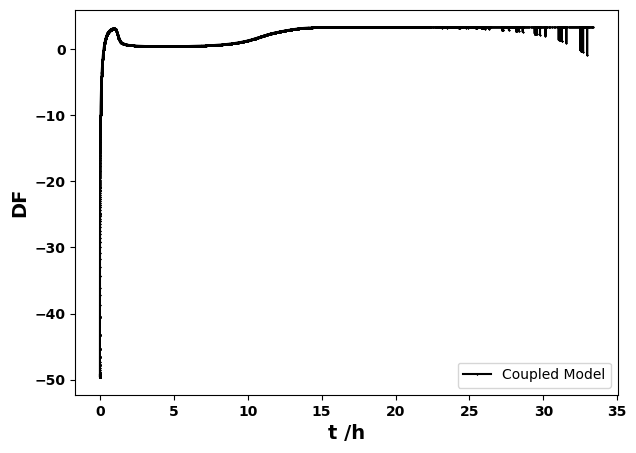

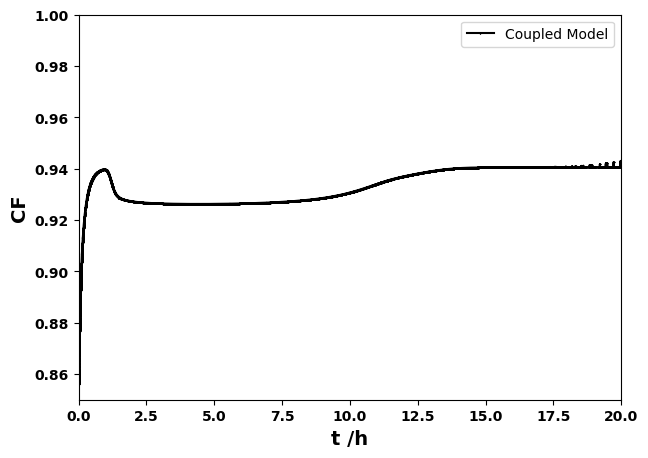

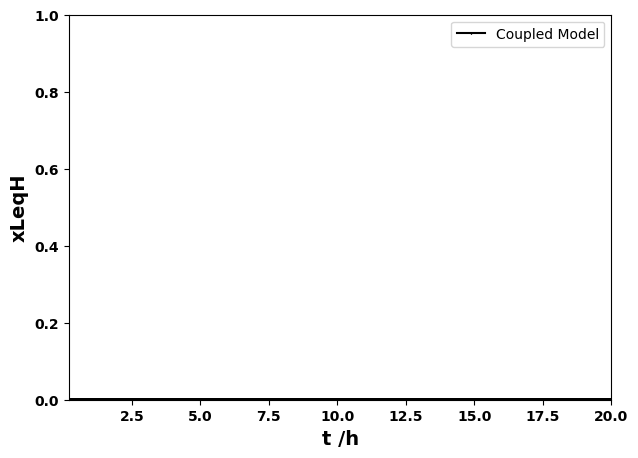

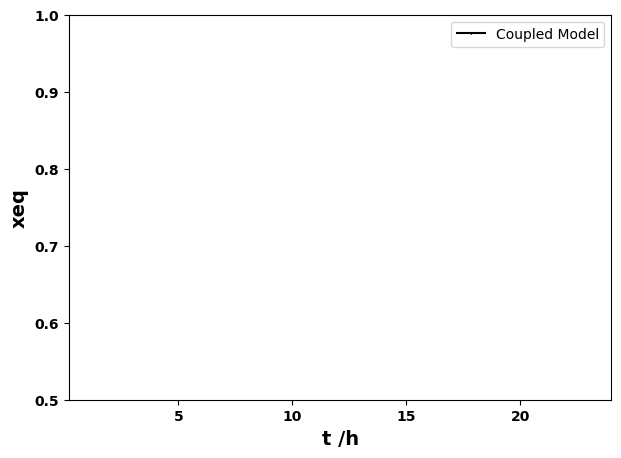

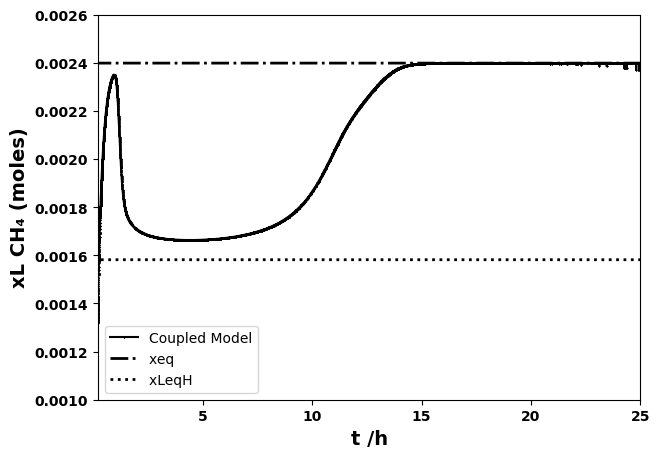

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
#df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento')
df2 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='A=1.7E2')


# Definir as variáveis corretamente
variaveis = [ "DF", "CF", "xLeqH", "xeq", "xl"]

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
for var in variaveis:
    y_col = var

    # Selecionar as colunas específicas de cada dataframe
    #x1, y1 = df1['t']/3600 , df1[y_col]
    x2, y2 = df2['t'] / 3600, df2[y_col]

    plt.figure(figsize=(7, 5))

    # Plote os dados do primeiro arquivo
    #plt.plot(x1, y1, label='Growth Model', markersize=1, color='black', linestyle='--', linewidth=2)

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')

    if var == 'xl':
      # Adicionando 'xeq' e 'xLeqH' no gráfico de 'xl'
      plt.plot(df2['t'] / 3600, df2['xeq'], label='xeq ', linestyle='dashdot', color='black', linewidth=2)

      plt.plot(df2['t'] / 3600, df2['xLeqH'], label='xLeqH ', linestyle="dotted", color='black', linewidth=2)


    # Adicione título e labels aos eixos

    plt.xlabel('t /h',fontweight='bold',size=14)
    plt.ylabel(f'{var}',fontweight='bold',size=14)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Defina os limites do eixo X e Y individualmente
    if var == 'G (mol/s)':
        plt.xlim(0, 30)
        plt.ylim(0,)  # Exemplo de limite para o eixo Y de 'G'
    elif var == 'CF':
        plt.xlim(0.0, 20)
        plt.ylim(0.850, 1)  # Exemplo de limite para o eixo Y de 'Deltami'
    elif var == 'xLeqH':
        plt.xlim(0.2, 20)
        plt.ylim(0, 1)  # Exemplo de limite para o eixo Y de 'xLeqH'
    elif var == 'xeq':
        plt.xlim(0.2, 24)
        plt.ylim(0.5, 1)  # Exemplo de limite para o eixo Y de 'xeq'
    elif var == 'xl':
        plt.ylabel('xL CH₄ (moles)',fontweight='bold',size=14)
        plt.xlim(0.2, 25)
        plt.ylim(0.001, 0.0026)  # Exemplo de limite para o eixo Y de 'xl'

    # Adicione uma legenda
    plt.legend()


    # Mostre o gráfico
    plt.show()


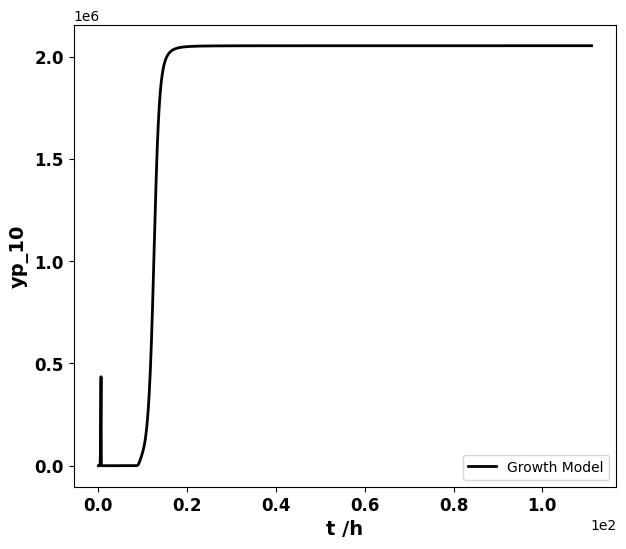

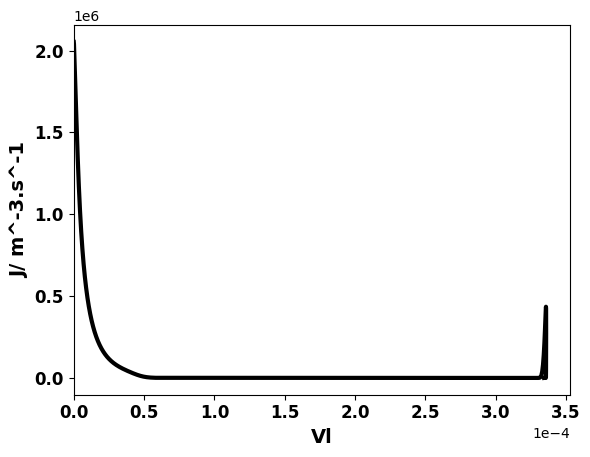

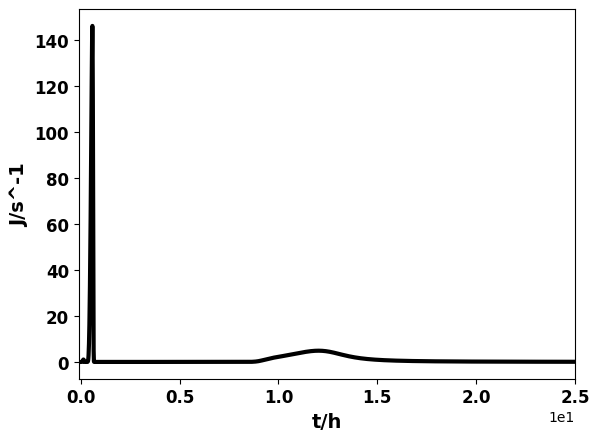

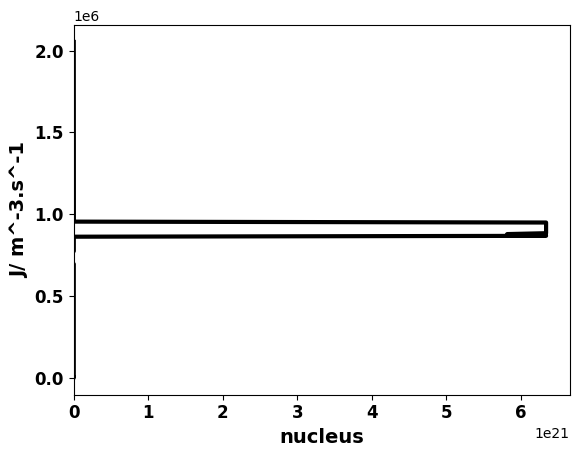

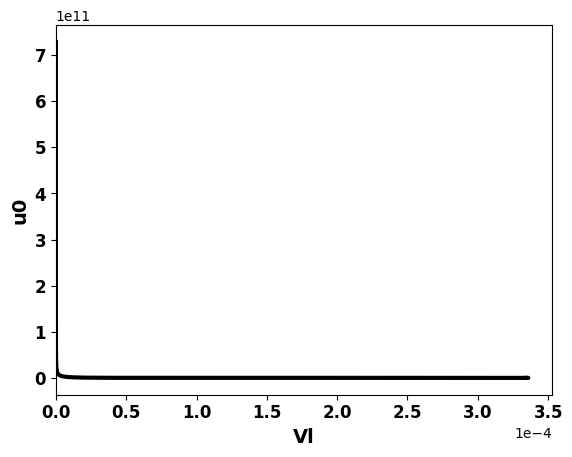

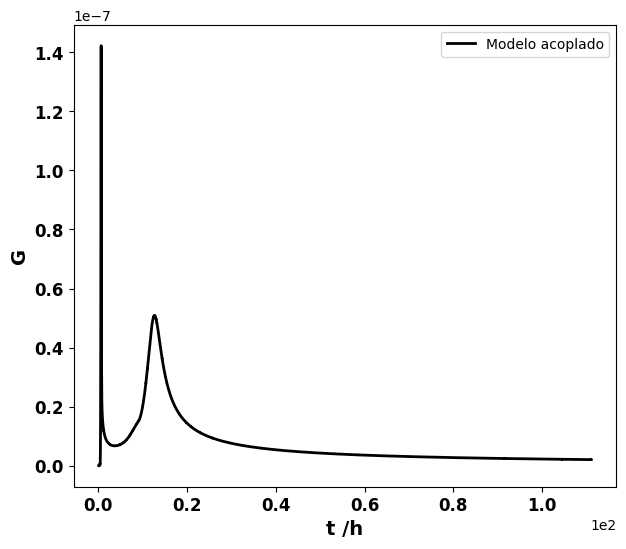

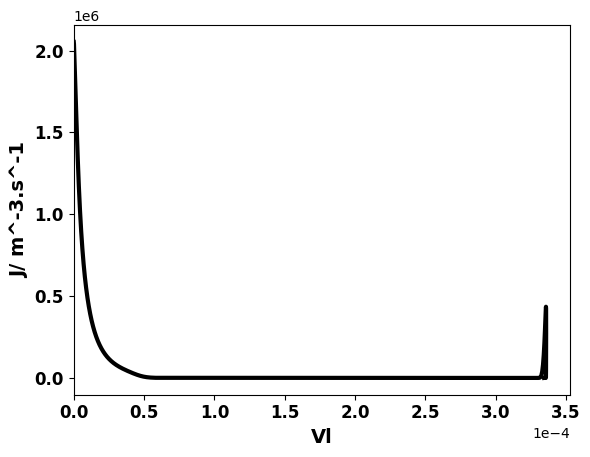

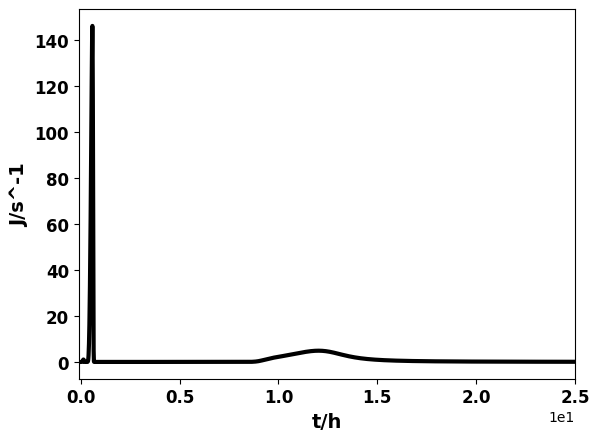

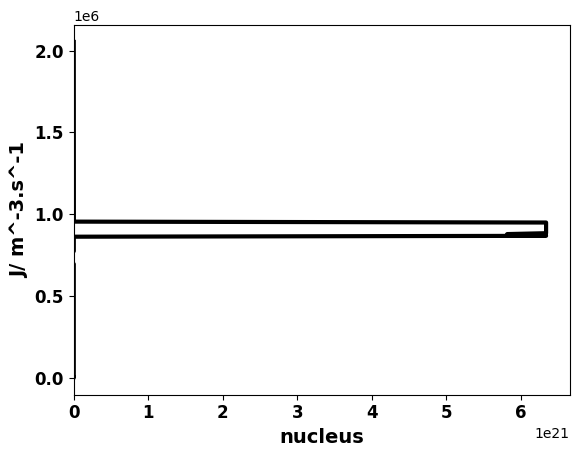

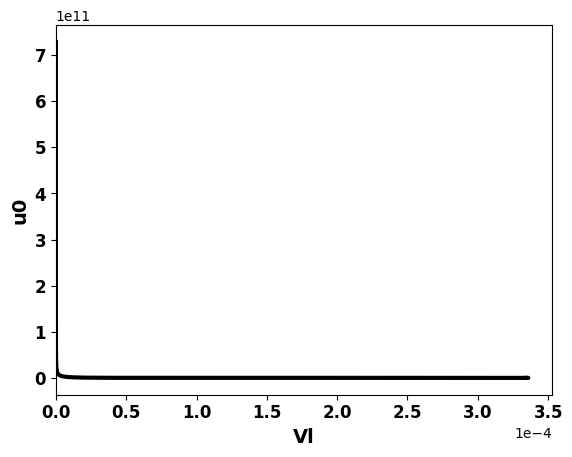

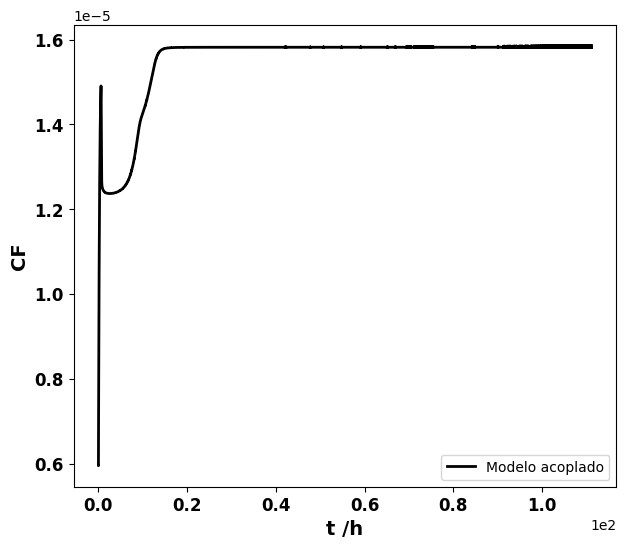

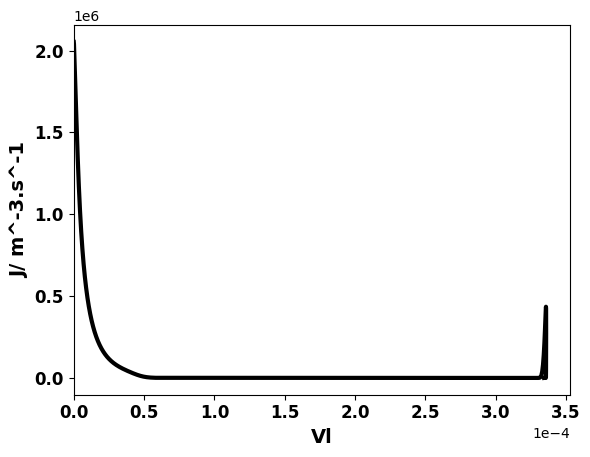

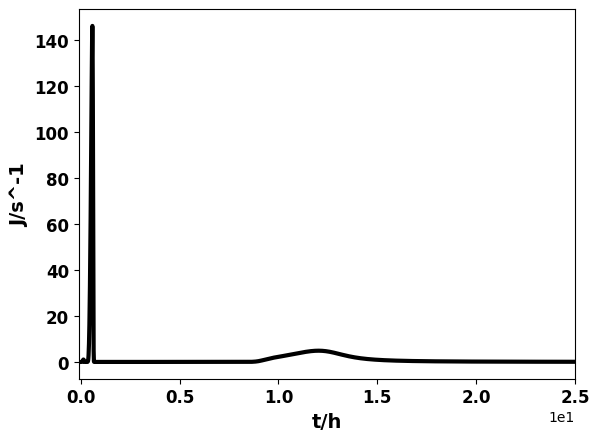

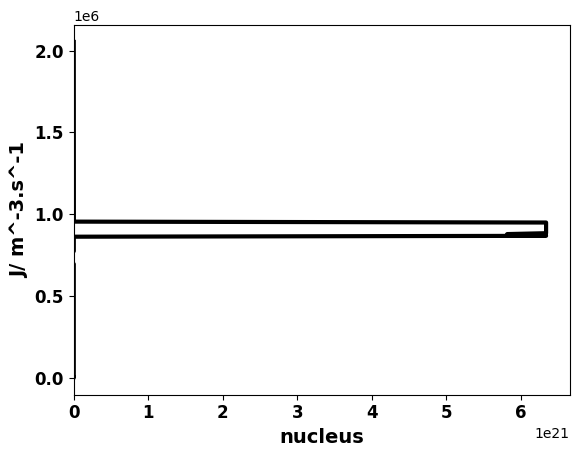

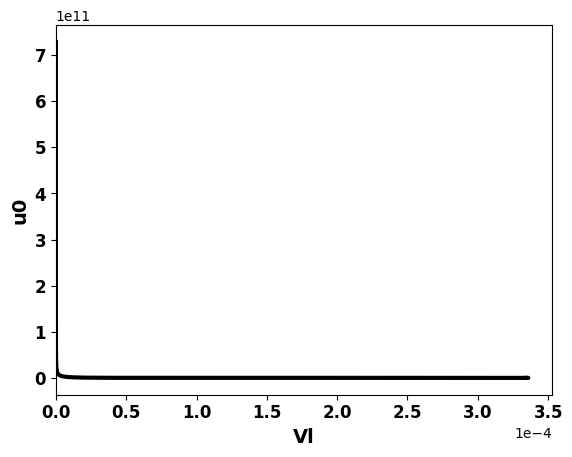

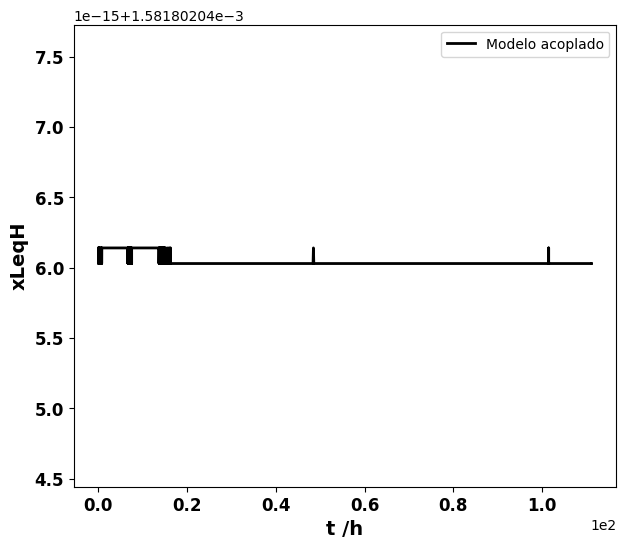

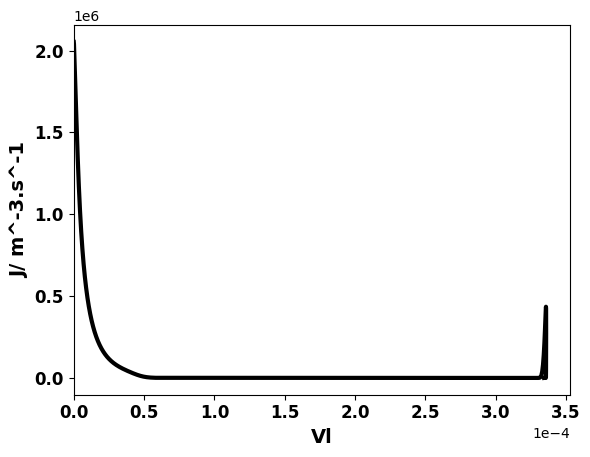

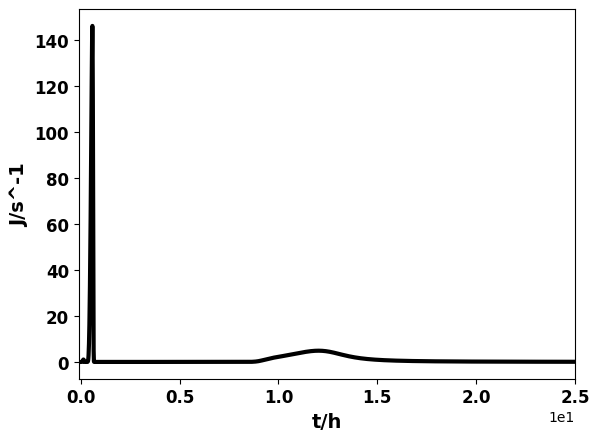

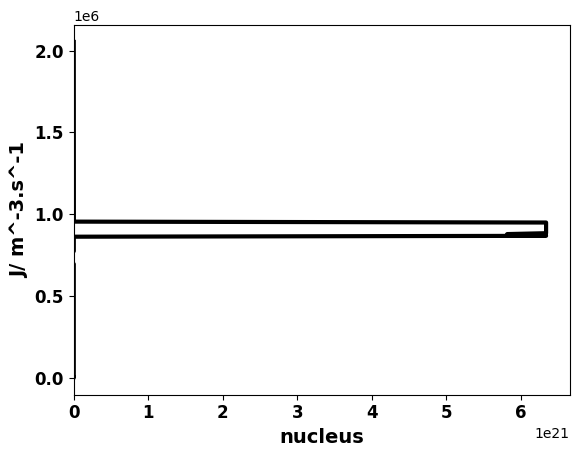

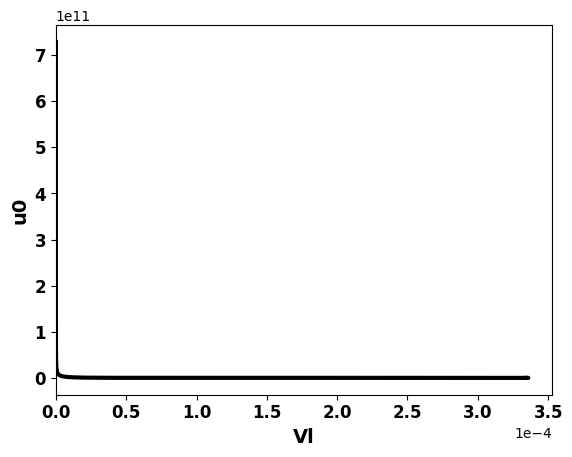

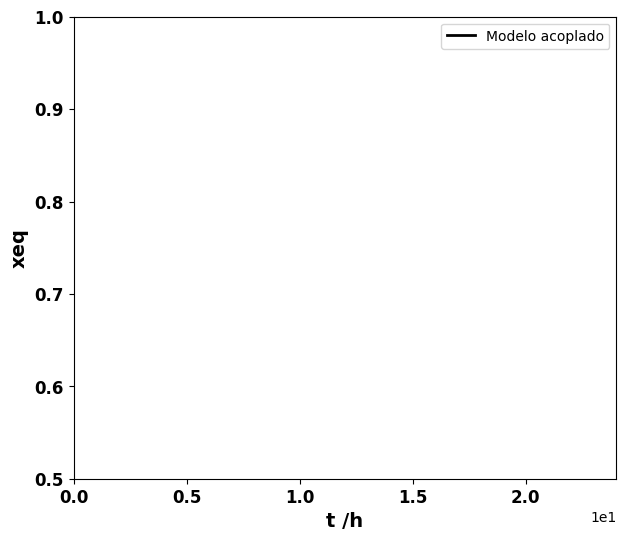

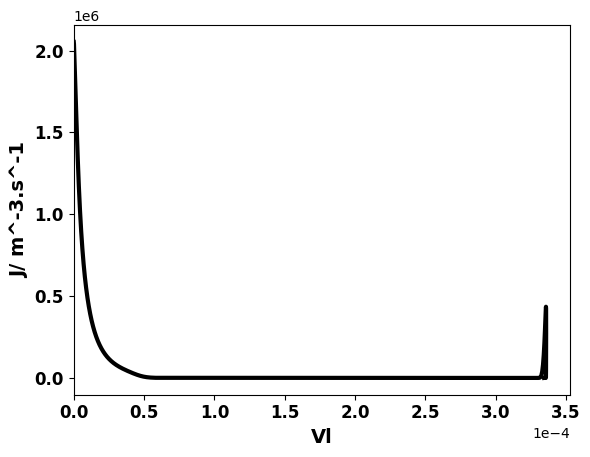

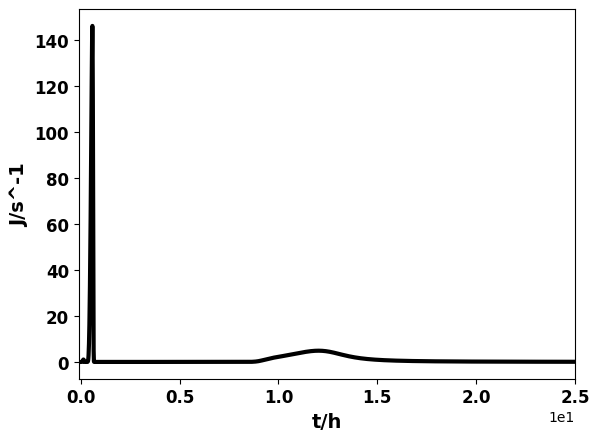

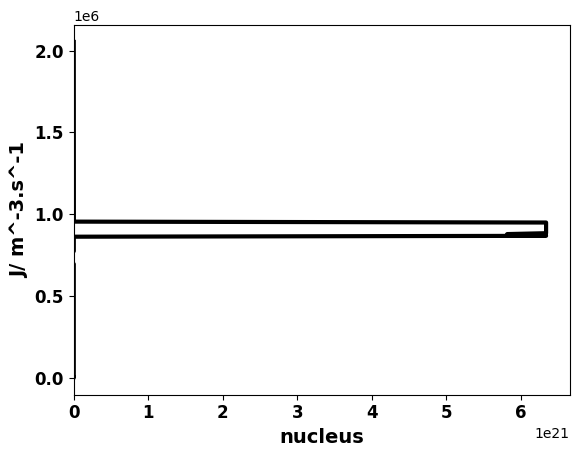

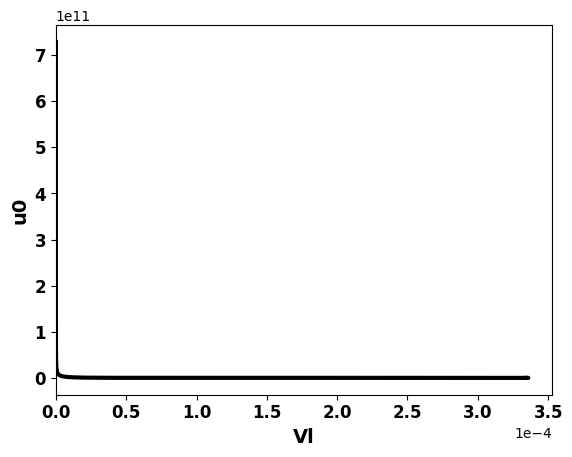

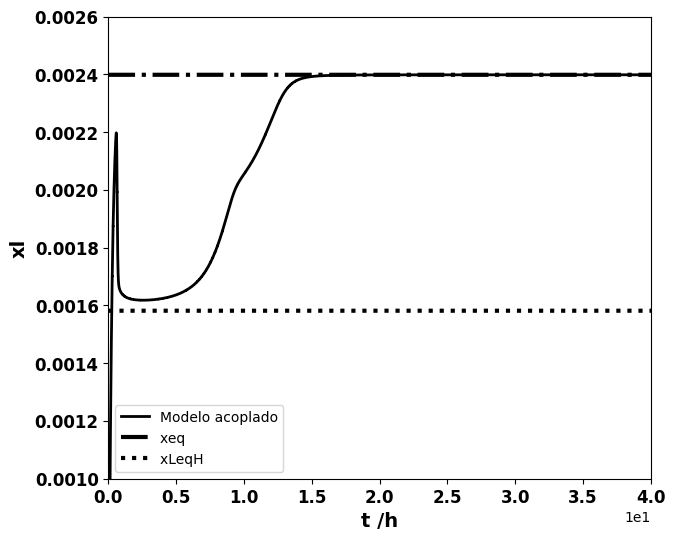

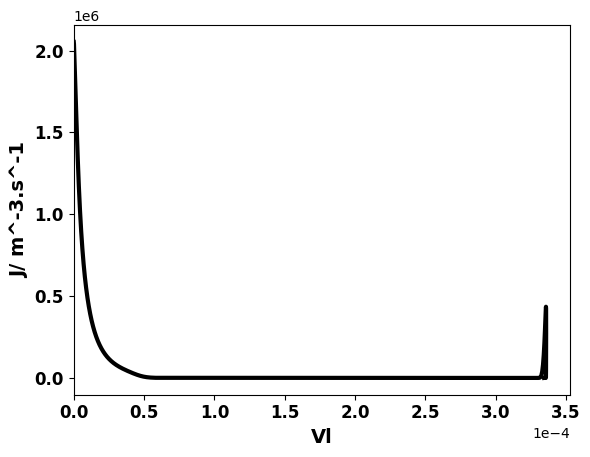

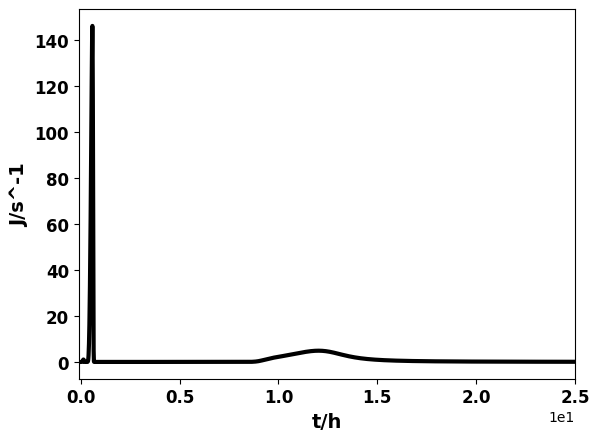

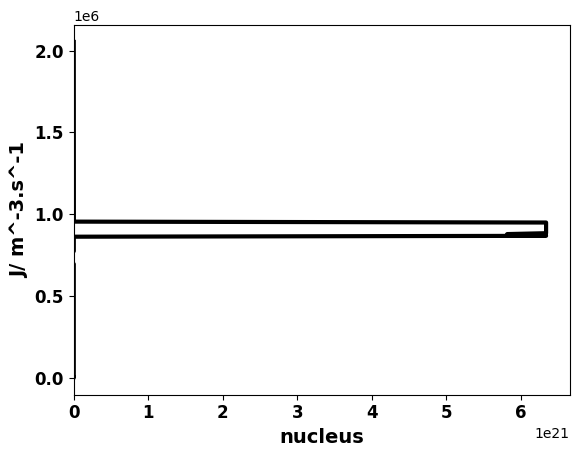

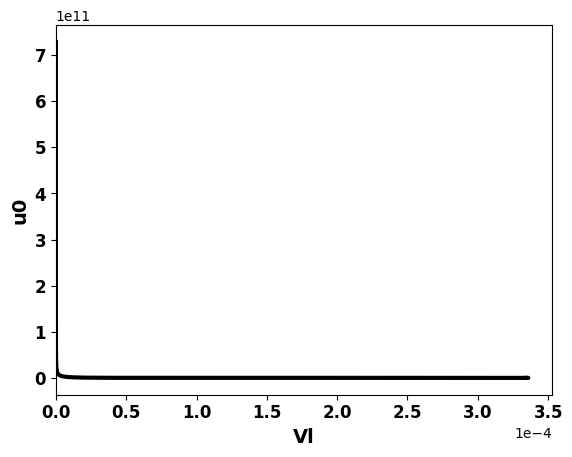

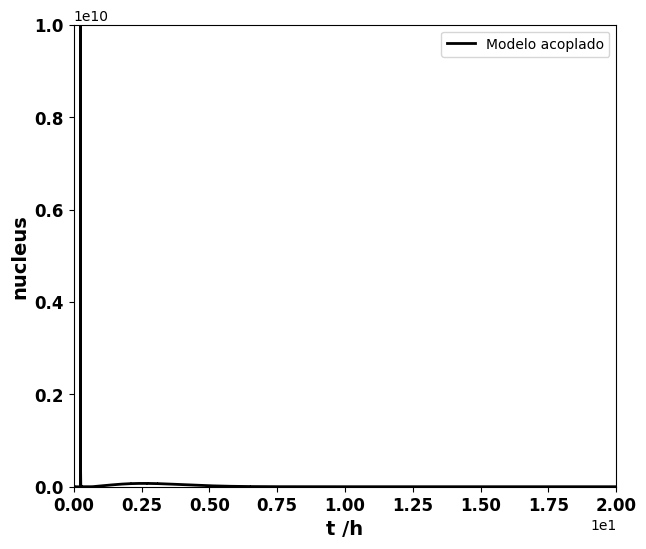

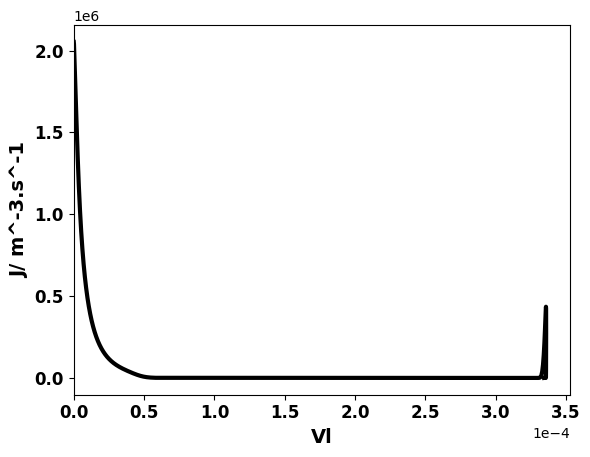

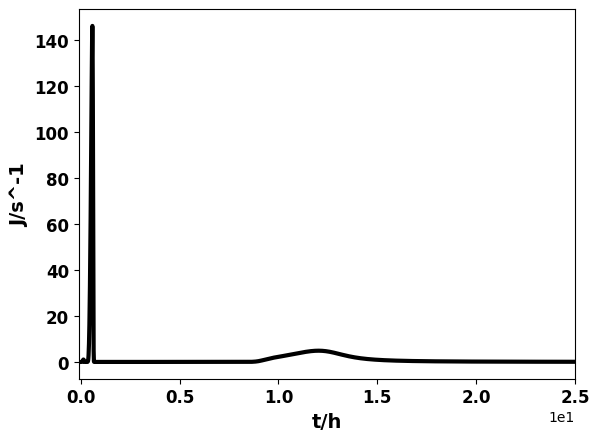

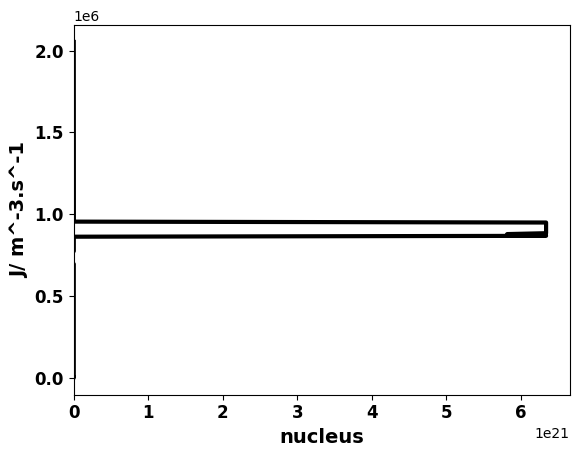

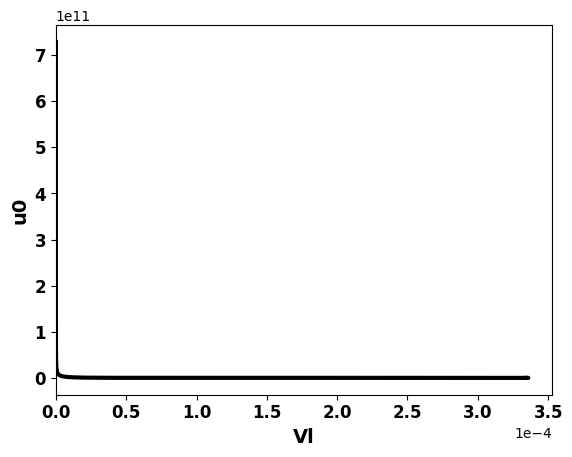

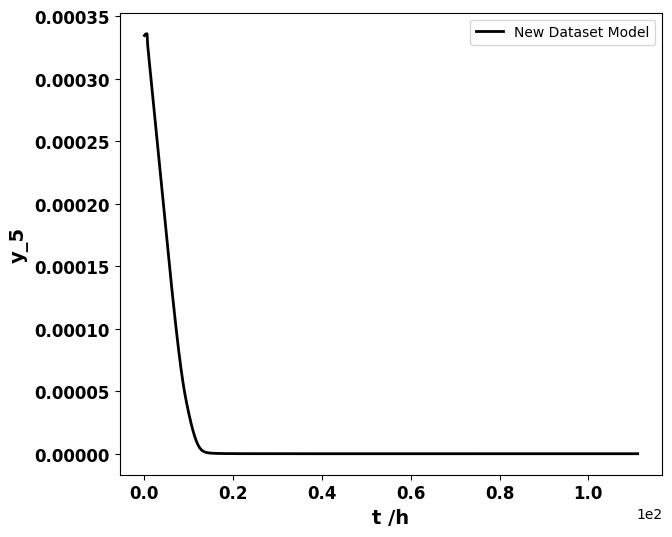

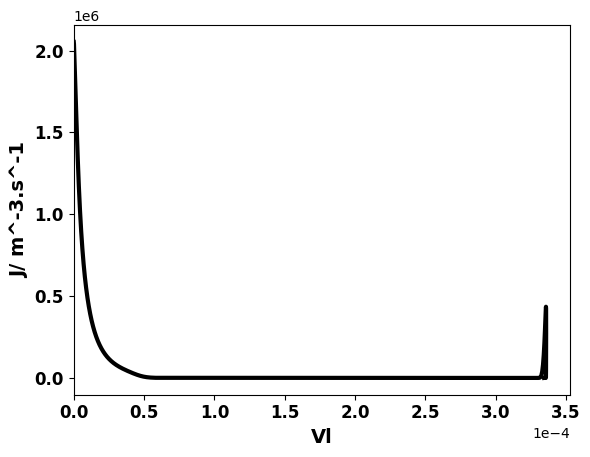

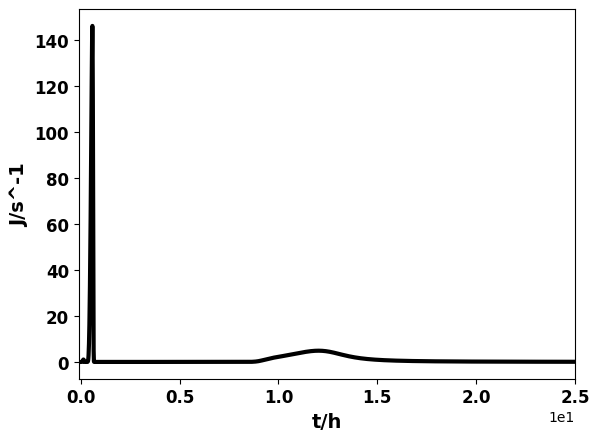

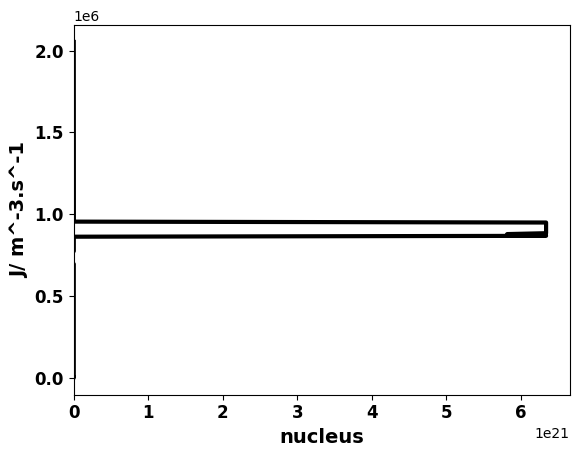

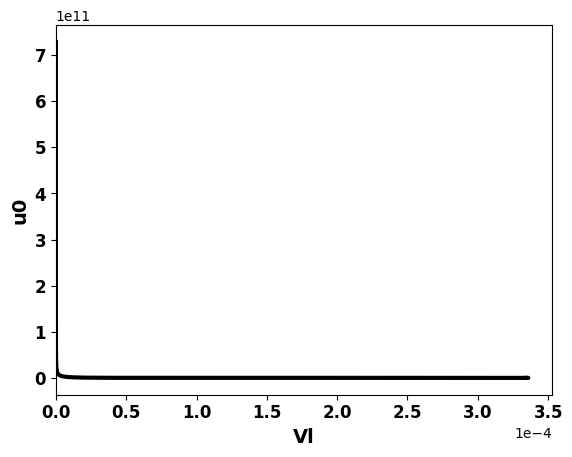

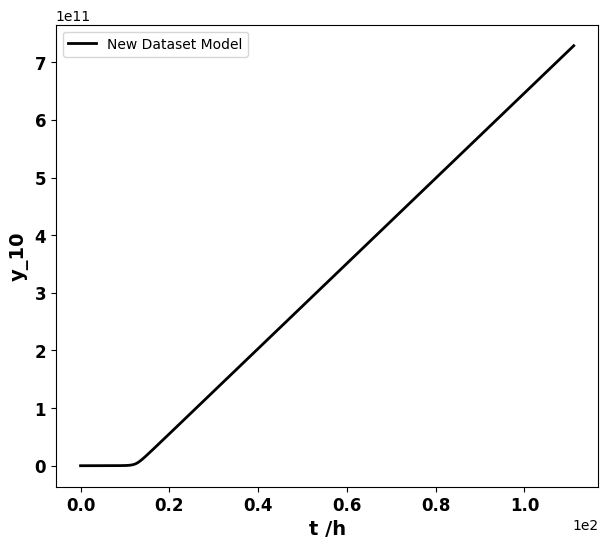

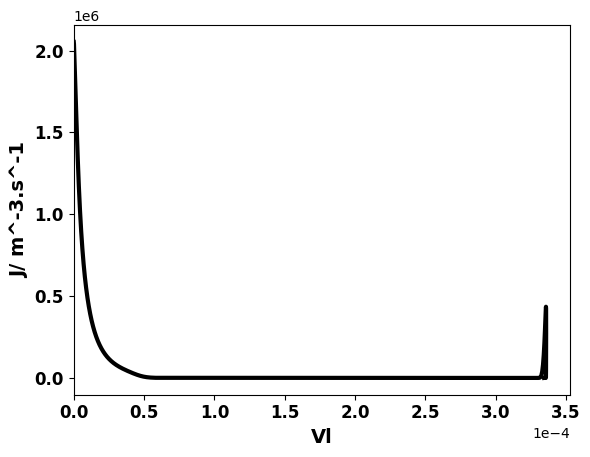

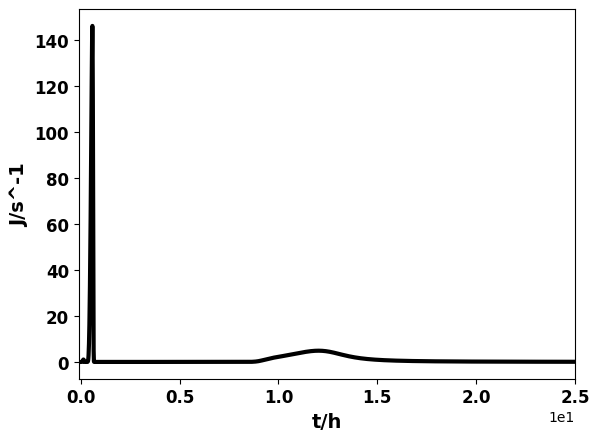

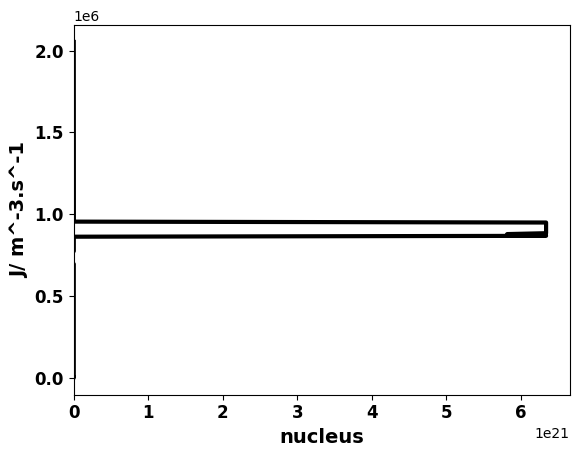

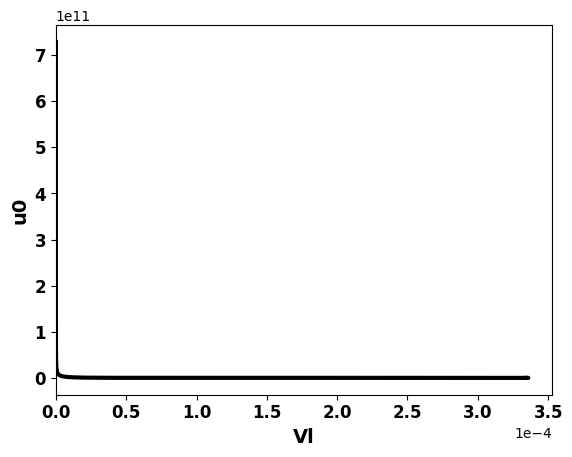

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1 (2)')
df3 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='rr=220')

# Listas de variáveis específicas para cada DataFrame
variaveis_df1 = ["yp_10"]  # Exemplo para o primeiro DataFrame
variaveis_df2 = [ 'G',"CF", "xLeqH", "xeq", "xl", 'nucleus']  # Exemplo para o segundo DataFrame
variaveis_df3 = ["y_5","y_10"]  # Exemplo para o terceiro DataFrame

# Função para criar gráficos para um DataFrame e sua lista de variáveis
def criar_graficos(df, variaveis, label_modelo):
    for var in variaveis:
        y_col = var
        x, y = df['t'] / 3600, df[y_col]

        plt.figure(figsize=(7, 6))

        # Plote os dados do DataFrame
        plt.plot(x, y, label=label_modelo, markersize=1, color='black', linewidth=2)

        # Configurações específicas para variáveis
        if var == 'xl':
            plt.ylabel('xL CH₄ (moles)', fontweight='bold', size=14)
            plt.plot(df2['t'] / 3600, df2['xeq'], label='xeq ', linestyle='dashdot', color='black', linewidth=3)

            plt.plot(df2['t'] / 3600, df2['xLeqH'], label='xLeqH ', linestyle="dotted", color='black', linewidth=3)
            plt.xlim(0, 40)
            plt.ylim(0.001, 0.0026)
        elif var == 'xeq':
            plt.xlim(0, 24)
            plt.ylim(0.5, 1)
        elif var == 'nucleus':
            plt.xlim(0, 20)
            plt.ylim(0,1e10 )

        # Adicione título e labels aos eixos
        plt.xlabel('t /h', fontweight='bold', size=14)
        plt.ylabel(f'{var}', fontweight='bold', size=14)
        plt.xticks(fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

        # Adicione uma legenda
        plt.legend()


        # Mostre o gráfico
        plt.show()

        # Gráficos específicos para comparação entre DataFrames
        plt.plot(df3['y_5'], df1["yp_10"], label=label_modelo, markersize=1, color='black', linewidth=3)
        plt.xlabel('Vl', fontweight='bold', size=14)
        plt.ylabel('J/ m^-3.s^-1', fontweight='bold', size=14)
        plt.xticks(fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.xlim(0,)
        plt.show()


           # Gráficos específicos para comparação entre DataFrames
        plt.plot(df3['t']/3600, df1["yp_10"]*df3['y_5'], label=label_modelo, markersize=1, color='black', linewidth=3)
        plt.xlabel('t/h', fontweight='bold', size=14)
        plt.ylabel('J/s^-1', fontweight='bold', size=14)
        plt.xticks(fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.xlim(-0.1,25)
        plt.show()

        plt.plot(df2['nucleus'][:len(df1["yp_10"])], df1["yp_10"], label=label_modelo, markersize=1, color='black', linewidth=3)
        plt.xlabel('nucleus', fontweight='bold', size=14)
        plt.ylabel('J/ m^-3.s^-1', fontweight='bold', size=14)
        plt.xticks(fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.xlim(0,)
        plt.show()


        plt.plot(df3['y_5'], df3["y_10"], label=label_modelo, markersize=1, color='black', linewidth=3)
        plt.xlabel('Vl', fontweight='bold', size=14)
        plt.ylabel('u0', fontweight='bold', size=14)
        plt.xticks(fontweight='bold',fontsize=12)
        plt.yticks(fontweight='bold',fontsize=12)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.xlim(0,)
        plt.show()



# Gerar gráficos para cada DataFrame
criar_graficos(df1, variaveis_df1, "Growth Model")
criar_graficos(df2, variaveis_df2, "Modelo acoplado")
criar_graficos(df3, variaveis_df3, "New Dataset Model")


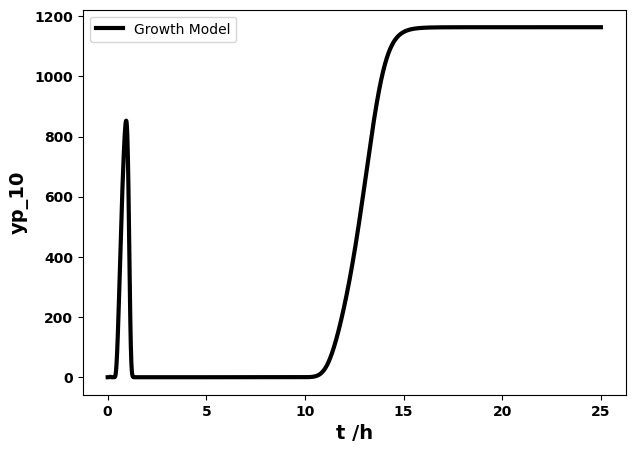

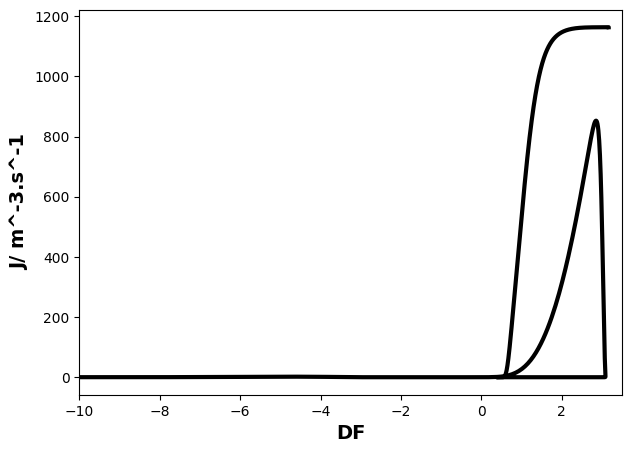

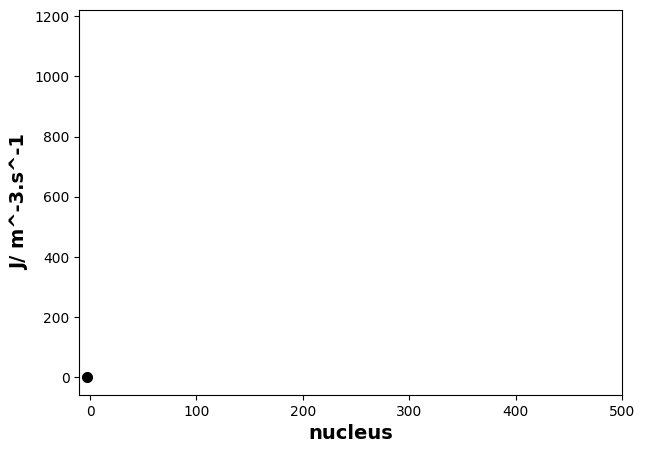

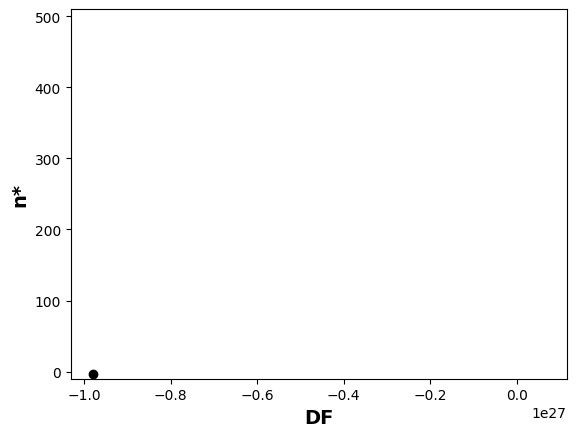

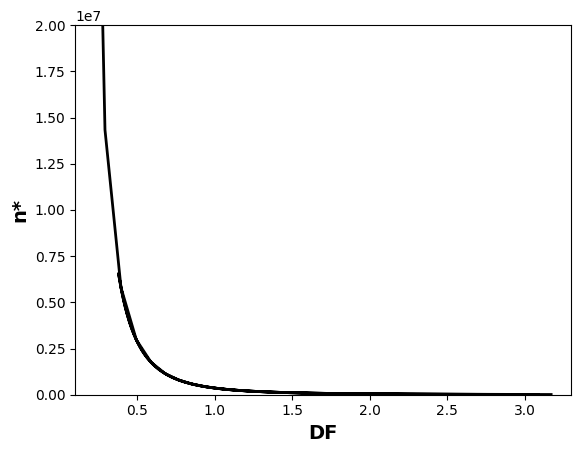

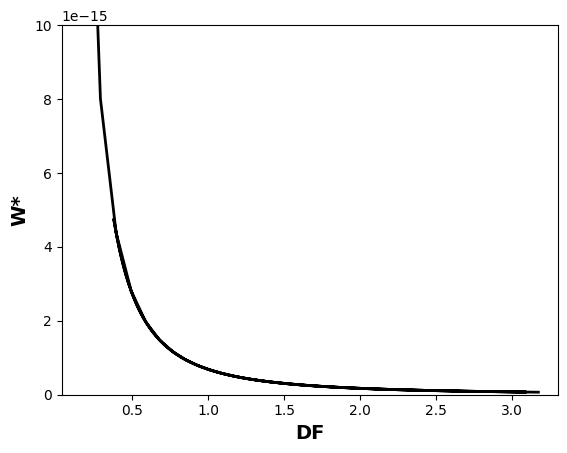

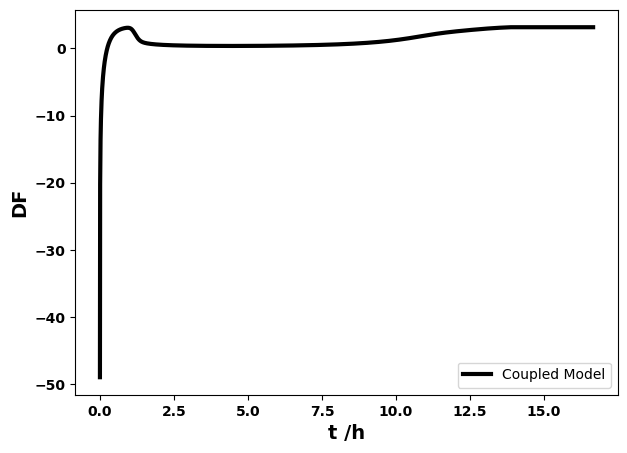

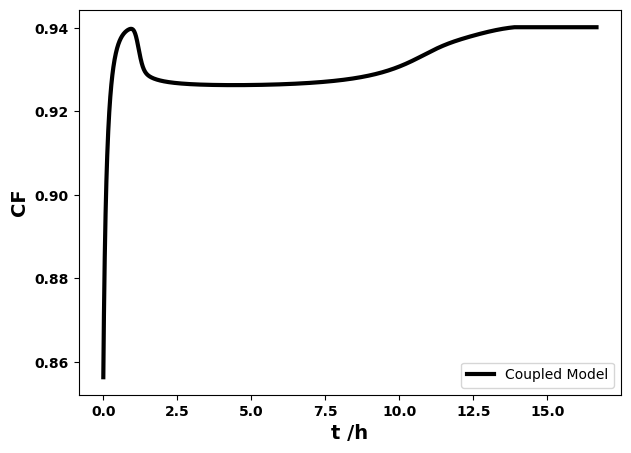

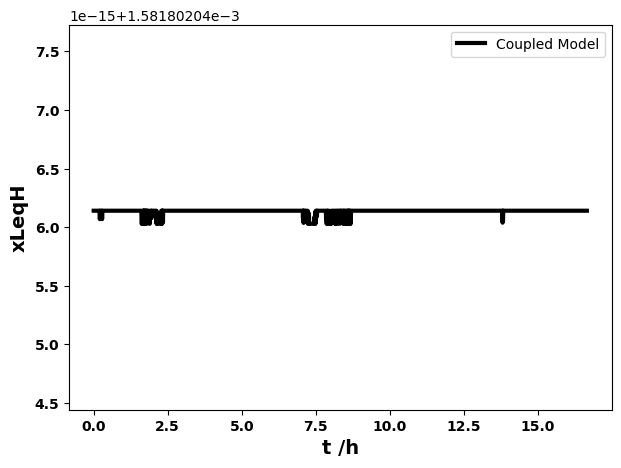

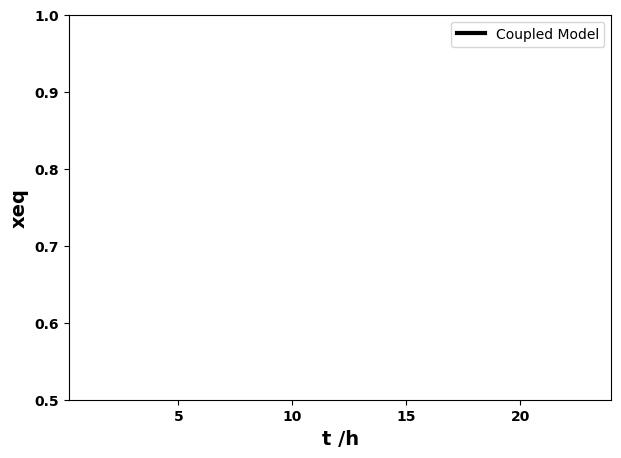

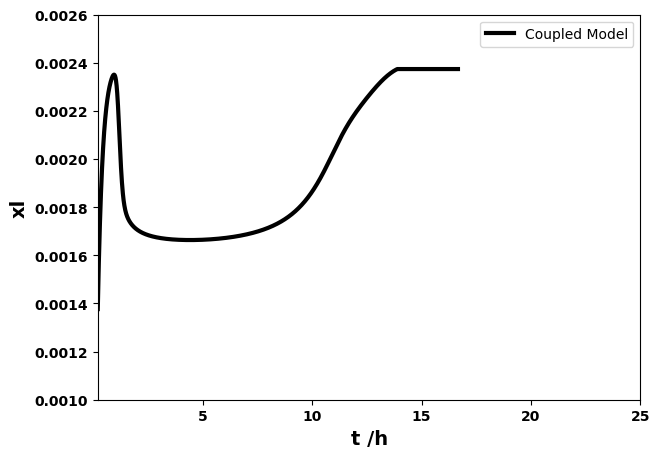

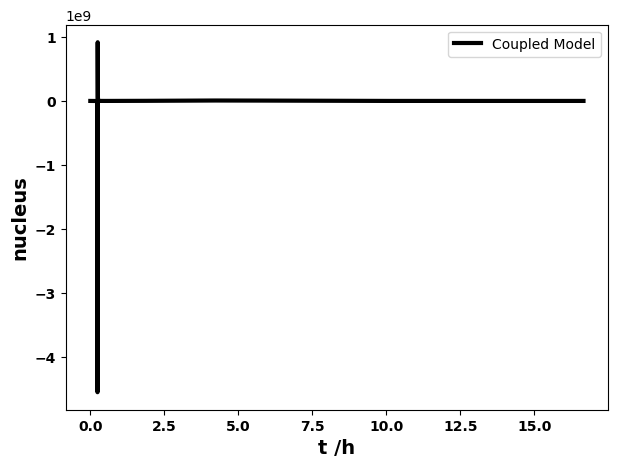

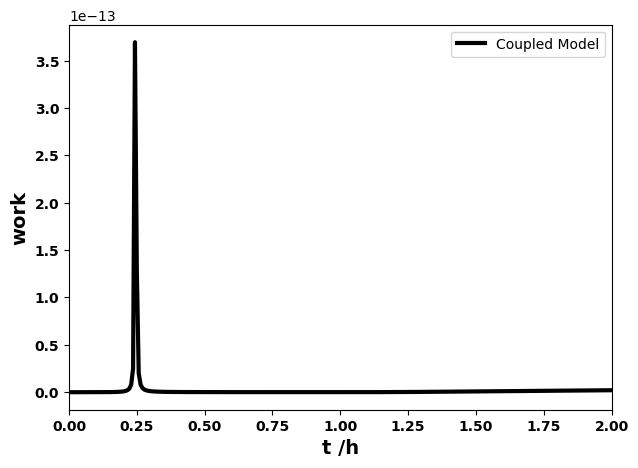

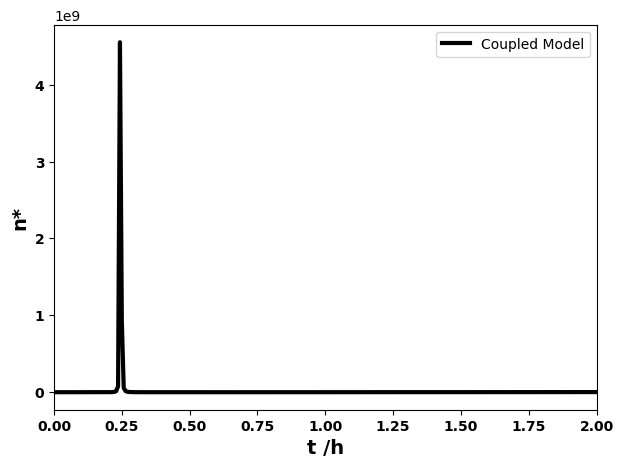

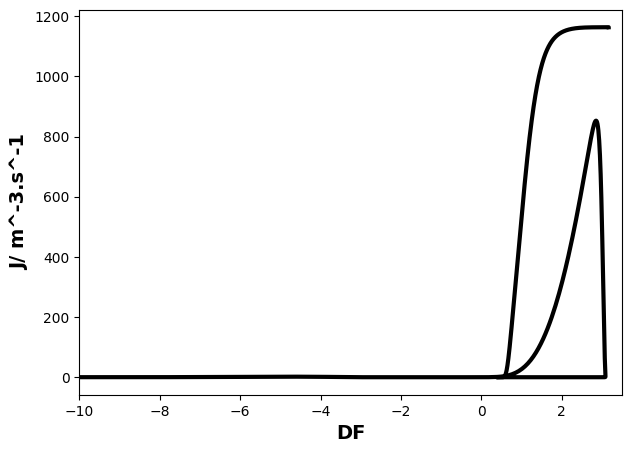

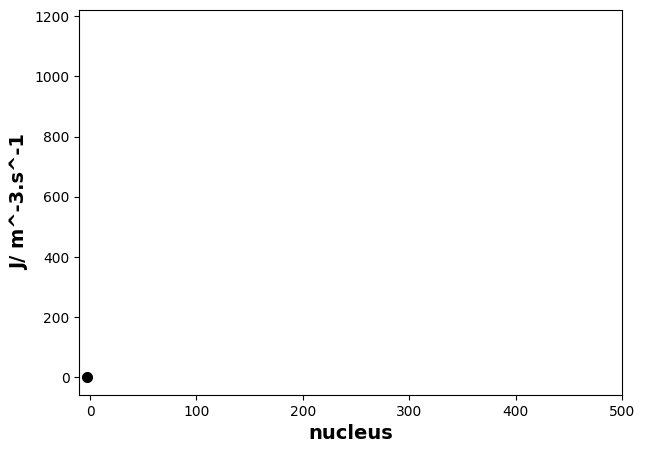

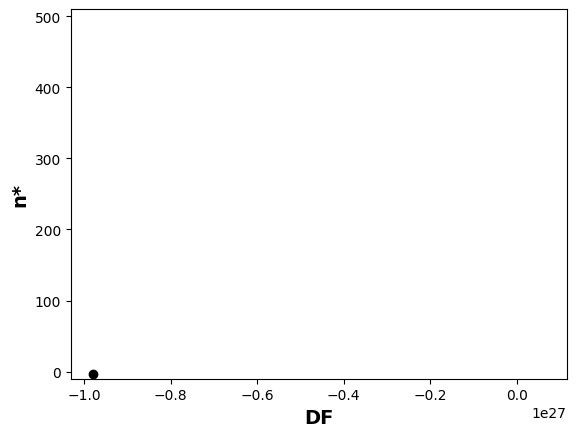

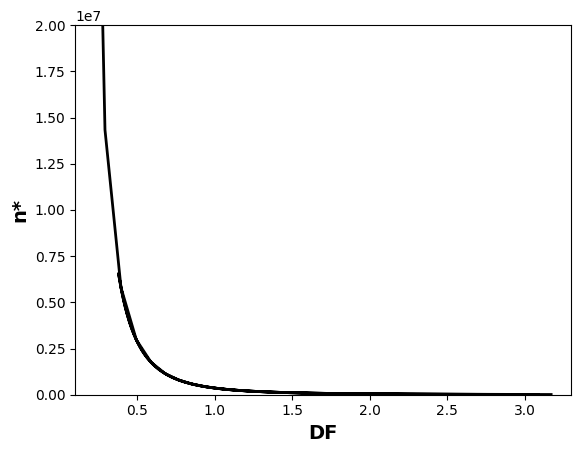

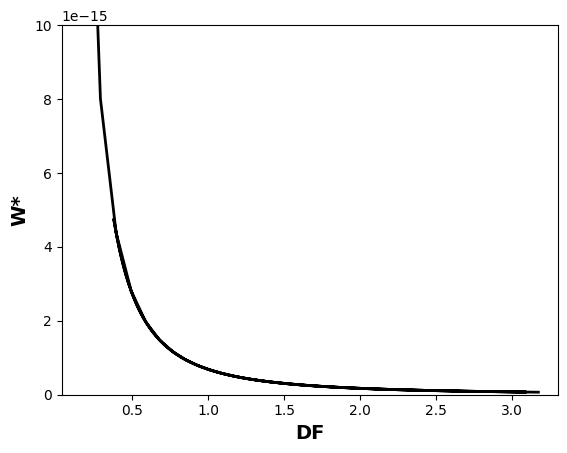

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as kB, zero_Celsius

Tp = 276.0
# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('output_dataypcrescimento+nucleacaoP=70.xlsx')
df2 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='nucleus')

# Listas de variáveis específicas para cada DataFrame
variaveis_df1 = ["yp_10"]  # Exemplo para o primeiro DataFrame
variaveis_df2 = ["DF", "CF", "xLeqH", "xeq", "xl", 'nucleus','work','n*']  # Exemplo para o segundo DataFrame

# Novo array de tempo para interpolação
t0 = np.arange(0, 60000.0, 25)

# Interpolar os dados do df2
tempo_df2 = df2['t']  # Substitua 't' pelo nome correto da coluna de tempo em df2
dados_interpolados = {}

for col in df2.columns:
    if col != 't':  # Ignorar a coluna de tempo
        dados_interpolados[col] = np.interp(t0, tempo_df2, df2[col])

# Criar um novo DataFrame com os dados interpolados
df2_interpolado = pd.DataFrame(dados_interpolados)
df2_interpolado['t'] = t0  # Adicionar a coluna de tempo interpolado

# Função para criar gráficos para um DataFrame e sua lista de variáveis
def criar_graficos(df, variaveis, label_modelo, interpolado=False):
    for var in variaveis:
        y_col = var
        x, y = (df['t'] / 3600, df[y_col]) if not interpolado else (df['t'] / 3600, df[y_col])

        plt.figure(figsize=(7, 5))

        # Plote os dados do DataFrame
        plt.plot(x, y, label=label_modelo, color='black', linewidth=3)

        # Configurações específicas para variáveis
        if var == 'xl':
            plt.ylabel('xL CH₄ (moles)', fontweight='bold', size=14)
            plt.xlim(0.2, 25)
            plt.ylim(0.001, 0.0026)
        elif var == 'xeq':
            plt.xlim(0.2, 24)
            plt.ylim(0.5, 1)
        elif var == 'n*':
            plt.xlim(0, 2)
        elif var == 'work':
            plt.xlim(0, 2)



        # Adicione título e labels aos eixos
        plt.xlabel('t /h', fontweight='bold', size=14)
        plt.ylabel(f'{var}', fontweight='bold', size=14)
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')

        # Adicione uma legenda
        plt.legend()

        # Mostre o gráfico
        plt.show()


    plt.figure(figsize=(7, 5))
    plt.plot(df2_interpolado['DF'][:len(df1["yp_10"])], df1["yp_10"][:len(df2_interpolado["DF"])], label=label_modelo, markersize=1, color='black', linewidth=3)
    plt.xlabel('DF', fontweight='bold', size=14)
    plt.ylabel('J/ m^-3.s^-1', fontweight='bold', size=14)
    plt.xlim(-10, 3.5)
    plt.show()

    plt.figure(figsize=(7, 5))
    plt.scatter(df2_interpolado['nucleus'][:len(df1["yp_10"])], df1["yp_10"][:len(df2_interpolado["nucleus"])], label=label_modelo, color='black', linewidth=2)
    plt.xlabel('nucleus', fontweight='bold', size=14)
    plt.ylabel('J/ m^-3.s^-1', fontweight='bold', size=14)
    plt.xlim(-10,500 )
    plt.show()


    plt.scatter(df2_interpolado["DF"]/kB*Tp,df2_interpolado['nucleus'], color='black', linewidth=1)
    plt.xlabel('DF', fontweight='bold', size=14)
    plt.ylabel('n*', fontweight='bold', size=14)
    plt.ylim(-10,510 )
    #plt.xlim(0,4 )
    plt.show()

    plt.plot(df2_interpolado["DF"],df2_interpolado['nucleus'], color='black', linewidth=2)
    plt.xlabel('DF', fontweight='bold', size=14)
    plt.ylabel('n*', fontweight='bold', size=14)
    plt.ylim(-10,2e7 )
    plt.xlim(0.1,3.3 )
    plt.show()

    plt.plot(df2_interpolado["DF"],df2_interpolado['work'], color='black', linewidth=2)
    plt.xlabel('DF', fontweight='bold', size=14)
    plt.ylabel('W*', fontweight='bold', size=14)
    plt.ylim(0,1e-14 )
    plt.xlim(0.04,3.3 )
    plt.show()

# Gerar gráficos para o df1 e df2 interpolado
criar_graficos(df1, variaveis_df1, "Growth Model")
criar_graficos(df2_interpolado, variaveis_df2, "Coupled Model", interpolado=True)



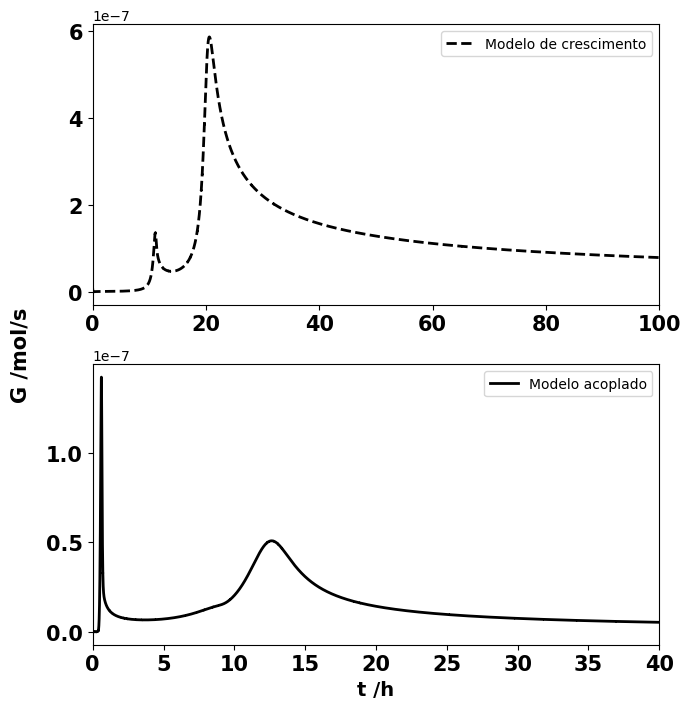

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1 (2)')
df1 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='crescimento')

# Definir a variável a ser plotada
variavel ='G'

# Selecionar os dados
x1, y1 = df1['t'] / 3600, df1[variavel]
x2, y2 = df2['t'] / 3600, df2[variavel]

# Definir os limites dos eixos
limites_x1 = (0, 100)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0,)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 40)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0,2e-7 )  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Modelo de crescimento', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
# ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Modelo acoplado', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)
#ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'G /mol/s', fontsize=15, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=15)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=15)  # Eixo Y do Coupled Model
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


A=170 rr=220

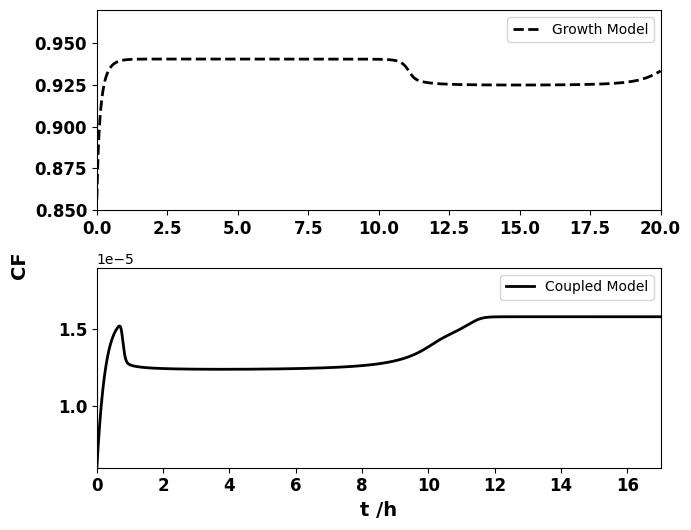

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=1.7e1rr220')
# Definir a variável a ser plotada
variavel = 'CF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 62000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["CF"] = np.interp(t0, df["t"], df["CF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['CF']

# Definir os limites dos eixos
limites_x1 = (0, 20)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0.85,0.97)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 17)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0.6e-5, 1.9e-5)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'CF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


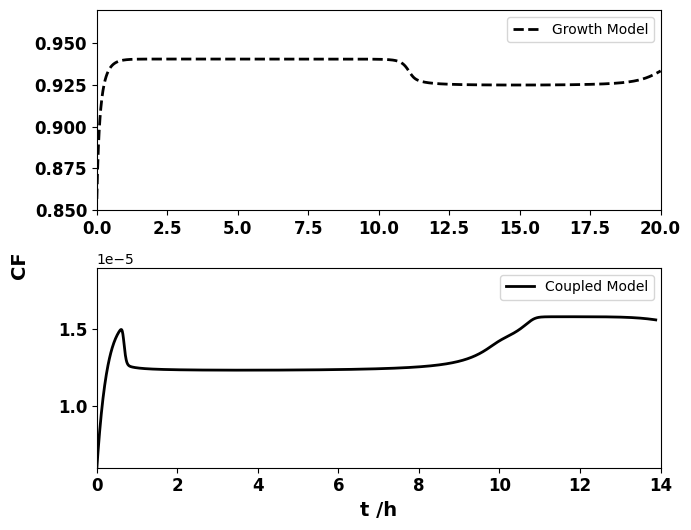

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220A=500 (1).xlsx', sheet_name='Taxas')
df2
# Definir a variável a ser plotada
variavel = 'CF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 50000.0, 25)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["CF"] = np.interp(t0, df2["t"], df2["CF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['CF']

# Definir os limites dos eixos
limites_x1 = (0, 20)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0.85,0.97)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 14)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0.6e-5, 1.9e-5)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'CF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('70BARrr=220A=300.xlsx', sheet_name='taxas')
df2
# Definir a variável a ser plotada
variavel = 'CF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 55000.0, 25)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["CF"] = np.interp(t0, df2["t"], df2["CF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['CF']

# Definir os limites dos eixos
limites_x1 = (0, 20)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0.85,0.97)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 15)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0.6e-5, 1.9e-5)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'CF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


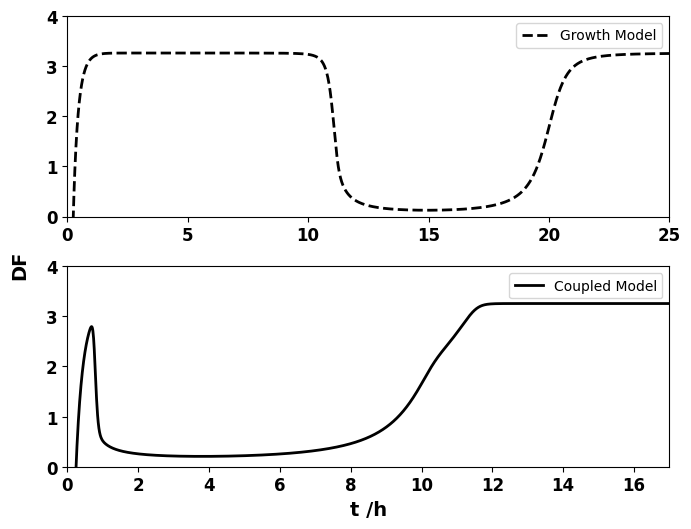

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=1.7e1rr220')
# Definir a variável a ser plotada
variavel = 'DF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 62000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["DF"] = np.interp(t0, df2["t"], df2["DF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['DF']

# Definir os limites dos eixos
limites_x1 = (0, 25)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0,4)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 17)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0,4)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'DF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


A=500 RR=220


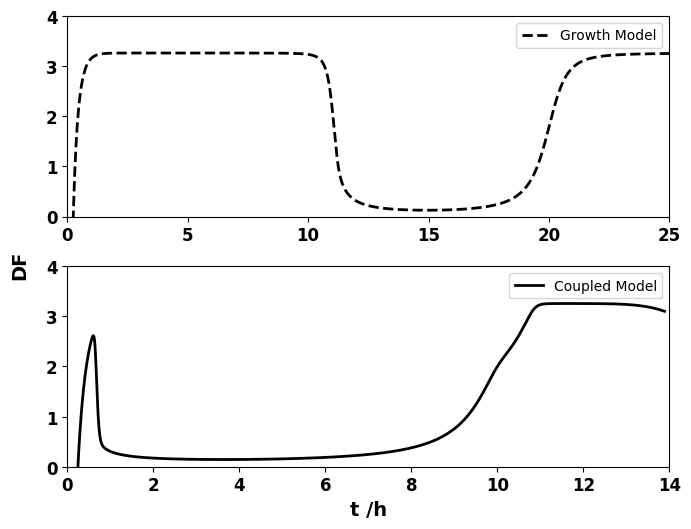

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220A=500 (1).xlsx', sheet_name='Taxas')
# Definir a variável a ser plotada
variavel = 'DF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 50000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["DF"] = np.interp(t0, df2["t"], df2["DF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['DF']

# Definir os limites dos eixos
limites_x1 = (0, 25)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0,4)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 14)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0,4)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'DF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


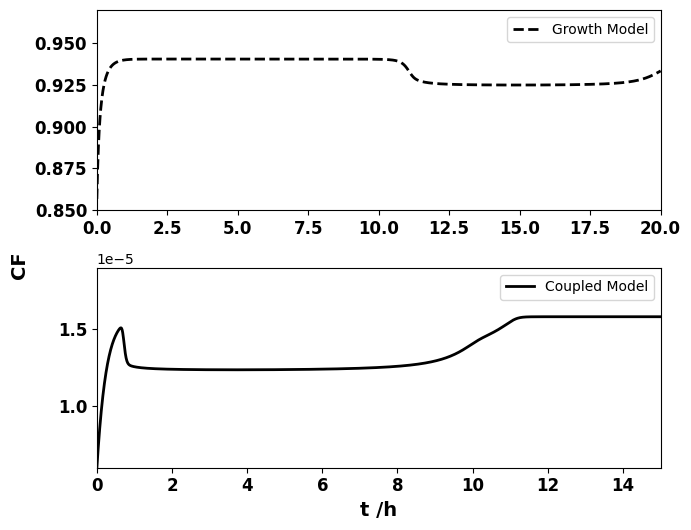

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('70BARrr=220A=300.xlsx', sheet_name='taxas')
# Definir a variável a ser plotada
variavel = 'CF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 55000.0, 25)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["CF"] = np.interp(t0, df2["t"], df2["CF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['CF']

# Definir os limites dos eixos
limites_x1 = (0, 20)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0.85,0.97)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 15)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0.6e-5, 1.9e-5)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'CF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


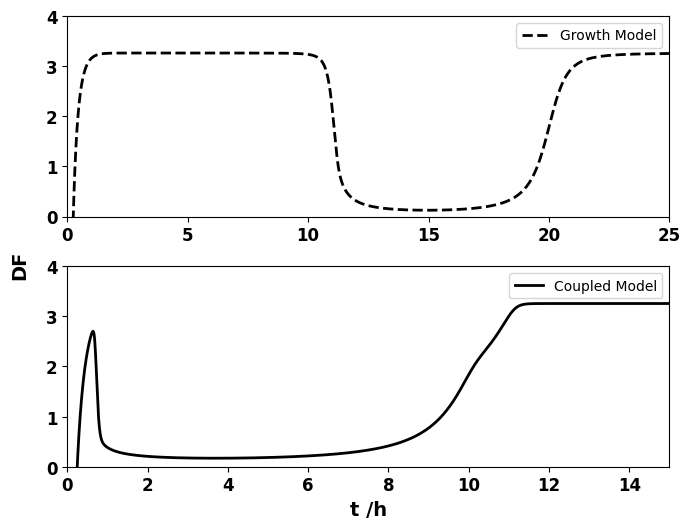

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('70BARrr=220A=300.xlsx', sheet_name='taxas')
# Definir a variável a ser plotada
variavel = 'DF'
# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 55000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["DF"] = np.interp(t0, df2["t"], df2["DF"])

# Selecionar os dados
x1, y1 = df1['t'], df1[variavel]
x2, y2 = df2_interpolado["t0"]/3600, df2_interpolado['DF']

# Definir os limites dos eixos
limites_x1 = (0, 25)   # Ajuste os limites do eixo X para o Growth Model
limites_y1 = (0,4)       # Ajuste os limites do eixo Y para o Growth Model

limites_x2 = (0, 15)    # Ajuste os limites do eixo X para o Coupled Model
limites_y2 = (0,4)  # Ajuste os limites do eixo Y para o Coupled Model

# Configurar o layout dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6))

# Plotar o gráfico do primeiro modelo
ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
ax1.legend(loc="upper right")
ax1.set_xlim(limites_x1)  # Definir limites do eixo X para Growth Model
ax1.set_ylim(limites_y1)  # Descomente se quiser definir limites do eixo Y

# Plotar o gráfico do segundo modelo
ax2.plot(x2, y2, label='Coupled Model', color='black', linestyle='-', linewidth=2)
ax2.legend(loc="upper right")
ax2.set_xlim(limites_x2)  # Definir limites do eixo X para Coupled Model
ax2.set_ylim(limites_y2)  # Definir limites do eixo Y para Coupled Model

# Definir o rótulo do eixo X para o gráfico inferior
ax2.set_xlabel('t /h', fontsize=14, fontweight='bold')

# Adicionar um título centralizado para o eixo Y
fig.text(0.02, 0.5, 'DF', fontsize=14, fontweight='bold', va='center', rotation='vertical')

# Deixar os valores dos eixos em negrito
ax1.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Growth Model
ax2.tick_params(axis='both', which='major', labelsize=12)  # Eixo Y do Coupled Model

# Definir o estilo dos rótulos dos eixos
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Mostrar o gráfico
plt.show()


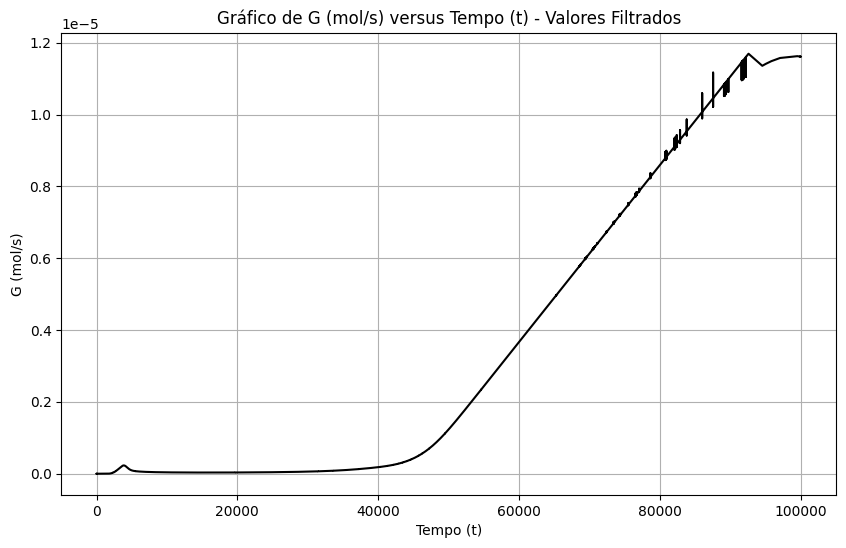

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel
df = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=170')

# Escolha a coluna de interesse e o valor limite para remoção
coluna = 'G (mol/s)'  # Nome da coluna que você quer filtrar
limite_superior = 1.17e-5  # Defina o valor máximo permitido para G (mol/s)
limite_inferior = 0  # Defina o valor mínimo permitido para G (mol/s)

# Filtrar dados removendo valores fora dos limites especificados
df_filtrado = df[(df[coluna] <= limite_superior) & (df[coluna] >= limite_inferior)]

# Plotando o gráfico de G versus t com os valores filtrados
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado['t'], df_filtrado['G (mol/s)'], linestyle='-', color='black')
plt.xlabel('Tempo (t)')
plt.ylabel('G (mol/s)')
plt.title('Gráfico de G (mol/s) versus Tempo (t) - Valores Filtrados')
plt.grid()
plt.show()


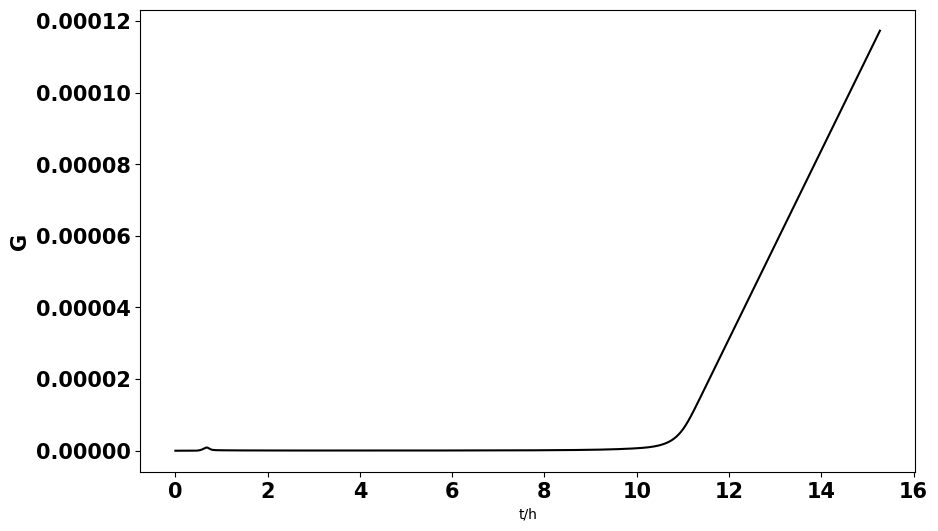

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo Excel (substitua "seu_arquivo.xlsx" pelo caminho do seu arquivo)
df = pd.read_excel('70BARrr=220A=300 (1).xlsx', sheet_name='taxas')

# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 55000.0, 25)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df_interpolado = pd.DataFrame({'t0': t0})
df_interpolado["G"] = np.interp(t0, df["t"], df["G"])

# Plotar G vs t0
plt.figure(figsize=(10, 6))
plt.plot(df_interpolado["t0"]/3600, df_interpolado["G"], label="G vs Tempo", color="black")
plt.xlabel("t/h",)
plt.ylabel("G",fontweight='bold', size=15)
#plt.title("Gráfico de G vs Tempo Interpolado")
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)
#plt.legend()
#plt.grid()
plt.show()


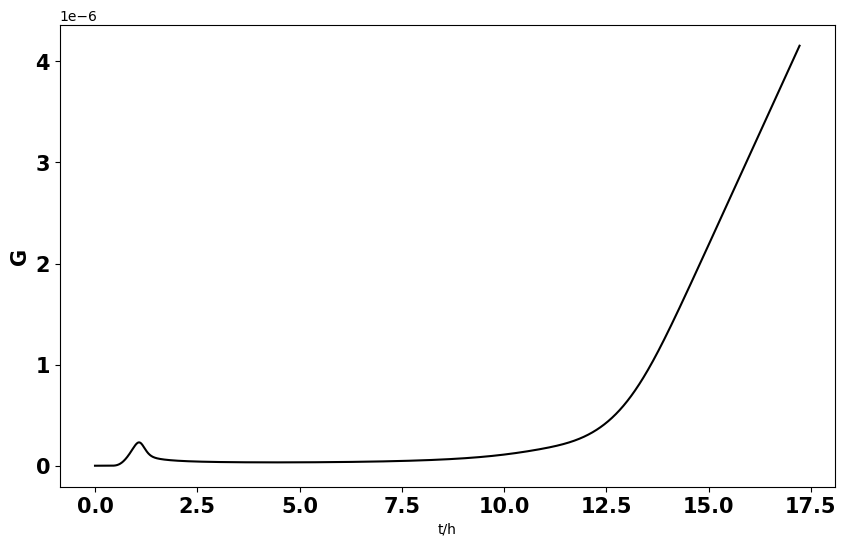

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo Excel (substitua "seu_arquivo.xlsx" pelo caminho do seu arquivo)
df = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=1.7E2')

# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 62000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df_interpolado = pd.DataFrame({'t0': t0})
df_interpolado["G"] = np.interp(t0, df["t"], df["G"])

# Plotar G vs t0
plt.figure(figsize=(10, 6))
plt.plot(df_interpolado["t0"]/3600, df_interpolado["G"], label="G vs Tempo", color="black")
plt.xlabel("t/h",)
plt.ylabel("G",fontweight='bold', size=15)
#plt.title("Gráfico de G vs Tempo Interpolado")
plt.xticks(fontweight='bold', size=15)
plt.yticks(fontweight='bold', size=15)
#plt.legend()
#plt.grid()
plt.show()


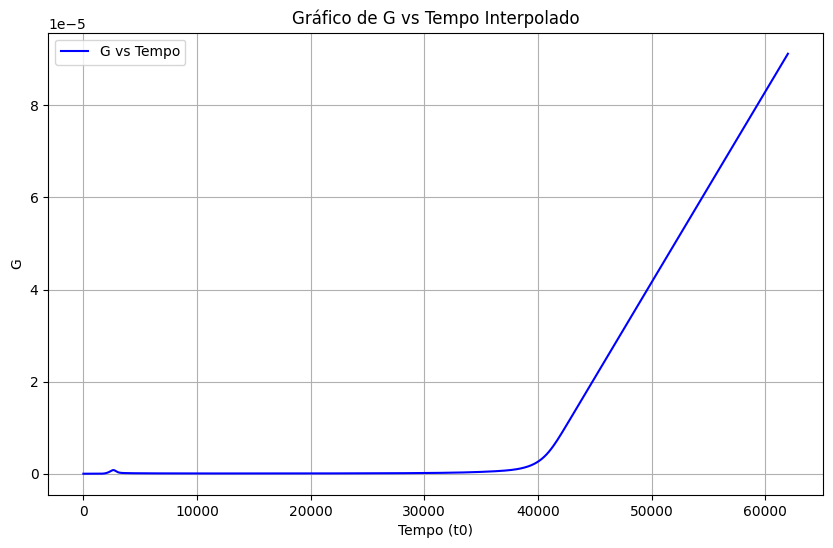

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar o arquivo Excel (substitua "seu_arquivo.xlsx" pelo caminho do seu arquivo)
df = pd.read_excel("/content/saida_dadostaxas70BARrr=220.xlsx")

# Gerar a série de tempo t0 de 0 a 62000 com intervalo de 33.75
t0 = np.arange(0, 62000.0, 33.75)

# Interpolar os dados de G para que correspondam a t0
# Aqui, assumimos que a coluna de tempo original é "tempo" e a coluna de dados é "G"
df_interpolado = pd.DataFrame({'t0': t0})
df_interpolado["G"] = np.interp(t0, df["t"], df["G"])

# Plotar G vs t0
plt.figure(figsize=(10, 6))
plt.plot(df_interpolado["t0"], df_interpolado["G"], label="G vs Tempo", color="blue")
plt.xlabel("Tempo (t0)")
plt.ylabel("G")
plt.title("Gráfico de G vs Tempo Interpolado")
plt.legend()
plt.grid()
plt.show()


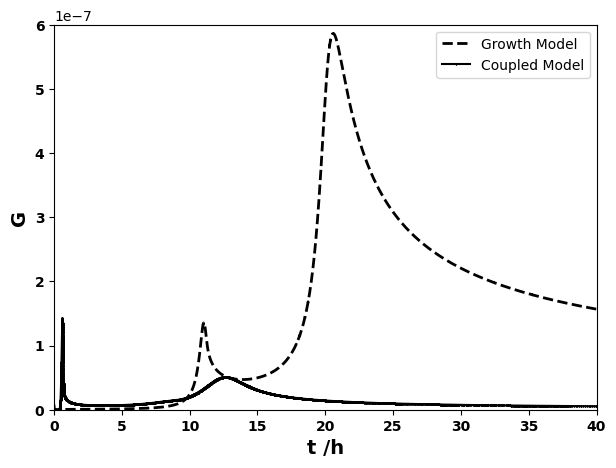

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df2 = pd.read_excel('ycrescimento+nucleação70BARrr=220e-4A=300 (2).xlsx', sheet_name='Sheet1 (2)')
df1 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='crescimento')


# Definir as variáveis corretamente
variaveis = [ 'G']

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
for var in variaveis:
    y_col = var

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t']/3600, df1[y_col]
    x2, y2 = df2['t'] / 3600, df2[y_col]

    plt.figure(figsize=(7, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Model', markersize=1, color='black', linestyle='--', linewidth=2)

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')

    if var == 'xl':
      # Adicionando 'xeq' e 'xLeqH' no gráfico de 'xl'
      plt.plot(df1['t'] / 3600, df1['xeq'], label='xeq ', linestyle='-', color='blue', linewidth=2)

      plt.plot(df1['t'] / 3600, df1['xLeqH'], label='xLeqH ', linestyle='-', color='red', linewidth=2)


    # Adicione título e labels aos eixos

    plt.xlabel('t /h',fontweight='bold',size=14)
    plt.ylabel(f'{var}',fontweight='bold',size=14)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Defina os limites do eixo X e Y individualmente
    if var == 'G':
        plt.xlim(0, 40)
        plt.ylim(0, 6e-7)  # Exemplo de limite para o eixo Y de 'G'
    elif var == 'CF':
        plt.xlim(-0.1, 20)
        plt.ylim(0.88, 0.96)  # Exemplo de limite para o eixo Y de 'Deltami'
    elif var == 'xLeqH':
        plt.xlim(0.2, 20)
        plt.ylim(0, 1)  # Exemplo de limite para o eixo Y de 'xLeqH'
    elif var == 'xeq':
        plt.xlim(0.2, 24)
        plt.ylim(0.5, 1)  # Exemplo de limite para o eixo Y de 'xeq'
    elif var == 'xl':
        plt.xlim(0.2, 25)
        plt.ylim(0.001, 0.0026)  # Exemplo de limite para o eixo Y de 'xl'

    # Adicione uma legenda
    plt.legend()


    # Mostre o gráfico
    plt.show()


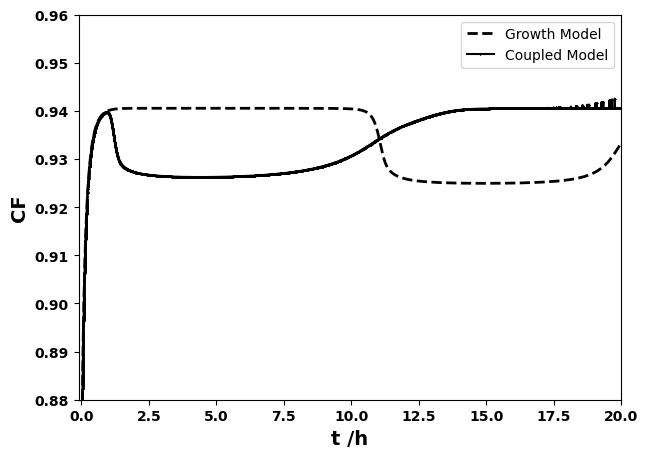

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=170')


# Definir as variáveis corretamente
variaveis = [ 'CF']

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
for var in variaveis:
    y_col = var

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t'], df1[y_col]
    x2, y2 = df2['t'] / 3600, df2[y_col]

    plt.figure(figsize=(7, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Model', markersize=1, color='black', linestyle='--', linewidth=2)

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')

    if var == 'xl':
      # Adicionando 'xeq' e 'xLeqH' no gráfico de 'xl'
      plt.plot(df1['t'] / 3600, df1['xeq'], label='xeq ', linestyle='-', color='blue', linewidth=2)

      plt.plot(df1['t'] / 3600, df1['xLeqH'], label='xLeqH ', linestyle='-', color='red', linewidth=2)


    # Adicione título e labels aos eixos

    plt.xlabel('t /h',fontweight='bold',size=14)
    plt.ylabel(f'{var}',fontweight='bold',size=14)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Defina os limites do eixo X e Y individualmente
    if var == 'G (mol/s)':
        plt.xlim(0, 100)
        plt.ylim(0, 0.2e-5)  # Exemplo de limite para o eixo Y de 'G'
    elif var == 'CF':
        plt.xlim(-0.1, 20)
        plt.ylim(0.88, 0.96)  # Exemplo de limite para o eixo Y de 'Deltami'
    elif var == 'xLeqH':
        plt.xlim(0.2, 20)
        plt.ylim(0, 1)  # Exemplo de limite para o eixo Y de 'xLeqH'
    elif var == 'xeq':
        plt.xlim(0.2, 24)
        plt.ylim(0.5, 1)  # Exemplo de limite para o eixo Y de 'xeq'
    elif var == 'xl':
        plt.xlim(0.2, 25)
        plt.ylim(0.001, 0.0026)  # Exemplo de limite para o eixo Y de 'xl'

    # Adicione uma legenda
    plt.legend()


    # Mostre o gráfico
    plt.show()


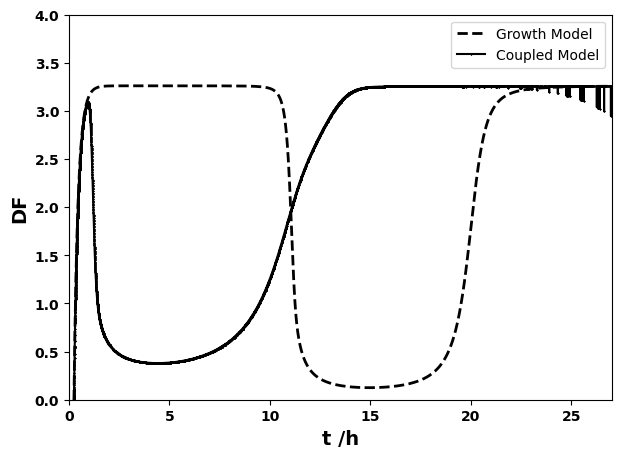

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='A=170')


# Definir as variáveis corretamente
variaveis = [ 'DF']

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
for var in variaveis:
    y_col = var

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t'], df1[y_col]
    x2, y2 = df2['t'] / 3600, df2[y_col]

    plt.figure(figsize=(7, 5))

    # Plote os dados do primeiro arquivo
    plt.plot(x1, y1, label='Growth Model', markersize=1, color='black', linestyle='--', linewidth=2)

    # Plote os dados do segundo arquivo
    plt.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')

    if var == 'xl':
      # Adicionando 'xeq' e 'xLeqH' no gráfico de 'xl'
      plt.plot(df1['t'] / 3600, df1['xeq'], label='xeq ', linestyle='-', color='blue', linewidth=2)

      plt.plot(df1['t'] / 3600, df1['xLeqH'], label='xLeqH ', linestyle='-', color='red', linewidth=2)


    # Adicione título e labels aos eixos

    plt.xlabel('t /h',fontweight='bold',size=14)
    plt.ylabel(f'{var}',fontweight='bold',size=14)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Defina os limites do eixo X e Y individualmente
    if var == 'G (mol/s)':
        plt.xlim(0, 100)
        plt.ylim(0, 0.2e-5)  # Exemplo de limite para o eixo Y de 'G'
    elif var == 'DF':
        plt.xlim(0.0, 27)
        plt.ylim(0,4 )  # Exemplo de limite para o eixo Y de 'Deltami'
    elif var == 'xLeqH':
        plt.xlim(0.2, 20)
        plt.ylim(0, 1)  # Exemplo de limite para o eixo Y de 'xLeqH'
    elif var == 'xeq':
        plt.xlim(0.2, 24)
        plt.ylim(0.5, 1)  # Exemplo de limite para o eixo Y de 'xeq'
    elif var == 'xl':
        plt.xlim(0.2, 25)
        plt.ylim(0.001, 0.0026)  # Exemplo de limite para o eixo Y de 'xl'

    # Adicione uma legenda
    plt.legend()


    # Mostre o gráfico
    plt.show()


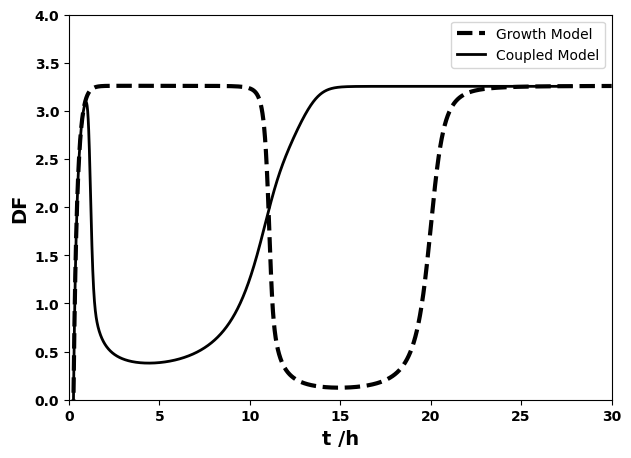

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar a série de tempo t0 de 0 a 55000 com intervalo de 33.75
t0 = np.arange(0, 100000.0, 33.75)

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2 atualizado.xlsx', sheet_name='A=170')

# Criar um novo DataFrame interpolado para o df2
df2_interpolado = pd.DataFrame({'t0': t0})
df2_interpolado["DF"] = np.interp(t0, df2["t"], df2["DF"])

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
variaveis = ['DF']

for var in variaveis:
    plt.figure(figsize=(7, 5))

    # Dados do df1 (sem interpolação)
    plt.plot(df1['t'], df1[var], label='Growth Model', linestyle='--', color='black', linewidth=3)

    # Dados do df2 interpolados
    plt.plot(df2_interpolado['t0'] / 3600, df2_interpolado[var], label='Coupled Model',
             linestyle='-', color='black', linewidth=2)

    # Adicione título e labels aos eixos
    plt.xlabel('t /h', fontweight='bold', size=14)
    plt.ylabel(f'{var}', fontweight='bold', size=14)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Defina os limites do eixo X e Y individualmente
    if var == 'DF':
        plt.xlim(0.0, 30)
        plt.ylim(0, 4)  # Limites para o eixo Y de 'DF'

    # Adicione uma legenda
    plt.legend()

    # Mostre o gráfico
    plt.show()


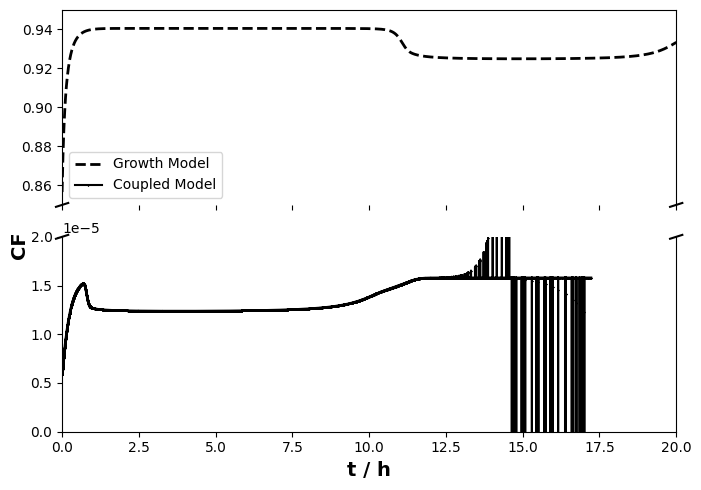

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados das diferentes abas do mesmo arquivo
df1 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='crescimento2')
df2 = pd.read_excel('saida_dadosA=1.5E2.xlsx', sheet_name='A=1.7e1rr220')

# Definir as variáveis corretamente
variaveis = ['CF']

# Iterar sobre as variáveis e definir os limites individuais para cada gráfico
for var in variaveis:
    y_col = var

    # Selecionar as colunas específicas de cada dataframe
    x1, y1 = df1['t'], df1[y_col]
    x2, y2 = df2['t'] / 3600, df2[y_col]

    # Se a variável for CF, criamos um gráfico com quebra no eixo Y
    if var == 'CF':
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 5))

        # Plotar os dados para o modelo de crescimento (Growth Model)
        ax1.plot(x1, y1, label='Growth Model', color='black', linestyle='--', linewidth=2)
        ax2.plot(x1, y1, color='black', linestyle='--', linewidth=3)

        # Plotar os dados para o modelo acoplado (Coupled Model)
        ax1.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')
        ax2.plot(x2, y2, marker='x', markersize=1, color='black')

        # Definir os limites do eixo Y para cada subplot para criar o efeito de quebra
        ax1.set_ylim(0.85, 0.95)  # Limite superior (valores maiores)
        ax2.set_ylim(0, 2e-5)     # Limite inferior (valores menores)
        ax1.set_xlim(0, 25)  # Limite superior (valores maiores)
        ax2.set_xlim(0, 20)     # Limite inferior (valores menores)

        # Remover os eixos superiores e inferiores para criar a quebra visual
        ax1.spines['bottom'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax1.tick_params(labelbottom=False)

        # Adicionar a linha serrilhada para indicar a quebra no eixo Y
        d = .01  # Tamanho ajustado da serrilha para aproximar os riscos
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

        # Adicionar um único título centralizado para o eixo Y
        fig.text(0.005, 0.5, f'{var}', va='center', rotation='vertical', fontweight='bold', size=14)

        # Adicionar label ao eixo X no eixo inferior
        ax2.set_xlabel('t / h', fontweight='bold', size=14)

        # Adicionar legenda
        ax1.legend()

        plt.tight_layout()
        plt.show()

    else:
        # Para as outras variáveis, criar um gráfico simples
        plt.figure(figsize=(7, 5))

        # Plotar os dados do primeiro arquivo
        plt.plot(x1, y1, label='Growth Model', markersize=1, color='black', linestyle='--', linewidth=2)

        # Plotar os dados do segundo arquivo
        plt.plot(x2, y2, label='Coupled Model', marker='x', markersize=1, color='black')

        if var == 'xl':
            # Adicionar 'xeq' e 'xLeqH' no gráfico de 'xl'
            plt.plot(df1['t'] / 3600, df1['xeq'], label='xeq', linestyle='-', color='blue', linewidth=2)
            plt.plot(df1['t'] / 3600, df1['xLeqH'], label='xLeqH', linestyle='-', color='red', linewidth=2)

        # Adicionar título e labels aos eixos
        plt.xlabel('t / h', fontweight='bold', size=14)
        plt.ylabel(f'{var}', fontweight='bold', size=14)
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')

        # Adicionar uma legenda
        plt.legend()

        # Mostrar o gráfico
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Funções de erro
def mae(y_model, y_exp):
    return np.mean(np.abs(y_model - y_exp))

def rmse(y_model, y_exp):
    return np.sqrt(np.mean((y_model - y_exp) ** 2))

def r2(y_model, y_exp):
    ss_res = np.sum((y_exp - y_model) ** 2)
    ss_tot = np.sum((y_exp - np.mean(y_exp)) ** 2)
    return 1 - (ss_res / ss_tot)

# Carregar as diferentes abas do arquivo Excel
file_path = 'ycrescimento+nucleação70BAR.xlsx'  # Insira o caminho do seu arquivo
# Lista de abas a serem processadas
abas_para_processar = ['A=500','A=0']
dados = pd.read_excel(file_path, sheet_name=None)  # Carrega todas as abas

# Criar um DataFrame vazio para armazenar os resultados
resultados = pd.DataFrame(columns=['A', 'MAE', 'RMSE', 'R²'])

# Iterar sobre cada aba e calcular os erros
for aba in abas_para_processar:
    dados_model = dados[aba]  # Seleciona a aba

    # Remover valores NaN
    dados_model = dados_model.dropna(subset=['t(h)', 'ng', 't(norm)', 'delta ng'])

    # Acessar colunas específicas
    tempo_exp = dados_model['t(h)'].values
    y_exp = dados_model['ng'].values

    tempo_model = dados_model['t(norm)'].values
    y_model = dados_model['delta ng'].values

    # Definir uma margem de tolerância (epsilon) para comparar valores
    epsilon = 1e-6

    # Truncar os dados experimentais para garantir que estão dentro do intervalo de tempo_model com tolerância
    mask = (tempo_exp >= tempo_model.min() - epsilon) & (tempo_exp <= tempo_model.max() + epsilon)
    tempo_exp_trunc = tempo_exp[mask]
    y_exp_trunc = y_exp[mask]

    # Verificações para garantir que não estamos lidando com arrays vazios
    if len(tempo_exp_trunc) == 0 or len(y_exp_trunc) == 0:
        print(f"Dados experimentais vazios após truncamento na aba {aba}. Pulando esta aba.")
        continue
    if len(tempo_model) == 0 or len(y_model) == 0:
        print(f"Dados do modelo vazios na aba {aba}. Pulando esta aba.")
        continue

    # Interpolação do modelo "delta ng"
    try:
        interp_model = interp1d(tempo_model, y_model, kind='linear')
        y_model_interp = interp_model(tempo_exp_trunc)
    except ValueError as e:
        print(f"Erro de interpolação na aba {aba}: {e}")
        continue

    # Calculando os erros para o modelo "delta ng"
    mae_value_model = mae(y_model_interp, y_exp_trunc)
    rmse_value_model = rmse(y_model_interp, y_exp_trunc)
    r2_value_model = r2(y_model_interp, y_exp_trunc)

    # Verificar se o nome da aba contém "="
    if '=' in aba:
        A_value = int(aba.split('=')[1])  # Extrair o valor de A da aba
    else:
        A_value = aba  # Se não houver "=", use o nome da aba como está (por exemplo, 'crescimento')

    # Adicionando os resultados ao DataFrame
    resultados = pd.concat([resultados, pd.DataFrame({
        'A': [A_value],
        'MAE': [mae_value_model],
        'RMSE': [rmse_value_model],
        'R²': [r2_value_model]
    })])

# Exibir o DataFrame com os resultados
print(resultados)


Dados experimentais vazios após truncamento na aba A=500. Pulando esta aba.
Dados experimentais vazios após truncamento na aba A=0. Pulando esta aba.
Empty DataFrame
Columns: [A, MAE, RMSE, R²]
Index: []


Error 76 bar


      A       MAE      RMSE        R²
0    50  0.006084  0.007122  0.872551
0     0  0.005938  0.006406  0.896883
0  1000  0.004916  0.005841  0.914265
0   170  0.005400  0.006221  0.902762
0   500  0.006510  0.007857  0.844880


<ipython-input-64-36ab4ef764b9>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({


In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def process_data(file_path, sheet_names, include_ingrid=True):
    # Carregar as diferentes abas do arquivo Excel
    dados = pd.read_excel(file_path, sheet_name=sheet_names)  # Carrega todas as abas

    # Criar um DataFrame vazio para armazenar os resultados
    resultados = pd.DataFrame(columns=['A', 'MAE', 'RMSE', 'R²', 'MAPE'])  # Adicionando a coluna MAPE

    # Iterar sobre cada aba e calcular os erros
    for aba in sheet_names:
        dados_model = dados[aba]  # Seleciona a aba

        # Acessar colunas específicas
        tempo_exp = dados_model['t(h)'].dropna().values
        y_exp = dados_model['ng'].dropna().values

        tempo_model = dados_model['t(norm)'].dropna().values
        y_model = dados_model['delta ng'].dropna().values

        # Interpolação do modelo "delta ng"
        interp_model = interp1d(tempo_model, y_model, kind='linear', fill_value="extrapolate")
        y_model_interp = interp_model(tempo_exp)

        # Calculando os erros para o modelo "delta ng"
        mae = mean_absolute_error(y_exp, y_model_interp)
        rmse = mean_squared_error(y_exp, y_model_interp, squared=False)  # RMSE = sqrt(MSE)
        r2 = r2_score(y_exp, y_model_interp)

        # Calculando MAPE
        mape = np.mean(np.abs((y_exp - y_model_interp) / y_exp)) * 100  # Multiplica por 100 para converter em porcentagem

        # Adicionando os resultados do modelo "delta ng" ao DataFrame
        A_value = aba.split('=')[-1]  # Extrair o valor de A da aba
        resultados = pd.concat([resultados, pd.DataFrame({
            'A': [A_value],
            'MAE': [mae],
            'RMSE': [rmse],
            'R²': [r2],
            'MAPE': [mape]  # Adicionando MAPE
        })])

    if include_ingrid:
        tempo_ingrid = dados_model['tnorm(h ingrid)'].dropna().values
        y_ingrid = dados_model['ngnorm(mol ingrid)'].dropna().values

        interp_ingrid = interp1d(tempo_ingrid, y_ingrid, kind='linear', fill_value="extrapolate")
        y_ingrid_interp = interp_ingrid(tempo_exp)

        # Calculando os erros para o modelo "Ingrid"
        mae_value_ingrid = mean_absolute_error(y_ingrid_interp, y_exp)
        rmse_value_ingrid = mean_squared_error(y_ingrid_interp, y_exp, squared=False)
        r2_value_ingrid = r2_score(y_ingrid_interp, y_exp)

        # Calculando MAPE para o modelo "Ingrid"
        mape_value_ingrid = np.mean(np.abs((y_exp - y_ingrid_interp) / y_exp)) * 100  # Multiplica por 100 para converter em porcentagem

        # Adicionando os resultados do modelo "Ingrid" ao DataFrame com A = 0
        resultados = pd.concat([resultados, pd.DataFrame({
            'A': ['CRESCIMENTO'],
            'MAE': [mae_value_ingrid],
            'RMSE': [rmse_value_ingrid],
            'R²': [r2_value_ingrid],
            'MAPE': [mape_value_ingrid]  # Adicionando MAPE
        })])

    return resultados


In [ ]:
process_data('ycrescimento+nucleação76BAR.xlsx', ['A=50', 'A=0','A=1000', 'A=170', 'A=500'], False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-115-7f27293e0de0>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squa

A       MAE      RMSE        R²
0    50  0.006084  0.007122  0.872551
0     0  0.005938  0.006406  0.896883
0  1000  0.004916  0.005841  0.914265
0   170  0.005400  0.006221  0.902762
0   500  0.006510  0.007857  0.844880

error 66 bar


In [ ]:
process_data('ycrescimento+nucleação66BAR.xlsx', ['NU A=170', 'A=300',"A=300 RR=220"])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-16-e40695aa3583>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squar

A       MAE      RMSE        R²       MAPE
0          170  0.003998  0.005056  0.957820   7.054506
0          300  0.003447  0.003993  0.973700   5.433176
0          220  0.003957  0.004543  0.965953   6.363732
0  CRESCIMENTO  0.007592  0.012346  0.866328  15.392708

erro 63 bar

In [ ]:
process_data('ycrescimento+nucleação 63 bar .xlsx', ['rr=0.0026','rr=0.026 A=100e2', 'rr=0.026 A=22e2'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-115-7f27293e0de0>:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squa

A       MAE      RMSE        R²
0       0.0026  0.005006  0.005701  0.909773
0        100e2  0.004754  0.005654  0.911266
0         22e2  0.004820  0.005581  0.913534
0  CRESCIMENTO  0.005912  0.006856  0.921339

In [ ]:
process_data('output_datanu+cresA=1.7E2P=70 bar.xlsx', ['rr=2.2e-1','rr=2e-2','rr=220 ','rr=2.2e-4'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-43-c035136f3c37>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squar

A       MAE      RMSE        R²       MAPE
0       2.2e-1  0.003084  0.003829  0.971778  17.955070
0         2e-2  0.003077  0.003815  0.971983  17.544789
0         220   0.001356  0.001655  0.994726  16.013175
0       2.2e-4  0.001920  0.002092  0.991573  14.865720
0  CRESCIMENTO  0.003016  0.003525  0.978725  27.298051

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def process_data(file_path, sheet_names, include_ingrid=True):
    # Carregar as diferentes abas do arquivo Excel
    dados = pd.read_excel(file_path, sheet_name=sheet_names)  # Carrega todas as abas

    # Criar um DataFrame vazio para armazenar os resultados
    resultados = pd.DataFrame(columns=['A', 'Parte', 'MAE', 'RMSE', 'R²'])

    # Iterar sobre cada aba e calcular os erros
    for aba in sheet_names:
        dados_model = dados[aba]  # Seleciona a aba

        # Acessar colunas específicas
        tempo_exp = dados_model['t(h)'].dropna().values
        y_exp = dados_model['ng'].dropna().values

        tempo_model = dados_model['t(norm)'].dropna().values
        y_model = dados_model['delta ng'].dropna().values

        # Interpolação do modelo "delta ng"
        interp_model = interp1d(tempo_model, y_model, kind='linear', fill_value="extrapolate")
        y_model_interp = interp_model(tempo_exp)

        # Dividir os dados com base em t = 0,2
        split_value = 0.2
        inicio_mask = tempo_exp <= split_value
        fim_mask = tempo_exp > split_value

        for part, mask in zip(['Início', 'Fim'], [inicio_mask, fim_mask]):
            # Calcular métricas para a parte específica
            mae = mean_absolute_error(y_exp[mask], y_model_interp[mask])
            rmse = mean_squared_error(y_exp[mask], y_model_interp[mask], squared=False)
            r2 = r2_score(y_exp[mask], y_model_interp[mask])

            # Adicionando os resultados ao DataFrame
            A_value = aba.split('=')[-1]  # Extrair o valor de A da aba
            resultados = pd.concat([resultados, pd.DataFrame({
                'A': [A_value],
                'Parte': [part],
                'MAE': [mae],
                'RMSE': [rmse],
                'R²': [r2]
            })])

    if include_ingrid:
        tempo_ingrid = dados_model['tnorm(h ingrid)'].dropna().values
        y_ingrid = dados_model['ngnorm(mol ingrid)'].dropna().values

        interp_ingrid = interp1d(tempo_ingrid, y_ingrid, kind='linear', fill_value="extrapolate")
        y_ingrid_interp = interp_ingrid(tempo_exp)

        for part, mask in zip(['Início', 'Fim'], [inicio_mask, fim_mask]):
            # Calculando os erros para o modelo "Ingrid" na parte específica
            mae_ingrid = mean_absolute_error(y_ingrid_interp[mask], y_exp[mask])
            rmse_ingrid = mean_squared_error(y_ingrid_interp[mask], y_exp[mask], squared=False)
            r2_ingrid = r2_score(y_ingrid_interp[mask], y_exp[mask])

            # Adicionando os resultados do modelo "Ingrid" ao DataFrame com A = "CRESCIMENTO"
            resultados = pd.concat([resultados, pd.DataFrame({
                'A': ['CRESCIMENTO'],
                'Parte': [part],
                'MAE': [mae_ingrid],
                'RMSE': [rmse_ingrid],
                'R²': [r2_ingrid]
            })])

    return resultados


In [ ]:
process_data('output_datanu+cresA=1.7E2P=70 bar.xlsx', ['rr=2.2e-1','rr=2e-2','rr=220 ','rr=2.2e-4'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-20-07f166e5a4de>:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squar

A   Parte       MAE      RMSE        R²
0       2.2e-1  Início  0.001567  0.001690  0.947994
0       2.2e-1     Fim  0.005444  0.005747  0.897226
0         2e-2  Início  0.001538  0.001631  0.951518
0         2e-2     Fim  0.005472  0.005749  0.897139
0         220   Início  0.001807  0.002026  0.925209
0         220      Fim  0.000654  0.000784  0.998089
0       2.2e-4  Início  0.001390  0.001472  0.960507
0       2.2e-4     Fim  0.002745  0.002795  0.975684
0  CRESCIMENTO  Início  0.004176  0.004372  0.594136
0  CRESCIMENTO     Fim  0.001212  0.001420  0.994207

In [ ]:
process_data('70BARrr=220A=300.xlsx', ['A=300 rr=220'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-30-e40695aa3583>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


A       MAE      RMSE        R²       MAPE
0          220  0.001361  0.001601  0.995066  15.702832
0  CRESCIMENTO  0.003016  0.003525  0.978725  27.298051

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def process_data(file_path, sheet_names, include_ingrid=True):
    # Carregar as diferentes abas do arquivo Excel
    dados = pd.read_excel(file_path, sheet_name=sheet_names)  # Carrega todas as abas

    # Criar um DataFrame vazio para armazenar os resultados
    resultados = pd.DataFrame(columns=['A', 'Parte', 'MAE', 'RMSE', 'MAPE (%)', 'R² (%)'])

    # Iterar sobre cada aba e calcular os erros
    for aba in sheet_names:
        dados_model = dados[aba]  # Seleciona a aba

        # Acessar colunas específicas
        tempo_exp = dados_model['t(h)'].dropna().values
        y_exp = dados_model['ng'].dropna().values

        tempo_model = dados_model['t(norm)'].dropna().values
        y_model = dados_model['delta ng'].dropna().values

        # Interpolação do modelo "delta ng"
        interp_model = interp1d(tempo_model, y_model, kind='linear', fill_value="extrapolate")
        y_model_interp = interp_model(tempo_exp)

        # Dividir os dados com base em t = 0,2
        split_value = 0.2
        inicio_mask = tempo_exp <= split_value
        fim_mask = tempo_exp > split_value

        for part, mask in zip(['Início', 'Fim'], [inicio_mask, fim_mask]):
            # Calcular métricas para a parte específica em termos percentuais
            mae = mean_absolute_error(y_exp[mask], y_model_interp[mask])
            rmse = mean_squared_error(y_exp[mask], y_model_interp[mask], squared=False)

            # Calcular MAPE usando a função da biblioteca
            mape = mean_absolute_percentage_error(y_exp[mask], y_model_interp[mask]) * 100

            r2 = r2_score(y_exp[mask], y_model_interp[mask]) * 100

            # Adicionando os resultados ao DataFrame
            A_value = aba.split('=')[-1]  # Extrair o valor de A da aba
            resultados = pd.concat([resultados, pd.DataFrame({
                'A': [A_value],
                'Parte': [part],
                'MAE': [mae],
                'RMSE': [rmse],
                'MAPE (%)': [mape],
                'R² (%)': [r2]
            })])

    if include_ingrid:
        tempo_ingrid = dados_model['tnorm(h ingrid)'].dropna().values
        y_ingrid = dados_model['ngnorm(mol ingrid)'].dropna().values

        interp_ingrid = interp1d(tempo_ingrid, y_ingrid, kind='linear', fill_value="extrapolate")
        y_ingrid_interp = interp_ingrid(tempo_exp)

        for part, mask in zip(['Início', 'Fim'], [inicio_mask, fim_mask]):
            # Calculando os erros para o modelo "Ingrid" na parte específica em termos percentuais
            mae_ingrid = mean_absolute_error(y_ingrid_interp[mask], y_exp[mask])
            rmse_ingrid = mean_squared_error(y_ingrid_interp[mask], y_exp[mask], squared=False)

            # Calcular MAPE para Ingrid usando a função da biblioteca
            mape_ingrid = mean_absolute_percentage_error(y_exp[mask], y_ingrid_interp[mask]) * 100

            r2_ingrid = r2_score(y_ingrid_interp[mask], y_exp[mask]) * 100

            # Adicionando os resultados do modelo "Ingrid" ao DataFrame com A = "CRESCIMENTO"
            resultados = pd.concat([resultados, pd.DataFrame({
                'A': ['CRESCIMENTO'],
                'Parte': [part],
                'MAE': [mae_ingrid],
                'RMSE': [rmse_ingrid],
                'MAPE (%)': [mape_ingrid],
                'R² (%)': [r2_ingrid]
            })])

    return resultados


In [ ]:
process_data('output_datanu+cresA=1.7E2P=70 bar.xlsx', ['rr=2.2e-1','rr=2e-2','rr=220 ','rr=2.2e-4'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-35-adacb9166e4f>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squar

A   Parte   MAE (%)  RMSE (%)   MAPE (%)     R² (%)
0       2.2e-1  Início  0.001567  0.001690  22.763206  94.799387
0       2.2e-1     Fim  0.005444  0.005747  10.475748  89.722605
0         2e-2  Início  0.001538  0.001631  22.012539  95.151841
0         2e-2     Fim  0.005472  0.005749  10.594956  89.713929
0         220   Início  0.001807  0.002026  25.462300  92.520861
0         220      Fim  0.000654  0.000784   1.314535  99.808935
0       2.2e-4  Início  0.001390  0.001472  20.694056  96.050724
0       2.2e-4     Fim  0.002745  0.002795   5.799420  97.568362
0  CRESCIMENTO  Início  0.004176  0.004372  42.851844  59.413581
0  CRESCIMENTO     Fim  0.001212  0.001420   3.103262  99.420698

In [ ]:
process_data('ycrescimento+nucleação66BAR.xlsx', ['NU A=170', 'A=300'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-55-375cbe6904e2>:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, pd.DataFrame({
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squar

A   Parte       MAE      RMSE   MAPE (%)      R² (%)
0          170  Início  0.008498  0.008499  20.016335 -403.868768
0          170     Fim  0.003097  0.004029   4.462140   95.790421
0          300  Início  0.006728  0.006781  15.998668 -220.754117
0          300     Fim  0.002791  0.003152   3.320077   97.424165
0  CRESCIMENTO  Início  0.027850  0.028293  66.531004 -939.564108
0  CRESCIMENTO     Fim  0.003541  0.004776   5.165048   95.772766